# Graphs for stability


[ 0.02859104 -0.46698733]
[-0.00811473  0.15031196 -0.75100279]
[ 0.00500742 -0.12078166  0.80478165 -1.43451552]


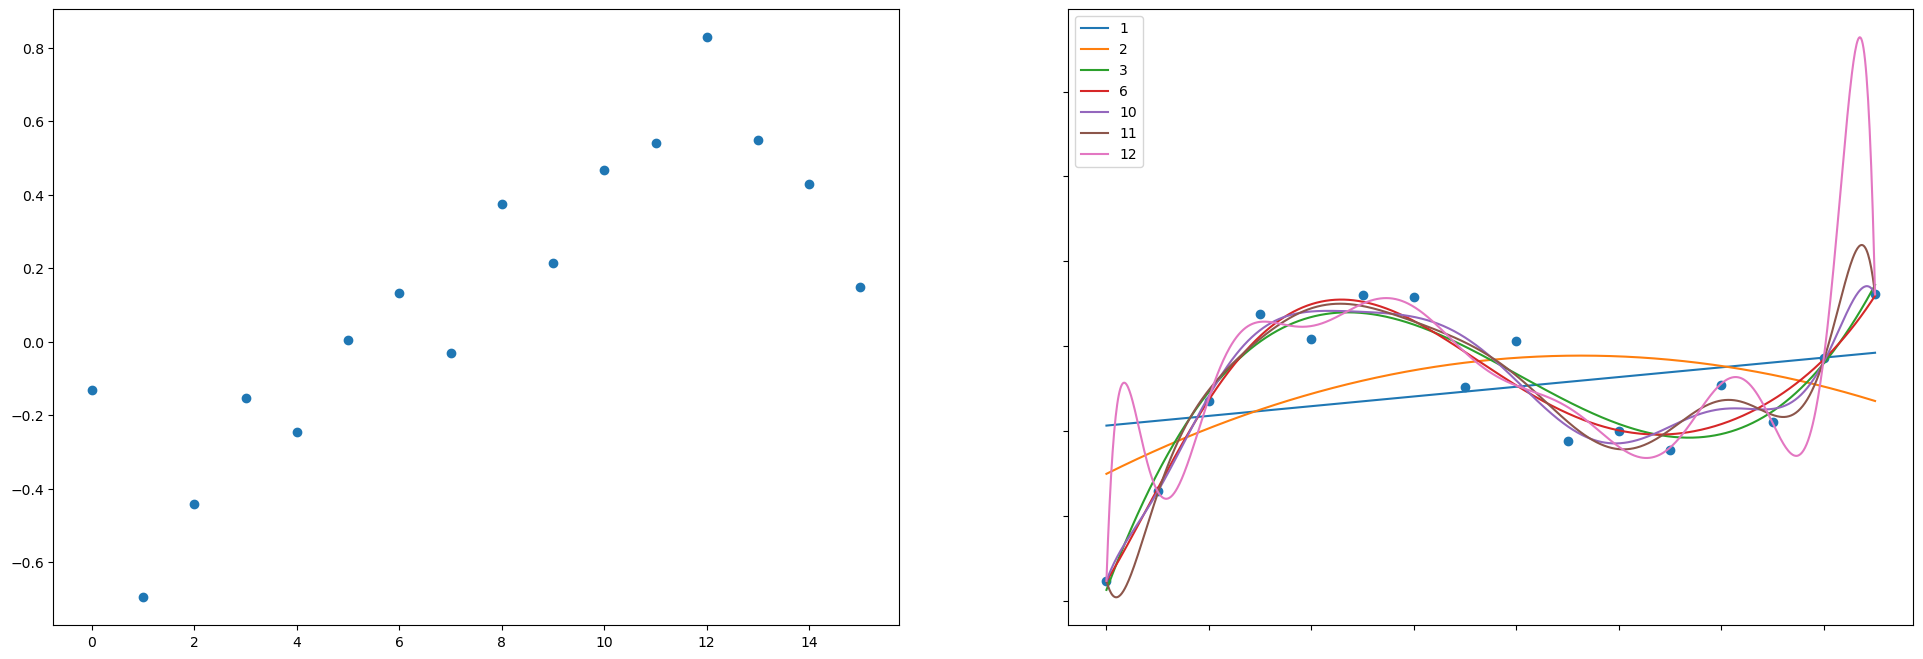

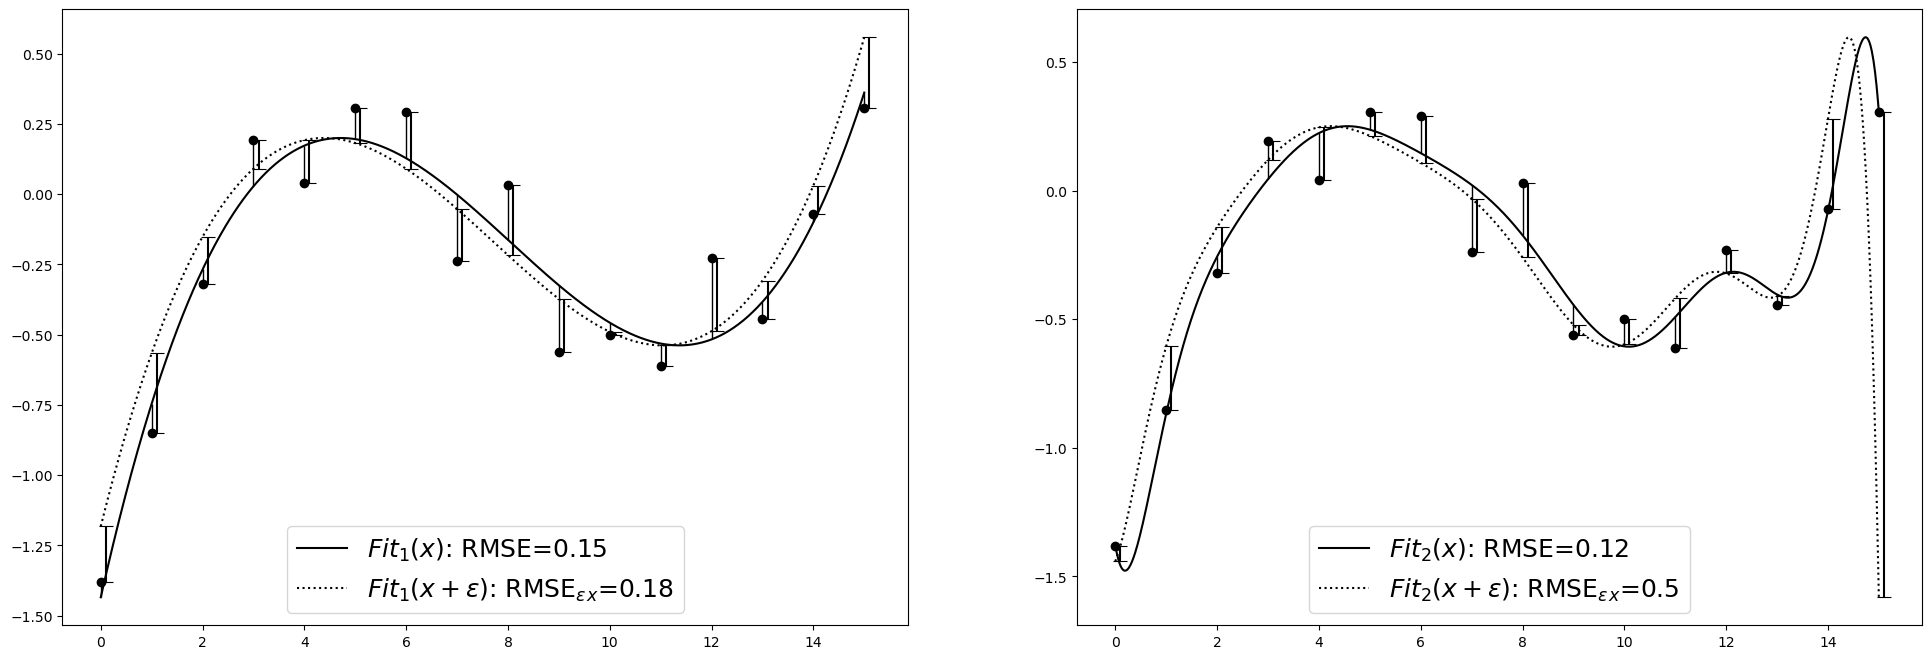

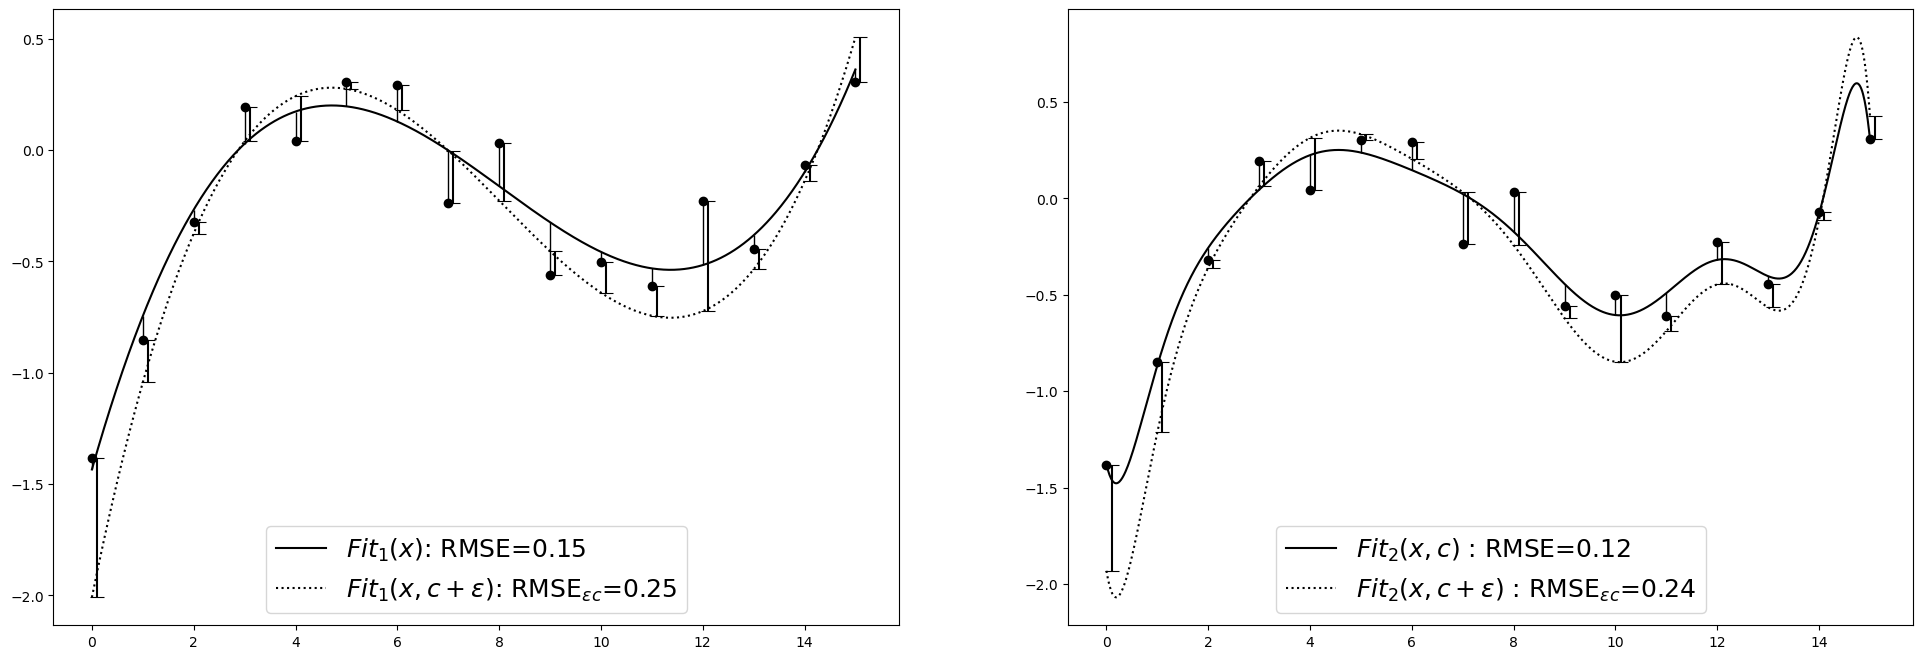

In [1]:
import matplotlib.pyplot as plt
# import random
import numpy as np
from scipy import interpolate
from sklearn.metrics import mean_squared_error

"""Generate Pink Noise"""
def gen_pink_noise_fs48k(length=2**17, rndseed=0):

    np.random.seed(rndseed)
    tmp = np.random.random(size=length)*2 - 1
    S = np.fft.rfft(tmp)
    fil = 1 / (np.arange(len(S))+1)
    S = S * fil
    s = np.fft.irfft(S)
    s /= np.max(np.abs(s))

    return s

t_noise = gen_pink_noise_fs48k()

"""pick up 32/16 points"""
# xs_noise = t_noise[::2**12]
xs_noise = t_noise[::2**13]
xs = np.array([i for i in range(len(xs_noise))])
a1 = 0.2
a2 = 1.5

"""target function w/ pink noise"""
ys = 0.3*(a1*xs)**4 - 1*(a1*xs)**3 + a1*xs + a2*xs_noise
# ys = xs_noise
ys[0] = 2*ys[1] -ys[2]
ys[-1] = 2*ys[-2] -ys[-3]

# ys = np.array([], dtype="float")

fig, axes = plt.subplots(1,2, figsize=(24,8))
axes[0].scatter(xs, xs_noise)
axes[1].scatter(xs, ys)

"""x_latent"""
x_latent = np.linspace(0, len(xs)-1, 1000)

"""polynominal"""

cf1 = ["最小2乗法（1次式）", lambda x, y: np.polyfit(x, y, 1)]
cf2 = ["最小2乗法（2次式）", lambda x, y: np.polyfit(x, y, 2)]
cf3 = ["最小2乗法（3次式）", lambda x, y: np.polyfit(x, y, 3)]
cf6 = ["最小2乗法（6次式）", lambda x, y: np.polyfit(x, y, 6)]
cf10 = ["最小2乗法（10次式）", lambda x, y: np.polyfit(x, y, 10)]
cf11 = ["最小2乗法（11次式）", lambda x, y: np.polyfit(x, y, 11)]
cf12 = ["最小2乗法（12次式）", lambda x, y: np.polyfit(x, y, 12)]
cf20 = ["最小2乗法（20次式）", lambda x, y: np.polyfit(x, y, 20)]

print(cf1[1](xs,ys))
print(cf2[1](xs,ys))
print(cf3[1](xs,ys))

f1 = cf1[1](xs,ys)
fx1 = np.poly1d(f1)(x_latent)
axes[1].plot(x_latent, fx1, label="1")
f2 = cf2[1](xs,ys)
fx2 = np.poly1d(f2)(x_latent)
axes[1].plot(x_latent, fx2, label="2")
f3 = cf3[1](xs,ys)
fx3 = np.poly1d(f3)(x_latent)
axes[1].plot(x_latent, fx3, label="3")
f6 = cf6[1](xs,ys)
fx6 = np.poly1d(f6)(x_latent)
axes[1].plot(x_latent, fx6, label="6")
f10 = cf10[1](xs,ys)
fx10 = np.poly1d(f10)(x_latent)
axes[1].plot(x_latent, fx10, label="10")
f11 = cf11[1](xs,ys)
fx11 = np.poly1d(f11)(x_latent)
axes[1].plot(x_latent, fx11, label="11")
f12 = cf12[1](xs,ys)
fx12 = np.poly1d(f12)(x_latent)
axes[1].plot(x_latent, fx12, label="12")
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].legend()
plt.show()


_fontsize=18
_noise = 0.33
fig, axes = plt.subplots(1, 2, figsize=(24,8))

"""DATA"""
axes[0].scatter(xs, ys, color="black")

"""diff bars"""
fxs3 = np.poly1d(f3)(xs)
fxs3_p = np.poly1d(f3)(xs+_noise)

fxs_m3 = (fxs3 + ys) / 2
fxs_e3 = np.abs(fxs3 - ys) / 2

fxs_m3_p = (fxs3_p + ys) / 2
fxs_e3_p = np.abs(fxs3_p - ys) / 2

fx3_p = np.poly1d(f3)(x_latent+_noise)
axes[0].plot(x_latent, fx3, label=f"$Fit_1(x)$: RMSE={mean_squared_error(fxs3, ys, squared=False):.2}", color="black", linestyle="-")
axes[0].plot(x_latent, fx3_p, label=f"$Fit_1(x+\epsilon)$: RMSE$_\epsilon$$_x$={mean_squared_error(fxs3_p, ys, squared=False):.2}", color="black", linestyle=":")
axes[0].errorbar(xs, fxs_m3, yerr=fxs_e3, fmt="none", capsize=0, capthick=0, ecolor="black", lw=1)
axes[0].errorbar(xs+0.1, fxs_m3_p, yerr=fxs_e3_p, fmt="none", capsize=5, capthick=.8, ecolor="black")

# axes[0].set_xticklabels([])
# axes[0].set_yticklabels([])
axes[0].legend(fontsize=_fontsize, loc="lower center")
# axes[0].set_ylim(-2, 1)


"""DATA"""
axes[1].scatter(xs, ys, color="black")

fxs11 = np.poly1d(f11)(xs)
fxs11_p = np.poly1d(f11)(xs+_noise)

fxs_m11 = (fxs11 + ys) / 2
fxs_e11 = np.abs(fxs11 - ys) / 2

fxs_m11_p = (fxs11_p + ys) / 2
fxs_e11_p = np.abs(fxs11_p - ys) / 2

fx11_p = np.poly1d(f11)(x_latent+_noise)
axes[1].plot(x_latent, fx11, label=f"$Fit_2(x)$: RMSE={mean_squared_error(fxs11, ys, squared=False):.2}", color="black", linestyle="-")
axes[1].plot(x_latent, fx11_p, label=f"$Fit_2(x+\epsilon)$: RMSE$_\epsilon$$_x$={mean_squared_error(fxs11_p, ys, squared=False):.2}", color="black", linestyle=":")
axes[1].errorbar(xs, fxs_m11, yerr=fxs_e11, fmt="none", capsize=0, capthick=0, ecolor="black", lw=1)
axes[1].errorbar(xs+0.1, fxs_m11_p, yerr=fxs_e11_p, fmt="none", capsize=5, capthick=.8, ecolor="black")
# axes[1].plot(xs+0.1, fxs_m11_p+fxs_e11_p, marker="^", ls="", color="black", ms=0)
# axes[1].plot(xs+0.1, fxs_m11_p-fxs_e11_p, marker="v", ls="", color="black", ms=0)
# axes[1].plot(x,y+4-yerr, marker="^", ls="", color='limegreen', ms=8)

# axes[1].set_xticklabels([])
# axes[1].set_yticklabels([])
axes[1].legend(fontsize=_fontsize, loc="lower center")
# axes[1].set_ylim(-2, 1)


# fx = np.poly1d(cf12[1](xs-.1,ys))(x_latent)
# ax.plot(x_latent, fx)

plt.show()



_noise_c = 0.4
fig, axes = plt.subplots(1, 2, figsize=(24,8))

"""DATA"""
axes[0].scatter(xs, ys, color="black")

"""diff bars"""
fxs3_cp = np.poly1d(f3+_noise_c*f3)(xs)
fxs_m3_cp = (fxs3_cp + ys) / 2
fxs_e3_cp = np.abs(fxs3_cp - ys) / 2

fx3_cp = np.poly1d(f3+_noise_c*f3)(x_latent)
axes[0].plot(x_latent, fx3, label=f"$Fit_1(x)$: RMSE={mean_squared_error(fxs3, ys, squared=False):.2}", color="black", linestyle="-")
axes[0].plot(x_latent, fx3_cp, label=f"$Fit_1(x,c+\epsilon)$: RMSE$_\epsilon$$_c$={mean_squared_error(fxs3_cp, ys, squared=False):.2}", color="black", linestyle=":")
axes[0].errorbar(xs, fxs_m3, yerr=fxs_e3, fmt="none", capsize=0, capthick=0, ecolor="black", lw=1)
axes[0].errorbar(xs+0.1, fxs_m3_cp, yerr=fxs_e3_cp, fmt="none", capsize=5, capthick=.8, ecolor="black")

# axes[0].set_xticklabels([])
# axes[0].set_yticklabels([])
axes[0].legend(fontsize=_fontsize, loc="lower center")
# axes[0].set_ylim(-2, 1)


"""DATA"""
axes[1].scatter(xs, ys, color="black")

fxs11_cp = np.poly1d(f11+_noise_c*f11)(xs)

fxs_m11_cp = (fxs11_cp + ys) / 2
fxs_e11_cp = np.abs(fxs11_cp - ys) / 2

fx11_cp = np.poly1d(f11+_noise_c*f11)(x_latent)
axes[1].plot(x_latent, fx11, label=f"$Fit_2(x,c)$ : RMSE={mean_squared_error(fxs11, ys, squared=False):.2}", color="black", linestyle="-")
axes[1].plot(x_latent, fx11_cp, label=f"$Fit_2(x,c+\epsilon)$ : RMSE$_\epsilon$$_c$={mean_squared_error(fxs11_cp, ys, squared=False):.2}", color="black", linestyle=":")
axes[1].errorbar(xs, fxs_m11, yerr=fxs_e11, fmt="none", capsize=0, capthick=0, ecolor="black", lw=1)
axes[1].errorbar(xs+0.1, fxs_m11_cp, yerr=fxs_e11_cp, fmt="none", capsize=5, capthick=.8, ecolor="black")
# axes[1].plot(xs+0.1, fxs_m11_cp+fxs_e11_cp, marker="^", ls="", color="black", ms=0)
# axes[1].plot(xs+0.1, fxs_m11_cp-fxs_e11_cp, marker="v", ls="", color="black", ms=0)
# axes[1].plot(x,y+4-yerr, marker="^", ls="", color='limegreen', ms=8)

# axes[1].set_xticklabels([])
# axes[1].set_yticklabels([])
axes[1].legend(fontsize=_fontsize, loc="lower center")
# axes[1].set_ylim(-2, 1)


plt.show()




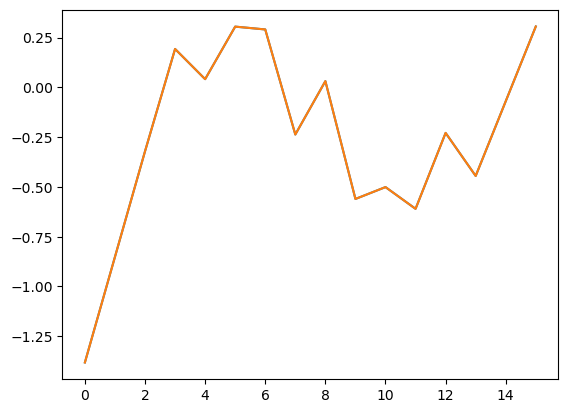

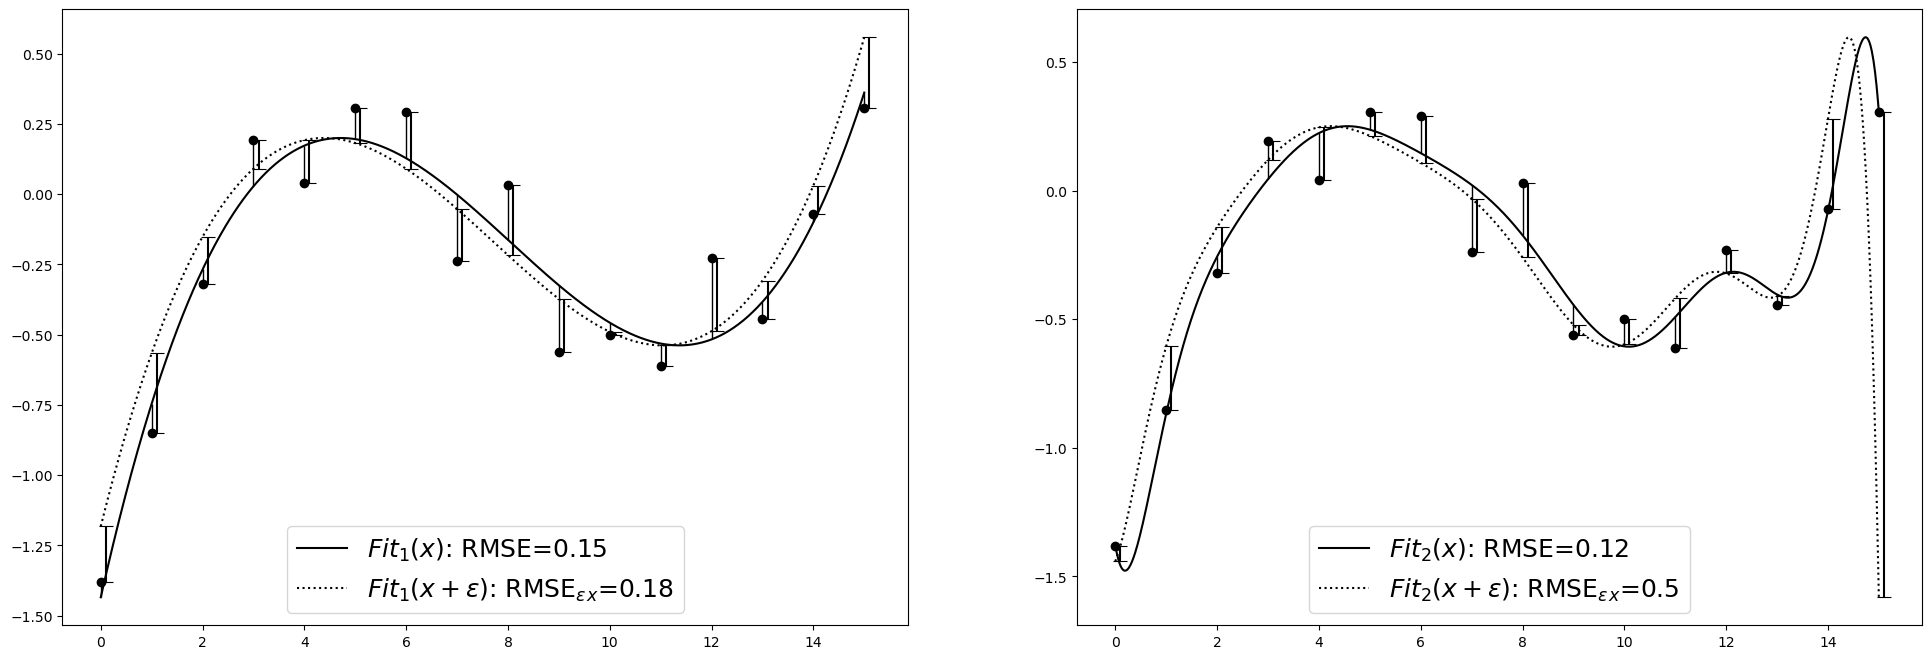

In [2]:
ys = ys.copy()
# ys2[0] = -.5
# ys2[7] = -.3
# ys2[7] = .2

plt.plot(ys)
plt.plot(ys)


f3_1 = cf3[1](xs,ys)
fx3_1 = np.poly1d(f3_1)(x_latent)
f11_1 = cf11[1](xs,ys)
fx11_1 = np.poly1d(f11_1)(x_latent)

_noise_c = 0.4
fig, axes = plt.subplots(1, 2, figsize=(24,8))

"""DATA"""
axes[0].scatter(xs, ys, color="black")

"""diff bars"""
fxs3_1 = np.poly1d(f3_1)(xs)
fxs3_1_p = np.poly1d(f3_1)(xs+_noise)

fxs_m3_1 = (fxs3_1 + ys) / 2
fxs_e3_1 = np.abs(fxs3_1 - ys) / 2

fxs_m3_1_p = (fxs3_1_p + ys) / 2
fxs_e3_1_p = np.abs(fxs3_1_p - ys) / 2

fx3_1_p = np.poly1d(f3_1)(x_latent+_noise)
axes[0].plot(x_latent, fx3_1, label=f"$Fit_1(x)$: RMSE={mean_squared_error(fxs3_1, ys, squared=False):.2}", color="black", linestyle="-")
axes[0].plot(x_latent, fx3_1_p, label=f"$Fit_1(x+\epsilon)$: RMSE$_\epsilon$$_x$={mean_squared_error(fxs3_1_p, ys, squared=False):.2}", color="black", linestyle=":")
axes[0].errorbar(xs, fxs_m3_1, yerr=fxs_e3_1, fmt="none", capsize=0, capthick=0, ecolor="black", lw=1)
axes[0].errorbar(xs+0.1, fxs_m3_1_p, yerr=fxs_e3_1_p, fmt="none", capsize=5, capthick=.8, ecolor="black")

# axes[0].set_xticklabels([])
# axes[0].set_yticklabels([])
axes[0].legend(fontsize=_fontsize, loc="lower center")
# axes[0].set_ylim(-2, 1)


"""DATA"""
axes[1].scatter(xs, ys, color="black")

fxs11_1 = np.poly1d(f11_1)(xs)
fxs11_1_p = np.poly1d(f11_1)(xs+_noise)

fxs_m11_1 = (fxs11_1 + ys) / 2
fxs_e11_1 = np.abs(fxs11_1 - ys) / 2

fxs_m11_1_p = (fxs11_1_p + ys) / 2
fxs_e11_1_p = np.abs(fxs11_1_p - ys) / 2

fx11_1_p = np.poly1d(f11_1)(x_latent+_noise)
axes[1].plot(x_latent, fx11_1, label=f"$Fit_2(x)$: RMSE={mean_squared_error(fxs11_1, ys, squared=False):.2}", color="black", linestyle="-")
axes[1].plot(x_latent, fx11_1_p, label=f"$Fit_2(x+\epsilon)$: RMSE$_\epsilon$$_x$={mean_squared_error(fxs11_1_p, ys, squared=False):.2}", color="black", linestyle=":")
axes[1].errorbar(xs, fxs_m11_1, yerr=fxs_e11_1, fmt="none", capsize=0, capthick=0, ecolor="black", lw=1)
axes[1].errorbar(xs+0.1, fxs_m11_1_p, yerr=fxs_e11_1_p, fmt="none", capsize=5, capthick=.8, ecolor="black")

# axes[1].set_xticklabels([])
# axes[1].set_yticklabels([])
axes[1].legend(fontsize=_fontsize, loc="lower center")
# axes[1].set_ylim(-2, 1)


plt.show()




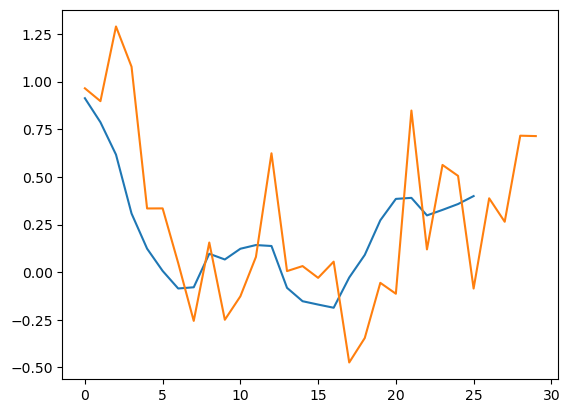

In [3]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import math

a = [ 0.56514978,  0.50583713,  0.5983144 ,  0.52175241,  0.45634347,
      0.22114882,  0.2559339 ,  0.10449878,  0.08629392,  0.13410682,
      0.13520334,  0.08693079,  0.13227931, -0.0634571 , -0.18911029,
     -0.21415424,]
# -0.25105624, -0.30963861, -0.17493603, -0.07848107,
#       0.01505251,  0.13949498,  0.23368917,  0.32850575,  0.44952869,
#       0.36945653]

func1 = lambda x: math.sin((x/5)*math.pi)
func2 = lambda x: (0.05*x)**3-(0.06*x)**2

a = [random.random() + 0.5*random.random()*func1(x) + func2(x) for x in range(30)]

ma = pd.Series(a).rolling(5).mean()
ma2 = pd.Series(ma.dropna().values)

plt.plot(ma2)
plt.plot(a)

<AxesSubplot: >

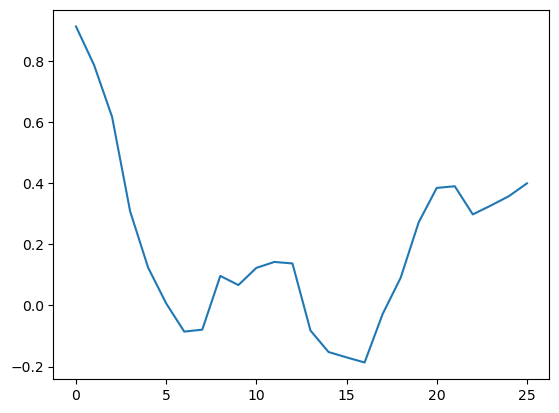

In [4]:
ma2.plot()

D2-filter

/tmp/ipykernel_9333/97066153.py:66: RankWarning: Polyfit may be poorly conditioned
  f10 = cf10[1](xs[1::2], ys_r2[1::2])
/tmp/ipykernel_9333/97066153.py:67: RankWarning: Polyfit may be poorly conditioned
  f11 = cf11[1](xs[1::2], ys_r2[1::2])
/tmp/ipykernel_9333/97066153.py:68: RankWarning: Polyfit may be poorly conditioned
  f12 = cf12[1](xs[1::2], ys_r2[1::2])


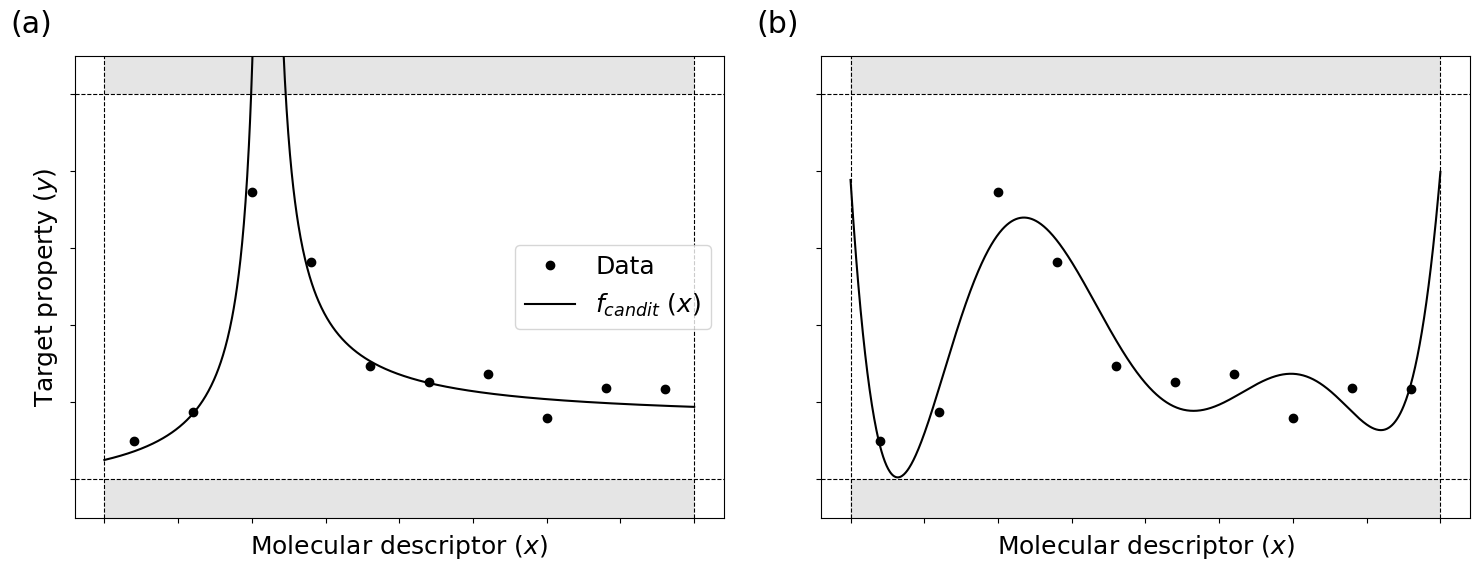

In [26]:
import numpy as np
import matplotlib.pyplot as plt


"""Min-max filter : Diverging Function"""
npoints = 20
xs = np.array([i for i in range(npoints)])
x_latent = np.linspace(0, len(xs), 1050)

func1 = lambda x: np.abs(x / (x - 5.5)) + .5
np.random.seed(0)
ys = func1(xs)
ys_r = (np.random.rand(npoints) -0.5)*1.2 + ys
ys_r2 = ys_r.copy()
ys_r2[5] = ys_r2[5]*0.7

y_latent = func1(x_latent)
r1 = 266
r2 = 318
range_max = 10
range_min = -1

if False:
    # plt.plot(xs, ys1, "o", color="black")
    # plt.plot(xs[1::2], ys1_r[1::2], "o", color="blue")
    plt.plot(xs[1::2], ys1_r2[1::2], "o", color="black")
    plt.plot(x_latent[:r1], y_latent[:r1], "black", label=f"Diverging Function")
    plt.plot(x_latent[r2:], y_latent[r2:], "black")
    plt.legend()
    plt.show()

# plt.plot(xs, ys1, "o", color="black")
# plt.plot(xs[1::2], ys1_r[1::2], "o", color="blue")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
ax = axes[0]
ax.plot(xs[1::2], ys_r2[1::2], "o", color="black", label="Data")
ax.plot(x_latent[:r1], y_latent[:r1], "black", label="$f_{candit}\ (x)$")
ax.plot(x_latent[r2:], y_latent[r2:], "black")
ax.legend(loc="center right", fontsize=_fontsize)
ax.hlines(0, -1, 21, color="black", linestyles="--", lw=0.8)
ax.hlines(10, -1, 21, color="black", linestyles="--", lw=0.8)
ax.vlines(0, -1, 11.5, color="black", linestyles="--", lw=0.8)
ax.vlines(20, -1, 11.5, color="black", linestyles="--", lw=0.8)
ax.set_xlabel("Molecular descriptor ($x$)", fontsize=_fontsize)
ax.set_ylabel("Target property ($y$)", fontsize=_fontsize)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.fill_between(x_latent, [0 for _ in range(len(x_latent))], [-20 for _ in range(len(x_latent))], facecolor="gray", alpha=0.2, label="fill")
ax.fill_between(x_latent, [10 for _ in range(len(x_latent))], [20 for _ in range(len(x_latent))], facecolor="gray", alpha=0.2, label="fill")
ax.set_xlim(-1, 21)
ax.set_ylim(-1, 11)
ax.text(-0.1, 1.05, "(a)", fontsize=_fontsize*1.2, transform=ax.transAxes)

# plt.show()

"""Min-max filter : OK Function"""
# fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax = axes[1]
ax.plot(xs[1::2], ys_r2[1::2], "o", color="black", label="Data")

f1 = cf1[1](xs[1::2], ys_r2[1::2])
f2 = cf2[1](xs[1::2], ys_r2[1::2])
f3 = cf3[1](xs[1::2], ys_r2[1::2])
f6 = cf6[1](xs[1::2], ys_r2[1::2])
f10 = cf10[1](xs[1::2], ys_r2[1::2])
f11 = cf11[1](xs[1::2], ys_r2[1::2])
f12 = cf12[1](xs[1::2], ys_r2[1::2])
fx = np.poly1d(f6)(x_latent)
ax.plot(x_latent, fx, "black", label="$f_{ok}\ (x)$")
# ax.legend(loc="center right", fontsize=14)
# ax.legend(loc="center right", fontsize=_fontsize)
ax.hlines(0, -1, 21, color="black", linestyles="--", lw=0.8)
ax.hlines(10, -1, 21, color="black", linestyles="--", lw=0.8)
ax.vlines(0, -1, 11.5, color="black", linestyles="--", lw=0.8)
ax.vlines(20, -1, 11.5, color="black", linestyles="--", lw=0.8)
ax.set_xlabel("Molecular descriptor ($x$)", fontsize=_fontsize)
# ax.set_ylabel("Target property ($y$)", fontsize=16)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.fill_between(x_latent, [0 for _ in range(len(x_latent))], [-20 for _ in range(len(x_latent))], facecolor="gray", alpha=0.2, label="fill")
ax.fill_between(x_latent, [10 for _ in range(len(x_latent))], [20 for _ in range(len(x_latent))], facecolor="gray", alpha=0.2, label="fill")
ax.set_xlim(-1, 21)
ax.set_ylim(-1, 11)
ax.text(-0.1, 1.05, "(b)", fontsize=_fontsize*1.2, transform=ax.transAxes)

plt.subplots_adjust(wspace=0.15)

plt.savefig("d2_filter.png")
plt.show()

STBL (var)

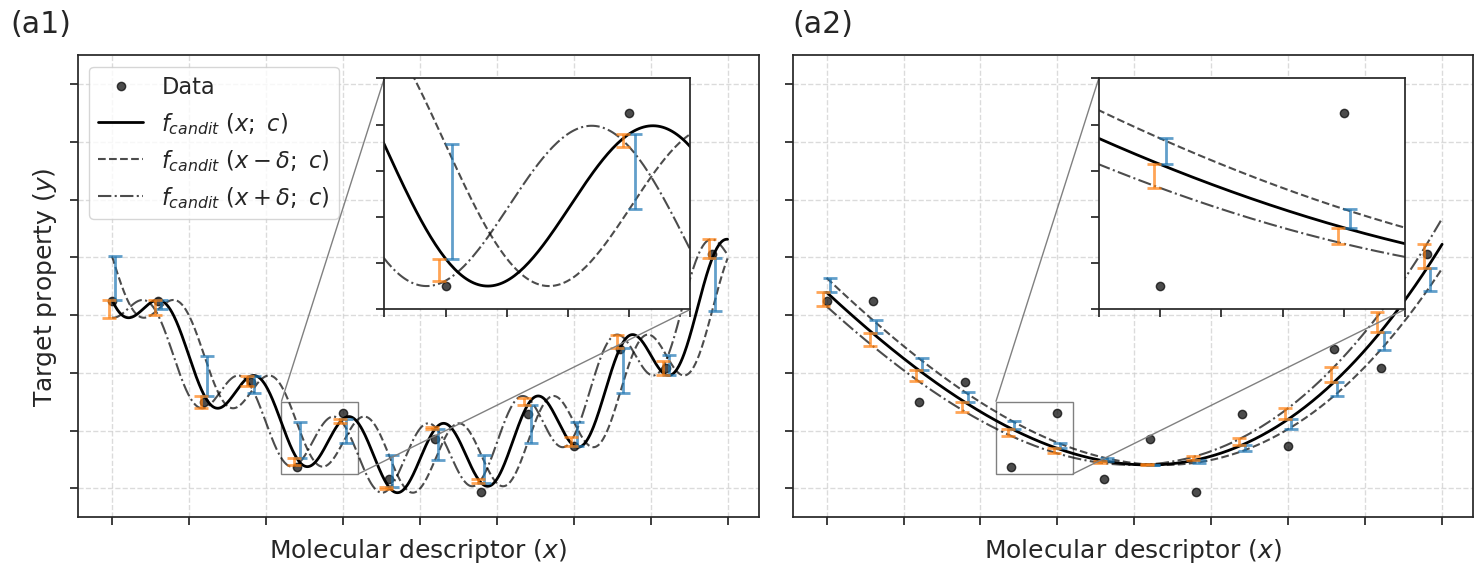

In [119]:
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, inset_axes, mark_inset

"""Overfit function"""
if False:
    npoints = 40
    xs = np.array([i for i in range(npoints)])
    x_latent = np.linspace(0, len(xs), 1025)

    # func2 = lambda x: 0.1*(0.1*x+10)*np.sin(np.pi*((0.3*(x-20))**2)/5) + 0.2*(0.1*(x-4))**2 + 1.0
    # func2 = lambda x: np.sin((20*(x/10)**3 - 20*(x/10)**2 + 3*(x/10) -1)*np.pi/10) + np.cos((3*(x/10) -1)*np.pi/5) + 0.1*(x-5.0) + 5.0
    # func2 = lambda x: ((x/20)**2)*np.sin((x/2)*np.pi)*((x/10-1.0)**2) + 5.0
    # func2 = lambda x: np.cos((0.4*x)*np.pi)*(x**2)*0.001 + 0.008*(x-30)**2 + 2.0
    # func2 = lambda x: 3.0 / (np.pi*(1.0 + ((x-29.5)/2)**2)) + (0.04*x)**3 - (0.08*(x-26))**2 -0.2*x + 10.0
    func2 = lambda x: -20.0 / (np.pi*(1.0 + ((x-10)/1.5)**2)) + 8.0 / (np.pi*(1.0 + ((x-11.5)/1.0)**2)) + \
                    4.0 / (np.pi*(1.0 + ((x-21)/1.5)**2)) + 1.0 / (np.pi*(1.0 + ((x-22.5)/1.0)**2)) + \
                    2.0 / (np.pi*(1.0 + ((x-30)/1.0)**2)) + 8.0 / (np.pi*(1.0 + ((x-31)/1.0)**2))+ np.sqrt(x+5) + 0

    np.random.seed(2)

    ys = func2(xs)
    ys_r = (np.random.rand(npoints) -0.5)*.4 + ys
    ys_r2 = ys_r.copy()
    # ys_r2[5] = ys_r2[5]*0.7

    y_latent = func2(x_latent)
    y_latent_x = func2(x_latent-1)
    r1 = 266
    r2 = 266
    range_max = 10
    range_min = -1

    if True:
        # plt.plot(xs, ys1, "o", color="black")
        # plt.plot(xs[1::1], ys_r2[1::1], "o", color="blue")
        plt.plot(xs[1::3], ys_r2[1::3], "o", color="black", label="Data points")
        plt.plot(x_latent[:r1], y_latent[:r1], "black", label=f"Overfittingg Function")
        plt.plot(x_latent[r2:], y_latent[r2:], "black")
        plt.legend()
        plt.show()

    # plt.plot(xs, ys1, "o", color="black")
    # plt.plot(xs[1::2], ys1_r[1::2], "o", color="blue")
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))
    ax.plot(xs[1::3], ys_r2[1::3], "o", color="black")
    ax.plot(x_latent, y_latent, "black", label=f"Overfitting Function")
    ax.plot(x_latent, y_latent_x, "black", label="", linestyle="--")
    ax.legend(loc="center right", fontsize=14)
    ax.hlines(0, -1, 41, color="black", linestyles="--", lw=0.8)
    ax.hlines(10, -1, 41, color="black", linestyles="--", lw=0.8)
    ax.vlines(0, -1, 11.5, color="black", linestyles="--", lw=0.8)
    ax.vlines(40, -1, 11.5, color="black", linestyles="--", lw=0.8)

    ax.fill_between(x_latent, [0 for _ in range(len(x_latent))], [-10 for _ in range(len(x_latent))], facecolor="gray", alpha=0.2, label="fill")
    ax.fill_between(x_latent, [10 for _ in range(len(x_latent))], [20 for _ in range(len(x_latent))], facecolor="gray", alpha=0.2, label="fill")
    ax.set_xlim(-1, 41)
    # ax.set_xlim(-1, 21)
    ax.set_ylim(-1, 11)

    plt.show()



"""Stability : Overfit function"""
npoints = 40
xs = np.array([i for i in range(npoints)])
x_latent = np.linspace(0, len(xs), 1025)

func2 = lambda x: 0.1*(0.1*x+10)*np.sin(np.pi*((0.333*(x-20)))) + 1.6*(0.1*(x-20))**2 + 1.0

_mc = 0.9
func2_n = lambda x: (_mc*0.01*x+_mc*1)*np.sin(np.pi*((_mc*0.333*x-_mc*0.333*20))) + _mc*1.6*((_mc*0.1*x-_mc*2))**2 + _mc*1.0
_pc = 1.1
func2pn = lambda x: (_pc*0.01*x+_pc*1)*np.sin(np.pi*((_pc*0.333*x-_pc*0.333*20))) + _pc*1.6*((_pc*0.1*x-_pc*2))**2 + _pc*1.0

# func2 = lambda x: 0.1*(0.1*x+10)*np.sin(np.pi*((0.333*(x-20)))) + 0.8*(0.1*(x-4))**2 + 1.0
# func2 = lambda x: 0.1*(0.1*x+10)*np.sin(np.pi*((0.3*(x-20))**2)/5) + 0.2*(0.1*(x-4))**2 + 1.0
# func2 = lambda x: np.sin((20*(x/10)**3 - 20*(x/10)**2 + 3*(x/10) -1)*np.pi/10) + np.cos((3*(x/10) -1)*np.pi/5) + 0.1*(x-5.0) + 5.0
# func2 = lambda x: ((x/20)**2)*np.sin((x/2)*np.pi)*((x/10-1.0)**2) + 5.0
# func2 = lambda x: np.cos((0.4*x)*np.pi)*(x**2)*0.001 + 0.008*(x-30)**2 + 2.0
# func2 = lambda x: 3.0 / (np.pi*(1.0 + ((x-29.5)/2)**2)) + (0.04*x)**3 - (0.08*(x-26))**2 -0.2*x + 10.0
# func2 = lambda x: -10.0 / (np.pi*(1.0 + ((x-10)/1.5)**2)) + 8.0 / (np.pi*(1.0 + ((x-11.5)/1.0)**2)) + \
                #    4.0 / (np.pi*(1.0 + ((x-21)/1.5)**2)) + 1.0 / (np.pi*(1.0 + ((x-22.5)/1.0)**2)) + \
                #    2.0 / (np.pi*(1.0 + ((x-30)/1.0)**2)) + 8.0 / (np.pi*(1.0 + ((x-31)/1.0)**2))+ np.sqrt(x+5) + 0

np.random.seed(2)

ys = func2(xs)
ys_r = (np.random.rand(npoints) -0.5)*.8 + ys
ys_r2 = ys_r.copy()
# ys_r2[5] = ys_r2[5]*0.7

y_latent = func2(x_latent)
y_latent_x = func2(x_latent-1)
y_latentpx = func2(x_latent+1)
r1 = 266
r2 = 266
range_max = 10
range_min = -1

if False:
    # plt.plot(xs, ys1, "o", color="black")
    # plt.plot(xs[1::1], ys_r2[1::1], "o", color="blue")
    plt.plot(xs[1::3], ys_r2[1::3], "o", color="black", label="Data points")
    plt.plot(x_latent[:r1], y_latent[:r1], "black", label=f"Overfittingg Function")
    plt.plot(x_latent[r2:], y_latent[r2:], "black")
    plt.legend()
    plt.show()

# plt.plot(xs, ys1, "o", color="black")
# plt.plot(xs[1::2], ys1_r[1::2], "o", color="blue")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
ax = axes[0]
ax.plot(xs[0::3], ys_r2[0::3], "o", color="black", label="Data", alpha=0.7)
ax.plot(x_latent, y_latent, "black", label="$f_{candit}\ (x;\ c)$", linewidth=2)
ax.plot(x_latent, y_latent_x, "black", label="$f_{candit}\ (x-\delta;\ c)$", linestyle="--", alpha=0.7)
ax.plot(x_latent, y_latentpx, "black", label="$f_{candit}\ (x+\delta;\ c)$", linestyle="-.", alpha=0.7)


_noise = 1
"""diff bars"""
fxp = func2(xs[0::3])
fxp_n = func2(xs[0::3]-_noise)
fxppn = func2(xs[0::3]+_noise)

fxp_m = (fxp + ys_r2[0::3]) / 2
fxp_e = np.abs(fxp -ys_r2[0::3]) / 2

fxp_m_n = (fxp_n + fxp) / 2
fxp_e_n = np.abs(fxp_n - fxp) / 2

fxp_mpn = (fxppn + fxp) / 2
fxp_epn = np.abs(fxppn - fxp) / 2

ax.errorbar(xs[0::3]+0.2, fxp_m_n, yerr=fxp_e_n, fmt="none", capsize=5, capthick=2, ecolor="tab:blue", lw=2, alpha=0.7)
ax.errorbar(xs[0::3]-0.2, fxp_mpn, yerr=fxp_epn, fmt="none", capsize=5, capthick=2, ecolor="tab:orange", lw=2, alpha=0.7)
# ax.errorbar(xs[0::3]+0.1, fxp_m_n, yerr=fxp_e_n, fmt="none", elinewidth=2, barsabove=True, capsize=5, ecolor="black", 
#             capthick=2, lolims=True, uplims=True, xlolims=True, xuplims=True)
# ax.errorbar(xs[0::3]+0.1, fxp_m_n, yerr=fxp_e_n, fmt="none", elinewidth=2, barsabove=True, capsize=5,
            # capthick=2, lolims=True, uplims=True, xlolims=True, xuplims=True)
# ax.legend(loc="center right", fontsize=14)
ax.legend(fontsize=_fontsize*0.9, loc="upper left")


ax.set_xlabel("Molecular descriptor ($x$)", fontsize=_fontsize)
ax.set_ylabel("Target property ($y$)", fontsize=_fontsize)
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(-1,15)
ax.grid(linestyle="--", alpha=0.7)
ax.text(-0.1, 1.05, "(a1)", fontsize=_fontsize*1.2, transform=ax.transAxes)

"""inset"""
inset_x = [11,16]
inset_y = [0.5,3]
inset_pos = [0.45, 0.45, 0.45, 0.5] #[左, 下, 幅, 高さ]
ax2 = plt.axes([0, 0, 1, 1]) #axes([左, 下, 幅, 高さ])
position = InsetPosition(ax, inset_pos) #[左, 下, 幅, 高さ]
ax2.set_axes_locator(position)
mark_inset(ax, ax2, loc1=2, loc2=4, edgecolor="gray")
ax2.plot(xs[0::3], ys_r2[0::3], "o", color="black", label="Data", alpha=0.7)
ax2.plot(x_latent, y_latent, "black", label="$f_{candit}\ (x;\ c)$", linewidth=2)
ax2.plot(x_latent, y_latent_x, "black", label="$f_{candit}\ (x-\delta;\ c)$", linestyle="--", alpha=0.7)
ax2.plot(x_latent, y_latentpx, "black", label="$f_{candit}\ (x+\delta;\ c)$", linestyle="-.", alpha=0.7)
ax2.errorbar(xs[0::3]+0.1, fxp_m_n, yerr=fxp_e_n, fmt="none", capsize=5, capthick=2, ecolor="tab:blue", lw=2, alpha=0.7)
ax2.errorbar(xs[0::3]-0.1, fxp_mpn, yerr=fxp_epn, fmt="none", capsize=5, capthick=2, ecolor="tab:orange", lw=2, alpha=0.7)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim(inset_y)
ax2.set_xlim(inset_x)


# plt.savefig("noise_func01.png", dpi=300)
# plt.show()


"""Stability : OK Function"""
# fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax = axes[1]
ax.plot(xs[0::3], ys_r2[0::3], "o", color="black", label="Data", alpha=0.7)

# f1 = cf1[1](xs[0::3], ys_r2[0::3])
# f2 = cf2[1](xs[0::3], ys_r2[0::3])
f3 = cf3[1](xs[0::3], ys_r2[0::3])
# f6 = cf6[1](xs[0::3], ys_r2[0::3])
# f10 = cf10[1](xs[0::3], ys_r2[0::3])
# f11 = cf11[1](xs[0::3], ys_r2[0::3])
# f12 = cf12[1](xs[0::3], ys_r2[0::3])
fx = np.poly1d(f3)(x_latent)
fx_x = np.poly1d(f3)(x_latent-1)
fxpx = np.poly1d(f3)(x_latent+1)
ax.plot(x_latent, fx, "black", label="$f_{fit}\ (x;\ c)$", linewidth=2)
ax.plot(x_latent, fx_x, "black", label="$f_{fit}\ (x-\delta;\ c)$", linestyle="--", alpha=0.7)
ax.plot(x_latent, fxpx, "black", label="$f_{fit}\ (x+\delta;\ c)$", linestyle="-.", alpha=0.7)

_noise = 1
"""diff bars"""
fxp = np.poly1d(f3)(xs[0::3])
fxp_n = np.poly1d(f3)(xs[0::3]-_noise)
fxppn = np.poly1d(f3)(xs[0::3]+_noise)

fxp_m = (fxp + ys_r2[0::3]) / 2
fxp_e = np.abs(fxp -ys_r2[0::3]) / 2

fxp_m_n = (fxp_n + fxp) / 2
fxp_e_n = np.abs(fxp_n - fxp) / 2
fxp_mpn = (fxppn + fxp) / 2
fxp_epn = np.abs(fxppn - fxp) / 2
ax.errorbar(xs[0::3]+0.2, fxp_m_n, yerr=fxp_e_n, fmt="none", capsize=5, capthick=2, ecolor="tab:blue", lw=2, alpha=0.7)
ax.errorbar(xs[0::3]-0.2, fxp_mpn, yerr=fxp_epn, fmt="none", capsize=5, capthick=2, ecolor="tab:orange", lw=2, alpha=0.7)

# ax.legend(loc="center right", fontsize=14)
# ax.legend(fontsize=_fontsize, loc="upper center")
ax.set_xlabel("Molecular descriptor ($x$)", fontsize=_fontsize)
# ax.set_ylabel("Target property ($y$)", fontsize=16)
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(-1,15)
ax.grid(linestyle="--", alpha=0.7)
ax.text(0, 1.05, "(a2)", fontsize=_fontsize*1.2, transform=ax.transAxes)

"""inset"""
ax2 = plt.axes([0, 0, 1, 1]) #axes([左, 下, 幅, 高さ])
position = InsetPosition(ax, inset_pos) #[左, 下, 幅, 高さ]
ax2.set_axes_locator(position)
mark_inset(ax, ax2, loc1=2, loc2=4, edgecolor="gray")
ax2.plot(xs[0::3], ys_r2[0::3], "o", color="black", label="Data", alpha=0.7)
ax2.plot(x_latent, fx, "black", label="$f_{fit}\ (x;\ c)$", linewidth=2)
ax2.plot(x_latent, fx_x, "black", label="$f_{fit}\ (x-\delta;\ c)$", linestyle="--", alpha=0.7)
ax2.plot(x_latent, fxpx, "black", label="$f_{fit}\ (x+\delta;\ c)$", linestyle="-.", alpha=0.7)
ax2.errorbar(xs[0::3]+0.1, fxp_m_n, yerr=fxp_e_n, fmt="none", capsize=5, capthick=2, ecolor="tab:blue", lw=2, alpha=0.7)
ax2.errorbar(xs[0::3]-0.1, fxp_mpn, yerr=fxp_epn, fmt="none", capsize=5, capthick=2, ecolor="tab:orange", lw=2, alpha=0.7)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim(inset_y)
ax2.set_xlim(inset_x)



plt.subplots_adjust(wspace=0.05)

plt.savefig("noise_func_x.png", dpi=300)
plt.show()



STBL (coeff)

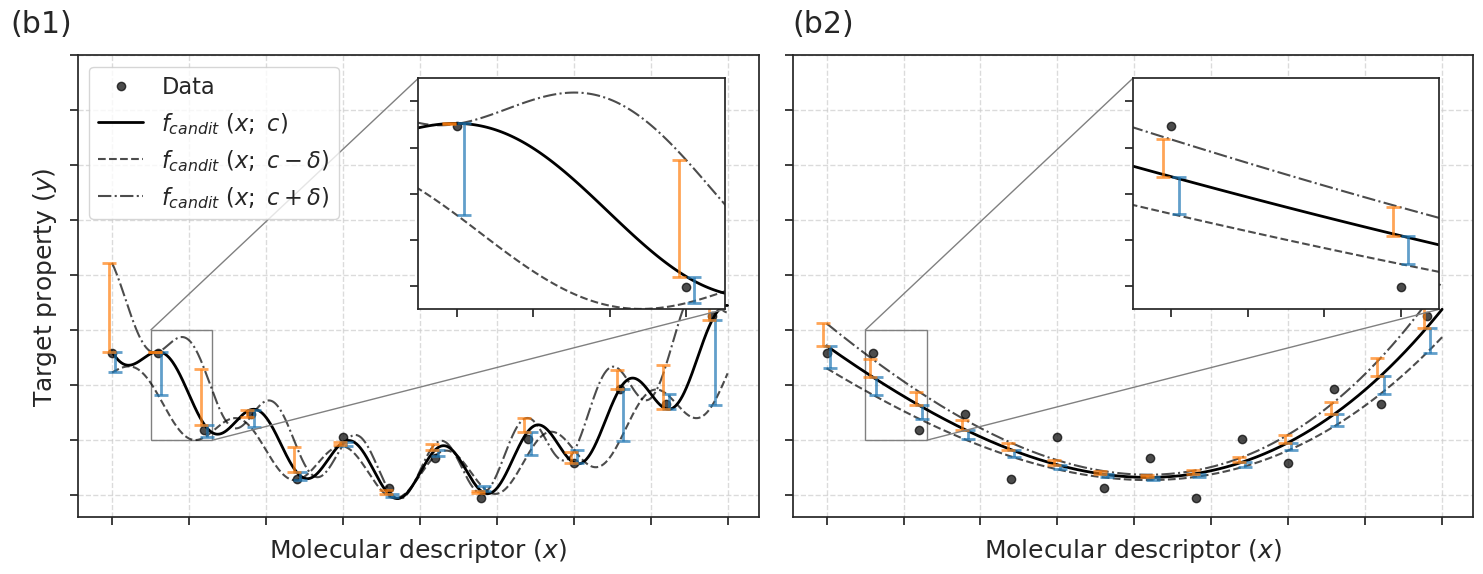

In [120]:

"""Stability for Coefficients """
y_latent = func2(x_latent)
y_latent_c = func2_n(x_latent)
y_latentpc = func2pn(x_latent)
r1 = 266
r2 = 266
range_max = 10
range_min = -1

if False:
    # plt.plot(xs, ys1, "o", color="black")
    # plt.plot(xs[1::1], ys_r2[1::1], "o", color="blue")
    plt.plot(xs[1::3], ys_r2[1::3], "o", color="black", label="Data points")
    plt.plot(x_latent[:r1], y_latent[:r1], "black", label=f"Overfittingg Function")
    plt.plot(x_latent[r2:], y_latent[r2:], "black")
    plt.legend()
    plt.show()

# plt.plot(xs, ys1, "o", color="black")
# plt.plot(xs[1::2], ys1_r[1::2], "o", color="blue")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
ax = axes[0]
ax.plot(xs[0::3], ys_r2[0::3], "o", color="black", label="Data", alpha=0.7)
ax.plot(x_latent, y_latent, "black", label="$f_{candit}\ (x;\ c)$", linewidth=2)
ax.plot(x_latent, y_latent_c, "black", label="$f_{candit}\ (x;\ c-\delta)$", linestyle="--", alpha=0.7)
ax.plot(x_latent, y_latentpc, "black", label="$f_{candit}\ (x;\ c+\delta)$", linestyle="-.", alpha=0.7)


_noise = 1
"""diff bars"""
fxp = func2(xs[0::3])
fxp_n = func2_n(xs[0::3])
fxppn = func2pn(xs[0::3])

fxp_m = (fxp + ys_r2[0::3]) / 2
fxp_e = np.abs(fxp -ys_r2[0::3]) / 2

fxp_m_n = (fxp_n + fxp) / 2
fxp_e_n = np.abs(fxp_n - fxp) / 2

fxp_mpn = (fxppn + fxp) / 2
fxp_epn = np.abs(fxppn - fxp) / 2

ax.errorbar(xs[0::3]+0.2, fxp_m_n, yerr=fxp_e_n, fmt="none", capsize=5, capthick=2, ecolor="tab:blue", lw=2, alpha=0.7)
ax.errorbar(xs[0::3]-0.2, fxp_mpn, yerr=fxp_epn, fmt="none", capsize=5, capthick=2, ecolor="tab:orange", lw=2, alpha=0.7)
# ax.errorbar(xs[0::3]+0.1, fxp_m_n, yerr=fxp_e_n, fmt="none", elinewidth=2, barsabove=True, capsize=5, ecolor="black", 
#             capthick=2, lolims=True, uplims=True, xlolims=True, xuplims=True)
# ax.errorbar(xs[0::3]+0.1, fxp_m_n, yerr=fxp_e_n, fmt="none", elinewidth=2, barsabove=True, capsize=5,
            # capthick=2, lolims=True, uplims=True, xlolims=True, xuplims=True)
# ax.legend(loc="center right", fontsize=14)
lg = ax.legend(fontsize=_fontsize*0.9, loc="upper left")

ax.set_xlabel("Molecular descriptor ($x$)", fontsize=_fontsize)
ax.set_ylabel("Target property ($y$)", fontsize=_fontsize)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(-1,20)
ax.grid(linestyle="--", alpha=0.7)
ax.text(-0.1, 1.05, "(b1)", fontsize=_fontsize*1.2, transform=ax.transAxes)


"""inset"""
inset_x = [2.5,6.5]
inset_y = [2.5,7.5]
inset_pos = [0.50, 0.45, 0.45, 0.5] #[左, 下, 幅, 高さ]
ax2 = plt.axes([0, 0, 1, 1]) #axes([左, 下, 幅, 高さ])
position = InsetPosition(ax, inset_pos) #[左, 下, 幅, 高さ]
ax2.set_axes_locator(position)
# mark_inset(ax, ax2, loc1=2, loc2=3, edgecolor="gray")
mk = mark_inset(ax, ax2, loc1=2, loc2=4, edgecolor="gray")
for bc in mk[1:]:
    bc.remove()
    ax.add_patch(bc)
    bc.set_zorder(4)
    bc.set_clip_on(True)

ax2.plot(xs[0::3], ys_r2[0::3], "o", color="black", label="Data", alpha=0.7)
ax2.plot(x_latent, y_latent, "black", label="$f_{candit}\ (x;\ c)$", linewidth=2)
ax2.plot(x_latent, y_latent_c, "black", label="$f_{candit}\ (x;\ c-\delta)$", linestyle="--", alpha=0.7)
ax2.plot(x_latent, y_latentpc, "black", label="$f_{candit}\ (x;\ c+\delta)$", linestyle="-.", alpha=0.7)
ax2.errorbar(xs[0::3]+0.1, fxp_m_n, yerr=fxp_e_n, fmt="none", capsize=5, capthick=2, ecolor="tab:blue", lw=2, alpha=0.7)
ax2.errorbar(xs[0::3]-0.1, fxp_mpn, yerr=fxp_epn, fmt="none", capsize=5, capthick=2, ecolor="tab:orange", lw=2, alpha=0.7)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim(inset_y)
ax2.set_xlim(inset_x)

# lg.set_zorder(100)


# plt.savefig("noise_func03.png", dpi=300)
# plt.show()


"""Stability : OK Function"""
# fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax = axes[1]
ax.plot(xs[0::3], ys_r2[0::3], "o", color="black", label="Data", alpha=0.7)

# f1 = cf1[1](xs[0::3], ys_r2[0::3])
# f2 = cf2[1](xs[0::3], ys_r2[0::3])
f3 = cf3[1](xs[0::3], ys_r2[0::3])
# f6 = cf6[1](xs[0::3], ys_r2[0::3])
# f10 = cf10[1](xs[0::3], ys_r2[0::3])
# f11 = cf11[1](xs[0::3], ys_r2[0::3])
# f12 = cf12[1](xs[0::3], ys_r2[0::3])

fx = np.poly1d(f3)(x_latent)
_noise_c = 0.15
fx_x = np.poly1d(f3*(1-_noise_c))(x_latent)
fxpx = np.poly1d(f3*(1+_noise_c))(x_latent)
ax.plot(x_latent, fx, "black", label="$f_{fit}\ (x;\ c)$", linewidth=2)
ax.plot(x_latent, fx_x, "black", label="$f_{fit}\ (x;\ c-\delta)$", linestyle="--", alpha=0.7)
ax.plot(x_latent, fxpx, "black", label="$f_{fit}\ (x;\ c+\delta)$", linestyle="-.", alpha=0.7)

"""diff bars"""
fxp = np.poly1d(f3)(xs[0::3])
fxp_n = np.poly1d(f3*(1-_noise_c))(xs[0::3])
fxppn = np.poly1d(f3*(1+_noise_c))(xs[0::3])

fxp_m = (fxp + ys_r2[0::3]) / 2
fxp_e = np.abs(fxp -ys_r2[0::3]) / 2

fxp_m_n = (fxp_n + fxp) / 2
fxp_e_n = np.abs(fxp_n - fxp) / 2
fxp_mpn = (fxppn + fxp) / 2
fxp_epn = np.abs(fxppn - fxp) / 2
ax.errorbar(xs[0::3]+0.2, fxp_m_n, yerr=fxp_e_n, fmt="none", capsize=5, capthick=2, ecolor="tab:blue", lw=2, alpha=0.7)
ax.errorbar(xs[0::3]-0.2, fxp_mpn, yerr=fxp_epn, fmt="none", capsize=5, capthick=2, ecolor="tab:orange", lw=2, alpha=0.7)

# ax.legend(loc="center right", fontsize=14)
# ax.legend(fontsize=_fontsize, loc="upper center")
ax.set_xlabel("Molecular descriptor ($x$)", fontsize=_fontsize)
# ax.set_ylabel("Target property ($y$)", fontsize=16)
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylim(-1,20)
ax.grid(linestyle="--", alpha=0.7)
ax.text(0, 1.05, "(b2)", fontsize=_fontsize*1.2, transform=ax.transAxes)


"""inset"""
ax2 = plt.axes([0, 0, 1, 1]) #axes([左, 下, 幅, 高さ])
position = InsetPosition(ax, inset_pos) #[左, 下, 幅, 高さ]
ax2.set_axes_locator(position)
# mark_inset(ax, ax2, loc1=2, loc2=3, edgecolor="gray")
# mark_inset(ax, ax2, loc1=2, loc2=4, edgecolor="gray")
mk = mark_inset(ax, ax2, loc1=2, loc2=4, edgecolor="gray")
for bc in mk[1:]:
    bc.remove()
    ax.add_patch(bc)
    bc.set_zorder(4)
    bc.set_clip_on(True)
    
ax2.plot(xs[0::3], ys_r2[0::3], "o", color="black", label="Data", alpha=0.7)
ax2.plot(x_latent, fx, "black", label="$f_{fit}\ (x;\ c)$", linewidth=2)
ax2.plot(x_latent, fx_x, "black", label="$f_{fit}\ (x;\ c-\delta)$", linestyle="--", alpha=0.7)
ax2.plot(x_latent, fxpx, "black", label="$f_{fit}\ (x;\ c+\delta)$", linestyle="-.", alpha=0.7)
ax2.errorbar(xs[0::3]+0.1, fxp_m_n, yerr=fxp_e_n, fmt="none", capsize=5, capthick=2, ecolor="tab:blue", lw=2, alpha=0.7)
ax2.errorbar(xs[0::3]-0.1, fxp_mpn, yerr=fxp_epn, fmt="none", capsize=5, capthick=2, ecolor="tab:orange", lw=2, alpha=0.7)


ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim(inset_y)
ax2.set_xlim(inset_x)


plt.subplots_adjust(wspace=0.05)
# plt.suptitle("Stability in the presence of coefficient perturbations", fontsize=16, y=0.95)

plt.savefig("noise_func_c.png", dpi=300)
plt.show()


# RESULTS TABLE

analyze MMS data

In [3]:
import pandas as pd

mms_files = {
    "01": "../scripts/data/MMS/tid-10142-actives_100mms_sub-moedescriptors.tsv",
    "02": "../scripts/data/MMS/tid-10142-actives_154mms_sub-moedescriptors.tsv",
    "03": "../scripts/data/MMS/tid-10280-actives_90mms_sub-moedescriptors.tsv",
    "04": "../scripts/data/MMS/tid-10627-actives_106mms_sub-moedescriptors.tsv",
    "05": "../scripts/data/MMS/tid-129-actives_462mms_sub-moedescriptors.tsv",
    "06": "../scripts/data/MMS/tid-137-actives_49mms_sub-moedescriptors.tsv",
    "07": "../scripts/data/MMS/tid-194-actives_232mms_sub-moedescriptors.tsv",
    "08": "../scripts/data/MMS/tid-20174-actives_26mms_sub-moedescriptors.tsv",
    "09": "../scripts/data/MMS/tid-278-actives_20mms_sub-moedescriptors.tsv",
    "10": "../scripts/data/MMS/tid-280-actives_417mms_sub-moedescriptors.tsv",
    "11": "../scripts/data/MMS/tid-8-actives_44mms_sub-moedescriptors.tsv",
    "12": "../scripts/data/MMS/tid-8-actives_49mms_sub-moedescriptors.tsv",
}

MMS_COLUMNS = ['chembl-id', 'pot.(log,Ki)', 'pot.(nMol,Ki)', 'aromatic_smiles', 'non_stereo_aromatic_smieles',
               'all-chembl-ids', 'no.-meas.', 'pref_name', 'accession', 'natoms',
               'core', 'sub', 'sub_carbon_replacement', 'arorings', 'a_acc',
               'a_don', 'a_heavy', 'logP(o/w)', 'RBC', 'rings',
               'TPSA', 'vdw_vol', 'Weight']
MMS_COLRENAME = {"arorings": "arings", "a_acc": "acc", "a_don": "don", "logP(o/w)": "logp", "RBC": "rbc",
                 "TPSA": "tpsa", "Weight": "mw", "pot.(log,Ki)":"pot"}
                 # RBC: Rotatable Bond Counts
MMS_FEATLIST = {'10': ["arings", "acc", "don", "a_heavy", "logp", "rbc", "rings", "tpsa", "vdw_vol", "mw"],
                '7' : ["arings", "acc", "don", "logp", "rbc", "tpsa", "mw"],
                '4' : ["logp", "rbc", "tpsa", "mw"],}
MMS_PROPERTY = "pot"

mms_avg = {}
mms_std = {}
df_mms_max = pd.DataFrame(columns=MMS_FEATLIST['10'])
df_mms_min = pd.DataFrame(columns=MMS_FEATLIST['10'])
for no, file in mms_files.items():
    # print(f"MMS{no}")
    df = pd.read_table(file, index_col=0)
    # print(list(df.columns))
    df = df.rename(columns=MMS_COLRENAME)
    # print(file, df["core"].iloc[0])
    ndata = len(df.index)

    x = df.loc[:, MMS_FEATLIST['10']]
    y = df.loc[:, MMS_PROPERTY]
    # print("MAX")
    # display(x.max())
    # print("MIN")
    # display(x.min())
    # print(y.describe())
    df_mms_max.loc[f"MMS{no}", :] = x.max()
    df_mms_min.loc[f"MMS{no}", :] = x.min()
    mms_avg[f"MMS{no}"] = y.mean()
    mms_std[f"MMS{no}"] = y.std()

# display(df_mms_max)
# display(df_mms_min)
print("MAX")
display(df_mms_max.max())
print("MIN")
display(df_mms_min.min())
print(mms_avg)
print(mms_std)

MAX


arings           2.0
acc              5.0
don              4.0
a_heavy         17.0
logp          5.2719
rbc              8.0
rings            3.0
tpsa       83.559998
vdw_vol    304.70337
mw           253.366
dtype: object

MIN


arings           0.0
acc              0.0
don              0.0
a_heavy          2.0
logp          -1.368
rbc              0.0
rings            0.0
tpsa             0.0
vdw_vol    55.710712
mw         45.084999
dtype: object

{'MMS01': 7.087000000000001, 'MMS02': 6.930000000000001, 'MMS03': 8.450377358490567, 'MMS04': 7.88732142857143, 'MMS05': 6.577857142857144, 'MMS06': 7.168192771084336, 'MMS07': 9.202131147540983, 'MMS08': 8.302156862745099, 'MMS09': 7.19547619047619, 'MMS10': 7.511428571428571, 'MMS11': 8.9504, 'MMS12': 8.436250000000001}
{'MMS01': 0.82330159127994, 'MMS02': 0.784268236425948, 'MMS03': 0.6533757378890948, 'MMS04': 0.7910280791968907, 'MMS05': 0.9219981898143325, 'MMS06': 0.9744806554016268, 'MMS07': 0.9634367558452714, 'MMS08': 0.8902478614981115, 'MMS09': 0.6245747914789607, 'MMS10': 0.8526703289639381, 'MMS11': 0.9420570362029359, 'MMS12': 0.9291757789595725}


In [2]:
def max_bold_min_italic(val):
    is_max = val == val.max()
    is_min = val == val.min()
    ret = ['font-style: italic' if cell else '' for cell in is_min]
    ret = ['font-weight: bold' if cell else ret[idx] for idx, cell in enumerate(is_max)]
    return ret

def min_bold_max_italic(val):
    is_max = val == val.max()
    is_min= val == val.min()
    ret = ['font-weight: bold' if cell else '' for cell in is_min]
    ret = ['font-style: italic' if cell else ret[idx] for idx, cell in enumerate(is_max)]
    return ret

Load all results

In [5]:
import glob
import re
import pandas as pd

# res_files = sorted(glob.glob("../scripts/RESULTS_230307/*/res.txt"))
print("loading results of 230329")
res_files = sorted(glob.glob("../scripts/RESULTS_230329/*/res.txt"))
print("n results:", len(res_files))
# print("removing FVD2*")
# res_files = [f for f in res_files if not "FVD2" in f]
# print("n results:", len(res_files))
print("appending results of 230727")
res_files_new = glob.glob("../scripts/RESULTS_230727/*/res.txt")
# res_files_new = [f for f in res_files_new if not "FVD2" in f]
res_files.extend(res_files_new)
res_files = sorted(res_files, key=lambda x: re.sub(r"^../scripts/RESULTS_23..../", "", x))
# print(res_files)
print("n results:", len(res_files))

PATH_PTN = re.compile(r"^.*/(230...)_D([^_]*)_F([^_]*)_(([^_]*)|([^_]*)_([^_]*)|([^_]*)_([^_]*)_([^_]*))/res.txt")
CMET_PTN = re.compile(r"(MLR|SVR)")

res_df = pd.DataFrame(columns=["METHOD", "N FEATURES", "TRAIN RATIO", "PATH"])

for _path in res_files:
    
    if PATH_PTN.match(_path) is not None:
        _match = PATH_PTN.match(_path)
        # print(_match.groups(), _match.group(0),_match.group(1),_match.group(2),_match.group(3))
        _run_date = _match.group(1)
        _train_r = float(f"0.{_match.group(2)}")
        _n_feats = int(_match.group(3))
        _method = None
        
        if _match.group(5) is not None:
            _method = _match.group(5)
            if _run_date == "230727":
                _method = _method.replace("FVD2", "FVD2&3") if "FVD2" in _method else _method.replace("FVD", "FVD3")
        elif _match.group(6) is not None:
            _lmd = _match.group(7)[1:].split(":")
            _method = f"{_match.group(6)} +{_lmd[0]}*{_match.group(7)[0]}(d={_lmd[1]})"
            if _run_date == "230727":
                _method = _method.replace("FVD2", "FVD2&3") if "FVD2" in _method else _method.replace("FVD", "FVD3")
        elif _match.group(8) is not None:
            _xlmd = _match.group(9)[1:].split(":")
            _clmd = _match.group(10)[1:].split(":")
            _method = f"{_match.group(8)} +{_xlmd[0]}*{_match.group(9)[0]}(d={_xlmd[1]}) +{_clmd[0]}*{_match.group(10)[0]}(d={_clmd[1]})"
            if _run_date == "230727":
                _method = _method.replace("FVD2", "FVD2&3") if "FVD2" in _method else _method.replace("FVD", "FVD3")
        else:
            raise Exception("no match", _match.groups())

        # print(_n_feats)
        res_df.loc[len(res_df)] = {"METHOD":_method, "N FEATURES": _n_feats, "TRAIN RATIO": _train_r, "PATH": _path}
        # print(res_df.loc[len(res_df)])
            
    else:
        raise Exception("no match:", _path)
    

df = pd.DataFrame(columns=["MMS", "METHOD", "N FEATURES", "TRAIN RATIO", "DATASET", "RSEED", "RMSE", "R2"])

for _idx, _vals in res_df.iterrows():
    _method = _vals[0]
    _n_feats = _vals[1]
    _train_r = _vals[2]
    _path = _vals[3]
    # print(_n_feats, _train_r, _method, _path)
        # _df = dfs[_n_feats][_train_r]
    with open(_path) as f:
        ls = f.readlines()
        # print(ls)
        for line in ls:
            ds = line.split("\t")
            
            # print(ds)
            _val = ds[1].replace("inf", "10.0", 10)
            vals = eval(_val)
            # print(_val, vals)

            dss = re.split(r"[/_]", ds[0])
            _mmsno = dss[0]
            _rndseed = int(dss[1])
            _dataset = dss[2]
            # print(dss, _mmsno, _rndseed, _dataset)

            if CMET_PTN.match(_method):
                df.loc[len(df)] = {"MMS": f"MMS{_mmsno}", "METHOD": _method, "N FEATURES": _n_feats, "TRAIN RATIO": _train_r, "DATASET": _dataset, "RSEED": _rndseed, "RMSE": vals[0], "R2": vals[1]}
            else:
                if "train_all" in ds[0]:
                    df.loc[len(df)] = {"MMS": f"MMS{_mmsno}", "METHOD": _method, "N FEATURES": _n_feats, "TRAIN RATIO": _train_r, "DATASET": _dataset, "RSEED": _rndseed, "RMSE": vals[0][1], "R2": vals[0][2]}
                elif "test" in ds[0]:
                    df.loc[len(df)] = {"MMS": f"MMS{_mmsno}", "METHOD": _method, "N FEATURES": _n_feats, "TRAIN RATIO": _train_r, "DATASET": _dataset, "RSEED": _rndseed, "RMSE": vals[0], "R2": vals[1]}
                else:
                    pass

pd.options.display.float_format = "{:.2e}".format
df
print(set(df.loc[:, "METHOD"]))

loading results of 230329
n results: 198
appending results of 230727
n results: 234
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}


colored table

In [8]:
import seaborn as sns

df_res = pd.DataFrame(columns=["MMS", "METHOD", \
                               "RMSE TRAIN COUNT", "RMSE TRAIN MEAN", "RMSE TRAIN STD", "RMSE TRAIN MIN", "RMSE TRAIN 25%", "RMSE TRAIN 50%", "RMSE TRAIN 75%", "RMSE TRAIN MAX", \
                               "R2 TRAIN COUNT",   "R2 TRAIN MEAN",   "R2 TRAIN STD",   "R2 TRAIN MIN",   "R2 TRAIN 25%",   "R2 TRAIN 50%",   "R2 TRAIN 75%",   "R2 TRAIN MAX", \
                               "RMSE TEST COUNT",  "RMSE TEST MEAN",  "RMSE TEST STD",  "RMSE TEST MIN",  "RMSE TEST 25%",  "RMSE TEST 50%",  "RMSE TEST 75%",  "RMSE TEST MAX", \
                               "R2 TEST COUNT",    "R2 TEST MEAN",    "R2 TEST STD",    "R2 TEST MIN",    "R2 TEST 25%",    "R2 TEST 50%",    "R2 TEST 75%",    "R2 TEST MAX"])                                                                                                                                                                            

mmss = df["MMS"].drop_duplicates().values
# methods = df["METHOD"].drop_duplicates().values
methods = [
        #    'FV',
           'FVD', 'FVD2', 'FVD3', 'FVD2&3', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)',
        #    'FV +1*C(d=.01)', 'FV +1*C(d=.02)', 'FV +1*C(d=.05)', 'FV +1*C(d=.1)' 'FV +1*C(d=.2)',
        #    'FV +1*C(d=.5)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.01)',
        #    'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'FV +1*X(d=.1)', 'FV +1*X(d=.2)',
        #    'FV +1*X(d=.5)',
           'MLR',
        #    'N',
        #    'N +.5*X(d=.1) +.5*C(d=.1)',
           'SVR',
         #   'MEAN'
           ]
meth_rep = {'FV':'FV', 'FVD':'FVD', 'FVD2':'FVD2', 'FVD3':'FVD3', 'FVD2&3':'FVD2&3',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)':'FVD2 +STBL(X, C)',
            'FVD3 +.5*X(d=.1) +.5*C(d=.1)':'FVD3 +STBL(X, C)',
            'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)':'FVD2&3 +STBL(X, C)',
}

print(mmss)
print(methods)

for _mms in mmss:
    for _method in methods:
        _train = df[(df["MMS"] == _mms) & (df["METHOD"] == _method) & (df["DATASET"] == "train")].loc[:, ["RMSE","R2"]].describe()
        _test = df[(df["MMS"] == _mms) & (df["METHOD"] == _method) & (df["DATASET"] == "test")].loc[:, ["RMSE","R2"]].describe()
        new_row = [_mms, _method]+list(_train["RMSE"].values)+list(_train["R2"])+list(_test["RMSE"].values)+list(_test["R2"])
        # print(len(df_res.columns), len(new_row))
        df_res.loc[len(df_res)] = new_row

# display(df_res)

cm_gr = sns.light_palette('green', reverse=True, as_cmap=True)
cm_br = sns.light_palette('blue', reverse=True, as_cmap=True)
cm_b  = sns.light_palette('blue', reverse=False, as_cmap=True)
cm_cw = sns.color_palette("coolwarm", as_cmap=True)
cm_ryb = sns.color_palette("RdYlBu", as_cmap=True)
cm_ryg = sns.color_palette("RdYlGn_r", as_cmap=True)
cm_bl = sns.color_palette("blend:#B3D5E7,#F8C1A6", as_cmap=True)


print(f"======= RMSE TRAIN =======")
df_rmse_train = pd.DataFrame(index=mmss, columns=methods).rename(columns=meth_rep)
df_rmse_train_med = pd.DataFrame(index=mmss, columns=methods).rename(columns=meth_rep)
df_rmse_train_count = pd.DataFrame(index=mmss, columns=methods).rename(columns=meth_rep)

for _mms in mmss:
    # df_rmse_train.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TRAIN MEAN"].values
    df_rmse_train.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TRAIN MEAN"].values / mms_std[_mms]
    # df_rmse_train_med.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TRAIN 50%"].values
    df_rmse_train_med.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TRAIN 50%"].values / mms_std[_mms]
    df_rmse_train_count.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TRAIN COUNT"].values

s_df_rmse_train = df_rmse_train.astype("float64").style.background_gradient(cmap=cm_gr, axis=1)
s_df_rmse_train_med = df_rmse_train_med.astype("float64").style.background_gradient(cmap=cm_bl, axis=1)
s_df_rmse_train_count = df_rmse_train_count.astype("int").style
s_df_rmse_train.format("{:.2f}")
s_df_rmse_train_med.format("{:.2f}")

s_df_rmse_test = s_df_rmse_train.apply(min_bold_max_italic, axis=1)
s_df_rmse_test = s_df_rmse_train.apply(min_bold_max_italic, axis=1)
s_df_rmse_test_med = s_df_rmse_train_med.apply(min_bold_max_italic, axis=1)
s_df_rmse_test_med = s_df_rmse_train_med.apply(min_bold_max_italic, axis=1)
s_df_rmse_test_count = s_df_rmse_train_count.apply(max_bold_min_italic, axis=1)
s_df_rmse_test_count = s_df_rmse_train_count.apply(max_bold_min_italic, axis=1)
display(s_df_rmse_train_med)


print(f"======= RMSE TEST =======")
df_rmse_test = pd.DataFrame(index=mmss, columns=methods).rename(columns=meth_rep)
df_rmse_test_med = pd.DataFrame(index=mmss, columns=methods).rename(columns=meth_rep)
df_rmse_test_count = pd.DataFrame(index=mmss, columns=methods).rename(columns=meth_rep)

for _mms in mmss:
    # df_rmse_test.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TEST MEAN"].values
    df_rmse_test.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TEST MEAN"].values / mms_std[_mms]
    # df_rmse_test_med.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TEST 50%"].values
    df_rmse_test_med.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TEST 50%"].values / mms_std[_mms]
    df_rmse_test_count.loc[_mms] = df_res[(df_res["MMS"] == _mms)]["RMSE TEST COUNT"].values

s_df_rmse_test = df_rmse_test.astype("float64").style.background_gradient(cmap=cm_gr, axis=1)
s_df_rmse_test_med = df_rmse_test_med.astype("float64").style.background_gradient(cmap=cm_bl, axis=1)
s_df_rmse_test_count = df_rmse_test_count.astype("int").style
s_df_rmse_test.format("{:.2f}")
s_df_rmse_test_med.format("{:.2f}")

s_df_rmse_test = s_df_rmse_test.apply(min_bold_max_italic, axis=1)
s_df_rmse_test = s_df_rmse_test.apply(min_bold_max_italic, axis=1)
s_df_rmse_test_med = s_df_rmse_test_med.apply(min_bold_max_italic, axis=1)
s_df_rmse_test_med = s_df_rmse_test_med.apply(min_bold_max_italic, axis=1)
s_df_rmse_test_count = s_df_rmse_test_count.apply(max_bold_min_italic, axis=1)
s_df_rmse_test_count = s_df_rmse_test_count.apply(max_bold_min_italic, axis=1)
display(s_df_rmse_test_med)



['MMS01' 'MMS02' 'MMS03' 'MMS04' 'MMS05' 'MMS06' 'MMS07' 'MMS08' 'MMS09'
 'MMS10' 'MMS11' 'MMS12']
['FVD', 'FVD2', 'FVD3', 'FVD2&3', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'MLR', 'SVR']
======= RMSE TRAIN =======


======= RMSE TEST =======


In [9]:
# from ipywidgets import interact, FloatSlider

# sns.choose_colorbrewer_palette('diverging')

In [10]:
# _temp = df[df["MMS"] == "MMS03"]["R2"].mean()
# print(_temp)
# _temp = df[df["MMS"] == "MMS04"]["R2"].mean()
# print(_temp)

show boxplot (each N FEAT)

============================== MMS01 nfeats: 4 ==============================


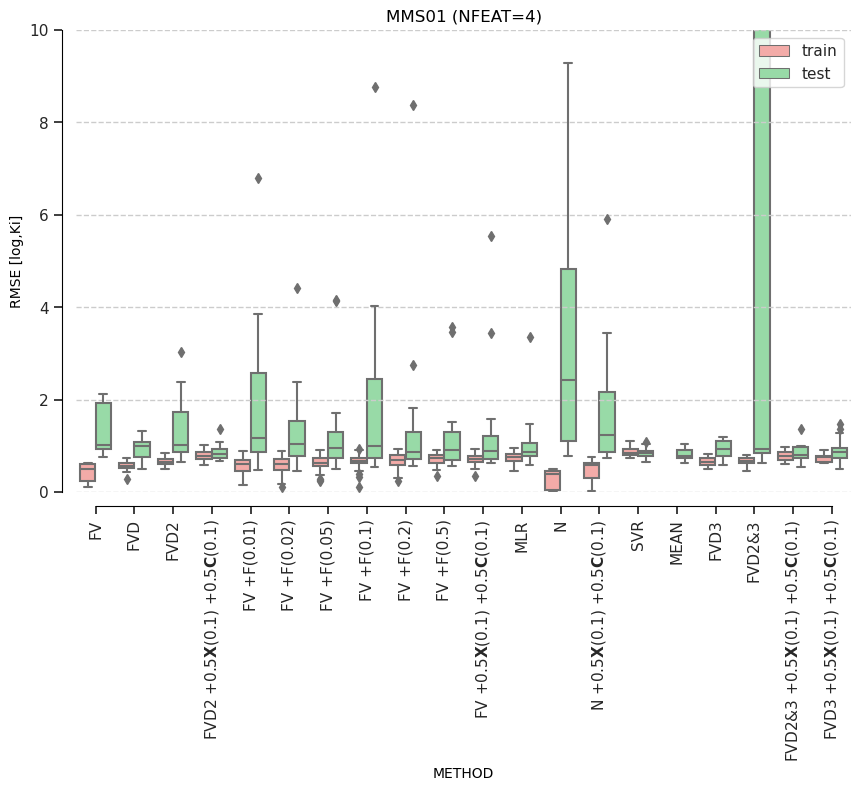

============================== MMS01 nfeats: 7 ==============================


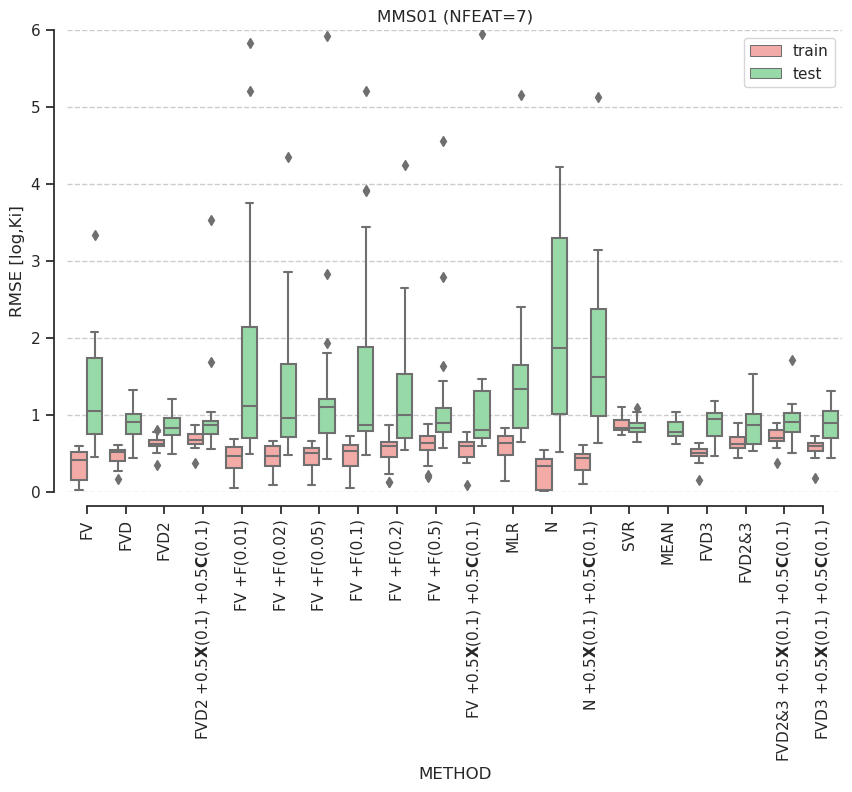

============================== MMS01 nfeats: 10 ==============================


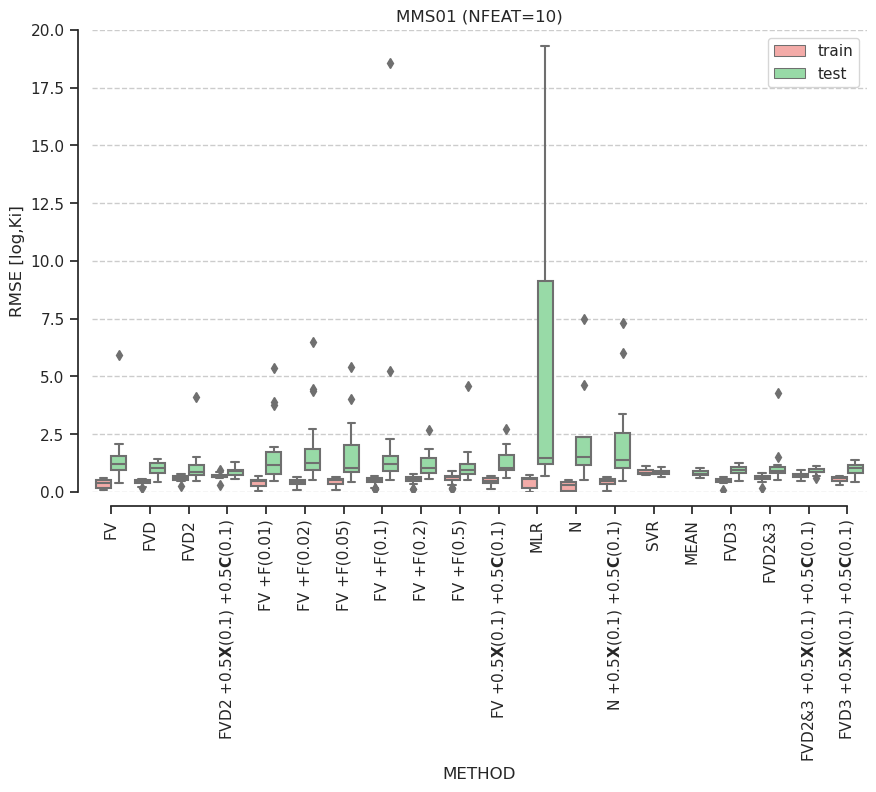

============================== MMS02 nfeats: 4 ==============================


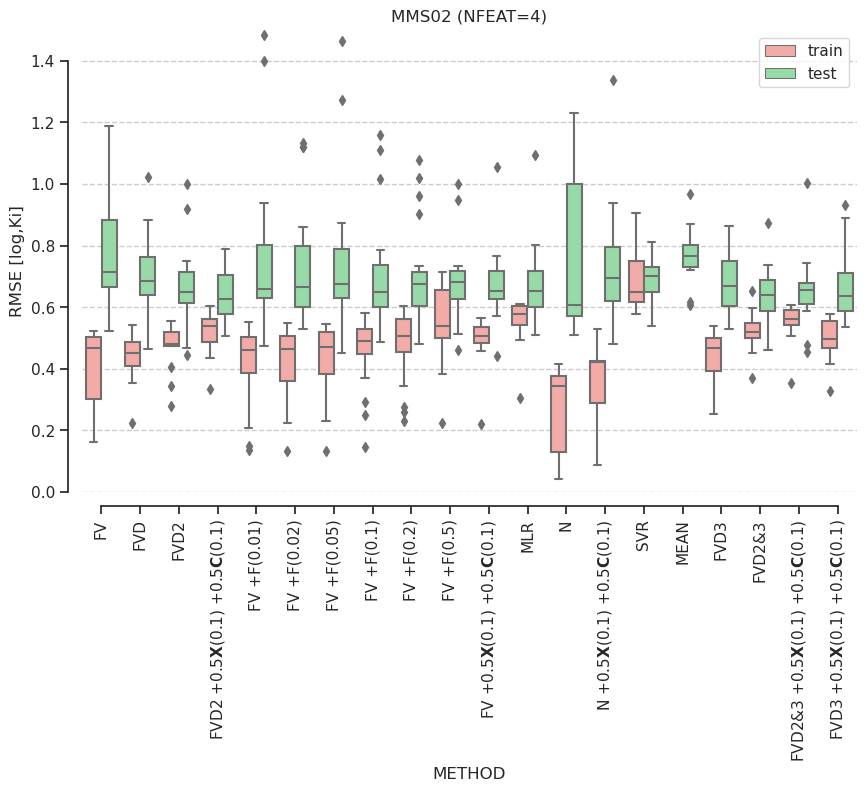

============================== MMS02 nfeats: 7 ==============================


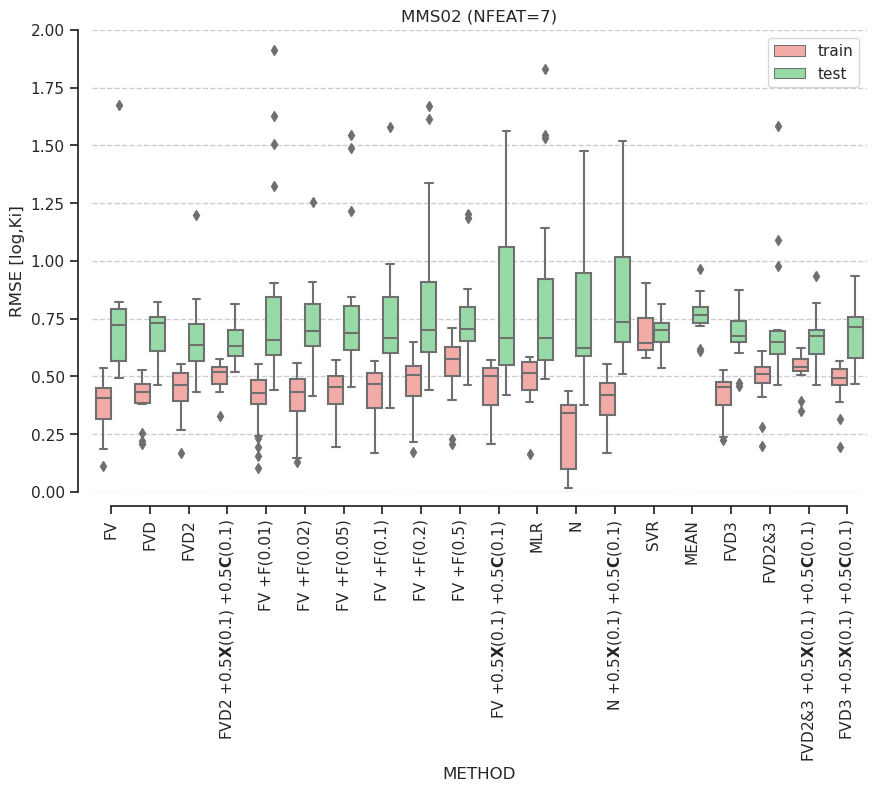

============================== MMS02 nfeats: 10 ==============================


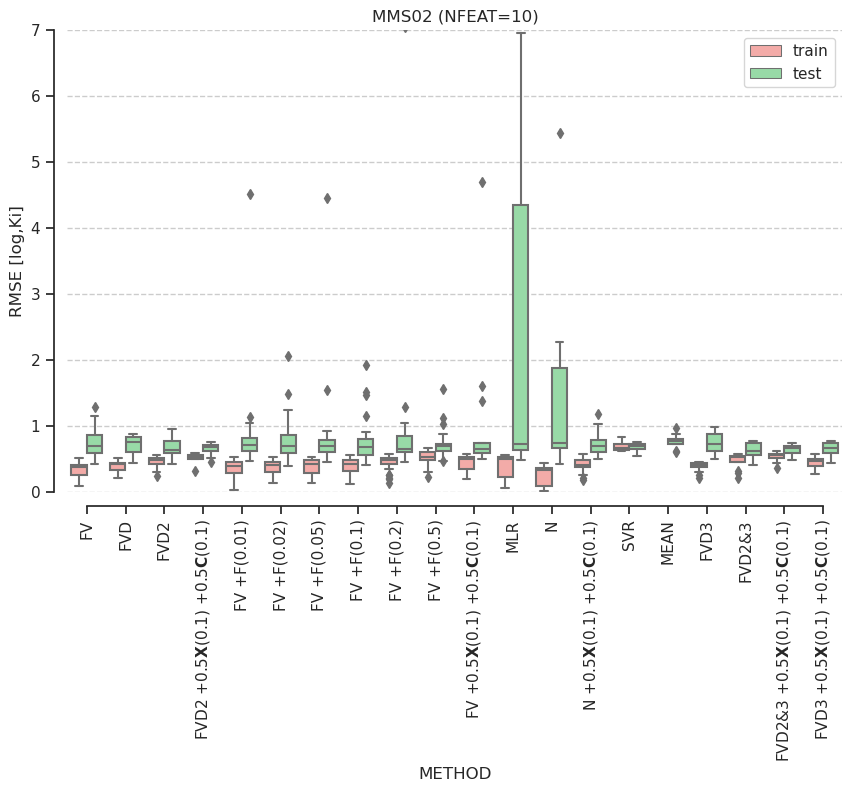

============================== MMS06 nfeats: 4 ==============================


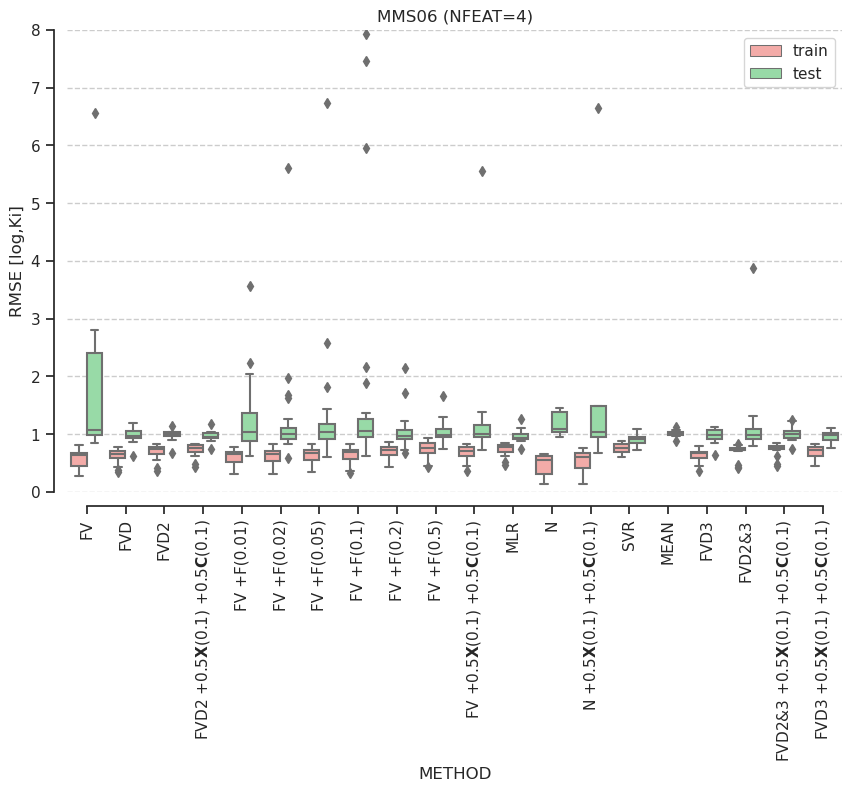

============================== MMS06 nfeats: 7 ==============================


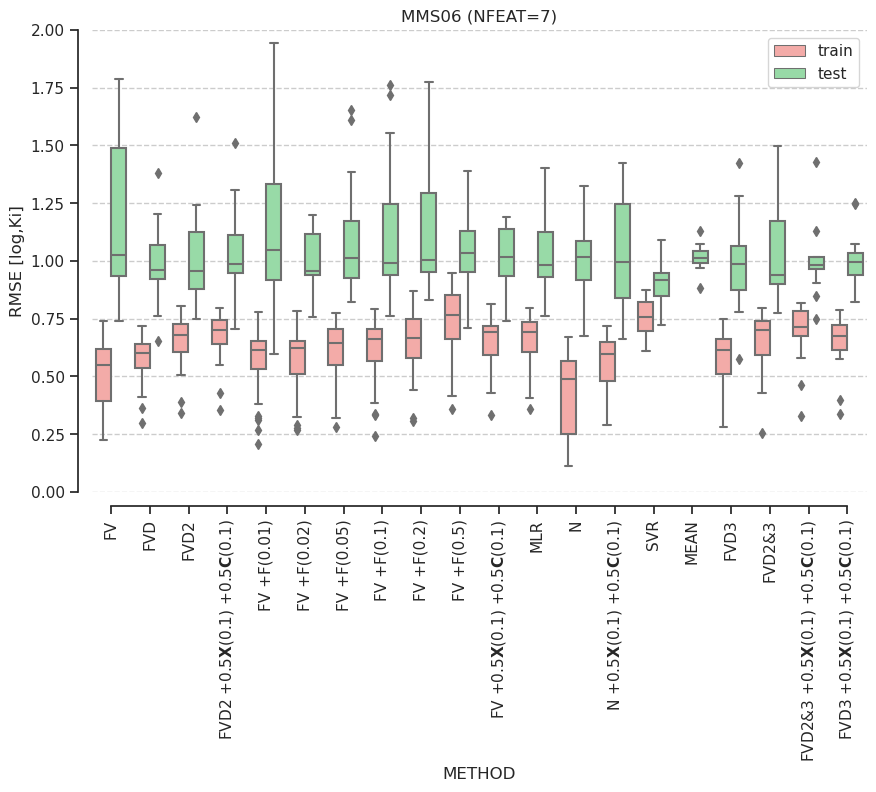

============================== MMS06 nfeats: 10 ==============================


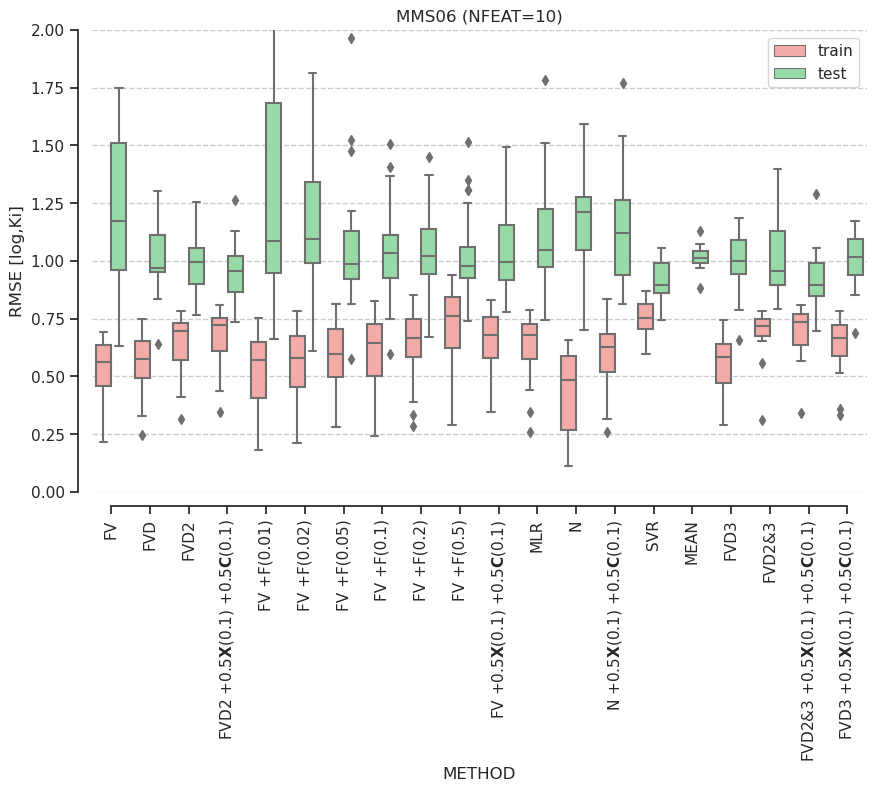

============================== MMS09 nfeats: 4 ==============================


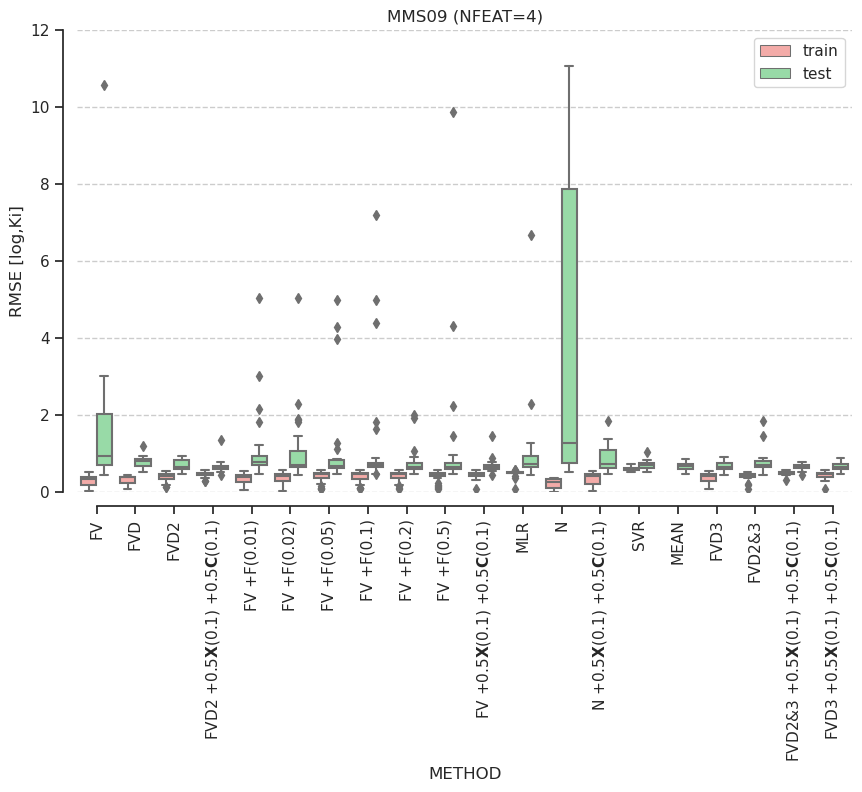

============================== MMS09 nfeats: 7 ==============================


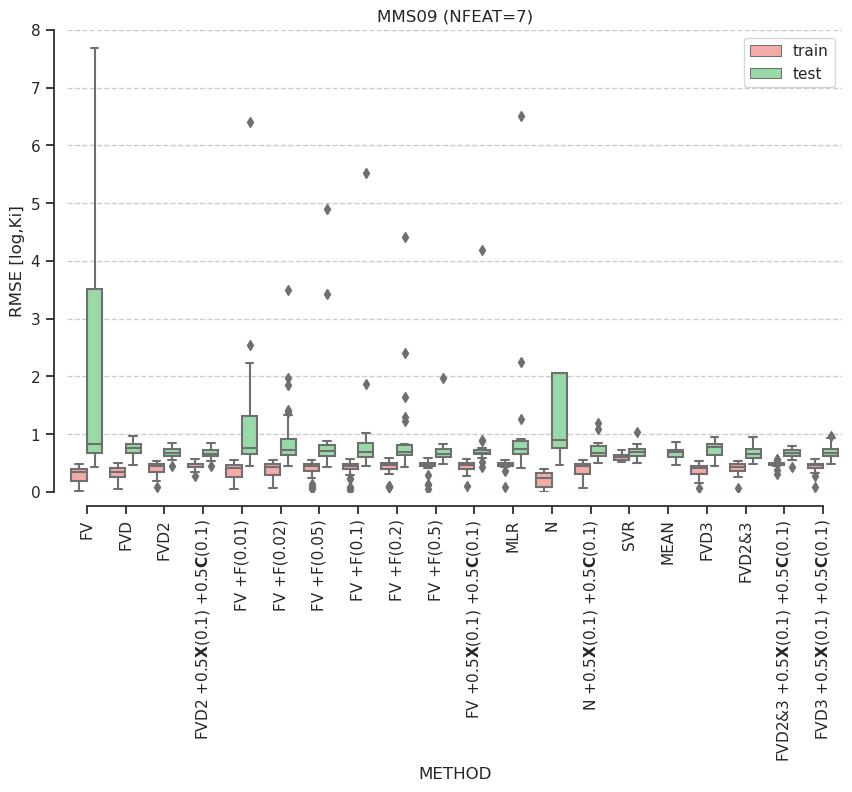

============================== MMS09 nfeats: 10 ==============================


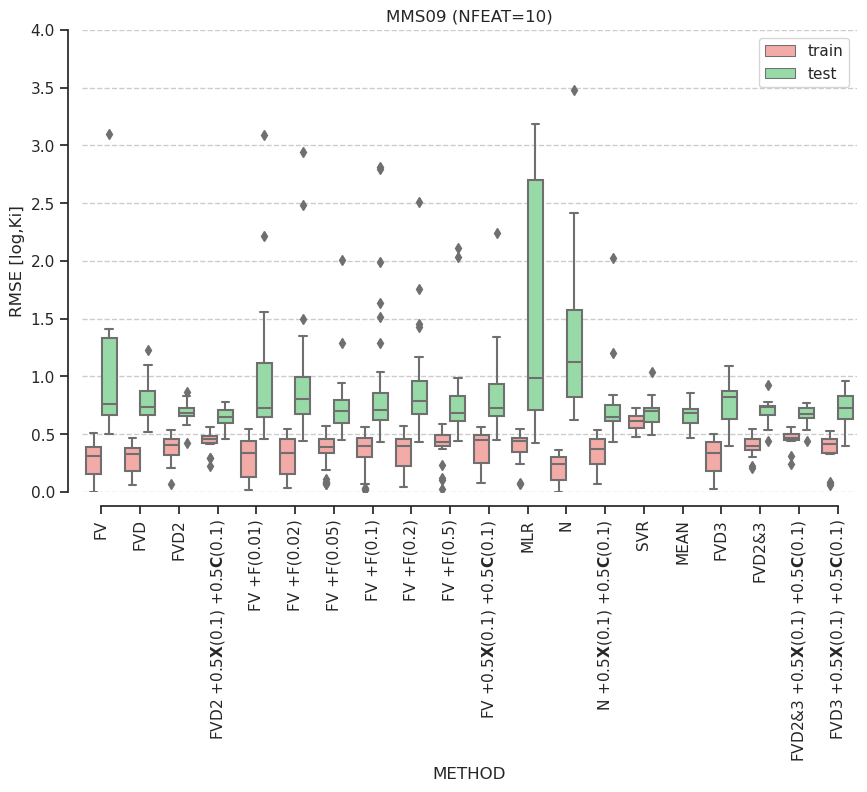

============================== MMS11 nfeats: 4 ==============================


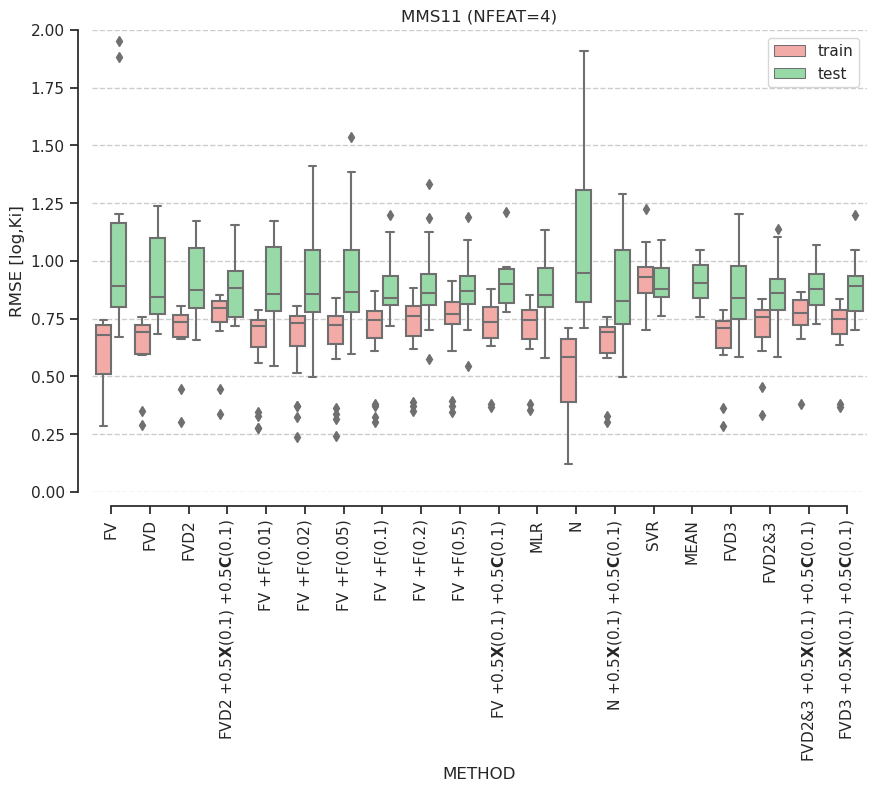

============================== MMS11 nfeats: 7 ==============================


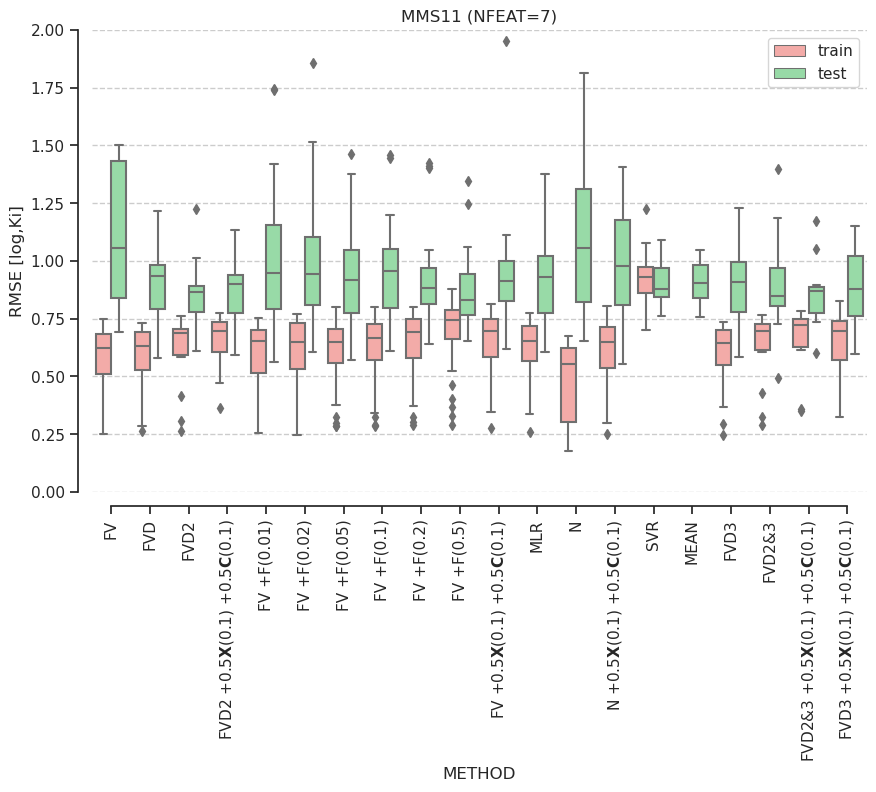

============================== MMS11 nfeats: 10 ==============================


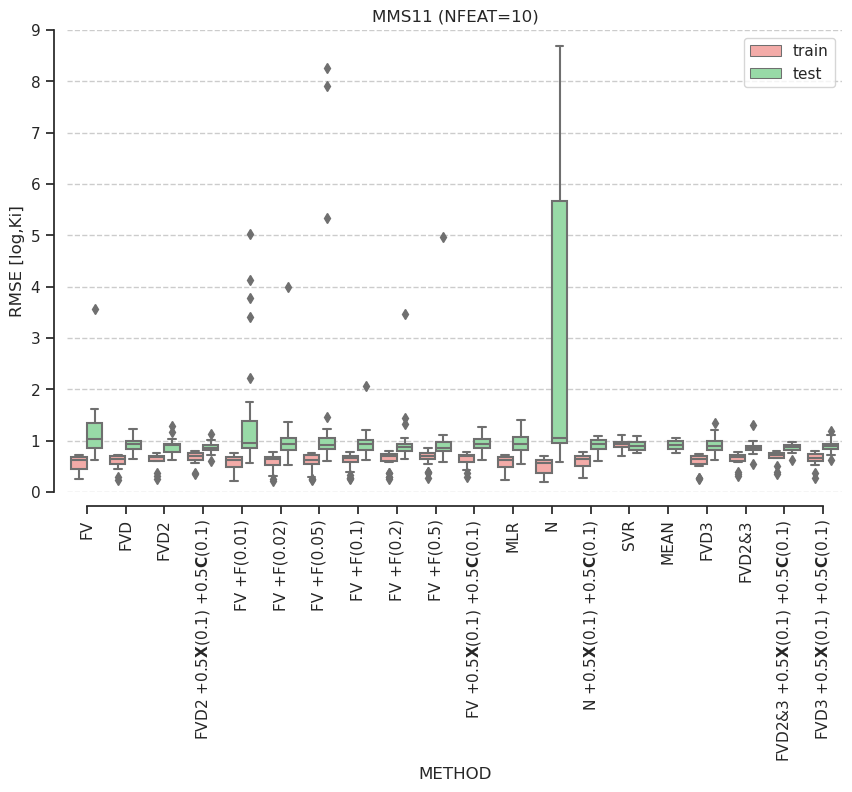

In [36]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

"""filter df by MMS01 and train_all"""
_ylim_rmse = { 4: {'MMS01': (0,10), 'MMS02': (0,1.5), 'MMS03': (0,3), 'MMS04': (0,5), 'MMS05': (0,10), 'MMS06': (0,8),
                  'MMS07': (0,9), 'MMS08': (0,12), 'MMS09': (0,12), 'MMS10': (0,4),  'MMS11': (0,2), 'MMS12': (0,6)},
               7: {'MMS01': (0,6), 'MMS02': (0,2), 'MMS03': (0,6), 'MMS04': (0,8), 'MMS05': (0,4), 'MMS06': (0,2),
                  'MMS07': (0,9), 'MMS08': (0,4), 'MMS09': (0,8), 'MMS10': (0,3),  'MMS11': (0,2), 'MMS12': (0,4)},
              10: {'MMS01': (0,20), 'MMS02': (0,7), 'MMS03': (0,4), 'MMS04': (0,4), 'MMS05': (0,4), 'MMS06': (0,2),
                  'MMS07': (0,5), 'MMS08': (0,8), 'MMS09': (0,4), 'MMS10': (0,3),  'MMS11': (0,9), 'MMS12': (0,5)},
             }

_ylim_r2   = { 4: {'MMS01': (-60,1), 'MMS02': (-2,1), 'MMS03': (-18,1), 'MMS04': (-30,1), 'MMS05': (-100,1), 'MMS06': (-39,1),
                   'MMS07': (-34,1), 'MMS08': (-200,1), 'MMS09': (-300,1), 'MMS10': (-13,1), 'MMS11': (-3,1), 'MMS12': (-30,1)},
               7: {'MMS01': (-34,1), 'MMS02': (-4,1), 'MMS03': (-37,1), 'MMS04': (-65,1), 'MMS05': (-10,1), 'MMS06': (-3,1),
                   'MMS07': (-35,1), 'MMS08': (-12,1), 'MMS09': (-80,1), 'MMS10': (-10,1), 'MMS11': (-3,1), 'MMS12': (-15,1)},
              10: {'MMS01': (-300,1), 'MMS02': (-85,1), 'MMS03': (-14,1), 'MMS04': (-23,1), 'MMS05': (-7,1), 'MMS06': (-4,1),
                   'MMS07': (-28,1), 'MMS08': (-28,1), 'MMS09': (-28,1), 'MMS10': (-8,1), 'MMS11': (-90,1), 'MMS12': (-10,1)},
              }

for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:
# for _mms in ['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']:
# for _mms in ['MMS03', 'MMS05']:
    for _n_feats in [4, 7, 10]:
    # for _n_feats in [4]:
    # for _n_feats in [10]:
        print(f"============================== {_mms} nfeats: {_n_feats} ==============================")
        _df = df[df["MMS"] == _mms]
        _df = _df[_df["N FEATURES"] == _n_feats]
        # print(len(_df))
        # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
        _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d=", "").replace("X", r"$\bf{X}$").replace("C", r"$\bf{C}$") for _method in _df["METHOD"]]
        # _df.loc[:, "METHOD"] = [_df.loc[_idx, "METHOD"] + f" f_{_df.loc[_idx, 'N FEATURES']:02}" for _idx in _df.index]
        # _df.sort_values(by=["METHOD"], inplace=True)

        _PLOT_RMSE = True
        if _PLOT_RMSE:

            # sns.set(style="whitegrid")
            plt.figure(figsize=(10, 6))
            plt.ylim(_ylim_rmse[_n_feats][_mms])

            sns.set(style="ticks", palette="pastel")

            # Draw a nested boxplot 
            # seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, 
            #                 saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
            _bplot = sns.boxplot(x="METHOD", y="RMSE",
                                palette=["r", "g", "b"],
                                hue="DATASET",
                                # hue="N FEATURES",
                                dodge=True,
                                data=_df)
            # print(_bplot["whiskers"])
            sns.despine(offset=10, trim=True)
            """rotate xticks"""
            plt.grid(axis="y", linestyle="--")
            plt.legend(loc="upper right")
            plt.xticks(rotation=90)
            plt.ylabel("RMSE [log,Ki]")
            plt.title(_mms+f" (NFEAT={_n_feats})")
            plt.savefig(f"boxplot_{_mms}_f{_n_feats}_rmse.png", dpi=300, bbox_inches="tight")
            plt.show()

        _PLOT_R2 = False
        if _PLOT_R2:
            # sns.set(style="whitegrid")
            plt.figure(figsize=(10, 6))
            plt.ylim(_ylim_r2[_n_feats][_mms])
            sns.set(style="ticks", palette="pastel")

            # Draw a nested boxplot 
            sns.boxplot(x="METHOD", y="R2",
                        palette=["r", "g", "b"],
                        hue="DATASET",
                        # hue="N FEATURES",
                        dodge=True,
                        data=_df)
            sns.despine(offset=10, trim=True)
            """rotate xticks"""
            plt.grid(axis="y", linestyle="--")
            plt.legend(loc="lower right")
            plt.xticks(rotation=90)
            plt.ylabel("R2")
            plt.title(_mms+f" (NFEAT={_n_feats})")
            plt.savefig(f"boxplot_{_mms}_f{_n_feats}_r2.png", dpi=300, bbox_inches="tight")
            plt.show()



show boxplot (each train ratio)

In [37]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

"""filter df by MMS01 and train_all"""
_ylim_rmse = { 4: {'MMS01': (0,10), 'MMS02': (0,1.5), 'MMS03': (0,3), 'MMS04': (0,5), 'MMS05': (0,10), 'MMS06': (0,8),
                  'MMS07': (0,9), 'MMS08': (0,12), 'MMS09': (0,12), 'MMS10': (0,4),  'MMS11': (0,2), 'MMS12': (0,6)},
               7: {'MMS01': (0,6), 'MMS02': (0,2), 'MMS03': (0,6), 'MMS04': (0,8), 'MMS05': (0,4), 'MMS06': (0,2),
                  'MMS07': (0,9), 'MMS08': (0,4), 'MMS09': (0,8), 'MMS10': (0,3),  'MMS11': (0,2), 'MMS12': (0,4)},
              10: {'MMS01': (0,20), 'MMS02': (0,7), 'MMS03': (0,4), 'MMS04': (0,4), 'MMS05': (0,4), 'MMS06': (0,2),
                  'MMS07': (0,5), 'MMS08': (0,8), 'MMS09': (0,4), 'MMS10': (0,3),  'MMS11': (0,9), 'MMS12': (0,5)},
             }

_ylim_r2   = { 4: {'MMS01': (-60,1), 'MMS02': (-2,1), 'MMS03': (-18,1), 'MMS04': (-30,1), 'MMS05': (-100,1), 'MMS06': (-39,1),
                   'MMS07': (-34,1), 'MMS08': (-200,1), 'MMS09': (-300,1), 'MMS10': (-13,1), 'MMS11': (-3,1), 'MMS12': (-30,1)},
               7: {'MMS01': (-34,1), 'MMS02': (-4,1), 'MMS03': (-37,1), 'MMS04': (-65,1), 'MMS05': (-10,1), 'MMS06': (-3,1),
                   'MMS07': (-35,1), 'MMS08': (-12,1), 'MMS09': (-80,1), 'MMS10': (-10,1), 'MMS11': (-3,1), 'MMS12': (-15,1)},
              10: {'MMS01': (-300,1), 'MMS02': (-85,1), 'MMS03': (-14,1), 'MMS04': (-23,1), 'MMS05': (-7,1), 'MMS06': (-4,1),
                   'MMS07': (-28,1), 'MMS08': (-28,1), 'MMS09': (-28,1), 'MMS10': (-8,1), 'MMS11': (-90,1), 'MMS12': (-10,1)},
              }

for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:
# for _mms in ['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']:
# for _mms in ['MMS03', 'MMS05']:
    for _n_feats in [4, 7, 10]:
    # for _n_feats in [4]:
    # for _n_feats in [10]:
        for _train_r in [0.2, 0.5, 0.8]:
        # for _train_r in [0.2]:
        # for _train_r in [0.8]:
            print(f"============================== {_mms} nfeats: {_n_feats}, train_r: {_train_r} ==============================")
            _df = df[df["MMS"] == _mms]
            _df = _df[_df["N FEATURES"] == _n_feats]
            _df = _df[_df["TRAIN RATIO"] == _train_r]
            print(len(_df))
            # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
            _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d=", "").replace("X", r"$\bf{X}$").replace("C", r"$\bf{C}$") for _method in _df["METHOD"]]
            # _df.loc[:, "METHOD"] = [_df.loc[_idx, "METHOD"] + f" f_{_df.loc[_idx, 'N FEATURES']:02}" for _idx in _df.index]
            
            # _df.sort_values(by=["METHOD"], inplace=True)

            _PLOT_RMSE = False
            if _PLOT_RMSE:

                # sns.set(style="whitegrid")
                plt.figure(figsize=(10, 6))
                
                _quants = pd.DataFrame(columns=[0.25, 0.5, 0.75])
                for _method in list(set(_df["METHOD"].values)):
                    _df_method = _df[(_df["DATASET"].str.contains("test")) & (_df["METHOD"] == _method)]
                    _quants.loc[_method, :] = _df_method["RMSE"].quantile([0.25, 0.5, 0.75])
                    _quants.loc[_method, "1.5IQR"] = (_quants.loc[_method, 0.75] - _quants.loc[_method, 0.25])*1.5 + _quants.loc[_method, 0.75]
                    _quants.loc[_method, "max"] = _df_method[_df_method["RMSE"] < _quants.loc[_method, "1.5IQR"]]["RMSE"].max()

                _max = math.ceil(_quants["max"].max())
                print(_max)
                plt.ylim(0, _max)
                # plt.ylim(_ylim_rmse[_n_feats][_mms])

                sns.set(style="ticks", palette="pastel")

                # Draw a nested boxplot 
                # seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, 
                #                 saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
                _bplot = sns.boxplot(x="METHOD", y="RMSE",
                                    palette=["r", "g", "b"],
                                    hue="DATASET",
                                    # hue="N FEATURES",
                                    dodge=True,
                                    data=_df)
                # print(_bplot["whiskers"])
                sns.despine(offset=10, trim=True)
                """rotate xticks"""
                plt.grid(axis="y", linestyle="--")
                plt.legend(loc="upper right")
                plt.xticks(rotation=90)
                plt.ylabel("RMSE [log,Ki]")
                plt.title(_mms+f" (NFEAT={_n_feats}, TRAIN_R={_train_r:.1f})")
                plt.savefig(f"boxplot_{_mms}_f{_n_feats}_rmse.png", dpi=300, bbox_inches="tight")
                plt.show()

            _PLOT_R2 = False
            if _PLOT_R2:
                # sns.set(style="whitegrid")
                plt.figure(figsize=(10, 6))
                plt.ylim(_ylim_r2[_n_feats][_mms])
                sns.set(style="ticks", palette="pastel")

                # Draw a nested boxplot 
                sns.boxplot(x="METHOD", y="R2",
                            palette=["r", "g", "b"],
                            hue="DATASET",
                            # hue="N FEATURES",
                            dodge=True,
                            data=_df)
                sns.despine(offset=10, trim=True)
                """rotate xticks"""
                plt.grid(axis="y", linestyle="--")
                plt.legend(loc="lower right")
                plt.xticks(rotation=90)
                plt.ylabel("R2")
                plt.title(_mms+f" (NFEAT={_n_feats})")
                plt.savefig(f"boxplot_{_mms}_f{_n_feats}_r2.png", dpi=300, bbox_inches="tight")
                plt.show()


============================== MMS01 nfeats: 4, train_r: 0.2 ==============================
241
============================== MMS01 nfeats: 4, train_r: 0.5 ==============================
254
============================== MMS01 nfeats: 4, train_r: 0.8 ==============================
255
============================== MMS01 nfeats: 7, train_r: 0.2 ==============================
253
============================== MMS01 nfeats: 7, train_r: 0.5 ==============================
250
============================== MMS01 nfeats: 7, train_r: 0.8 ==============================
255
============================== MMS01 nfeats: 10, train_r: 0.2 ==============================
253
============================== MMS01 nfeats: 10, train_r: 0.5 ==============================
245
============================== MMS01 nfeats: 10, train_r: 0.8 ==============================
254
============================== MMS02 nfeats: 4, train_r: 0.2 ==============================
246
============================== MMS02 

show boxplot

============================== MMS01 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

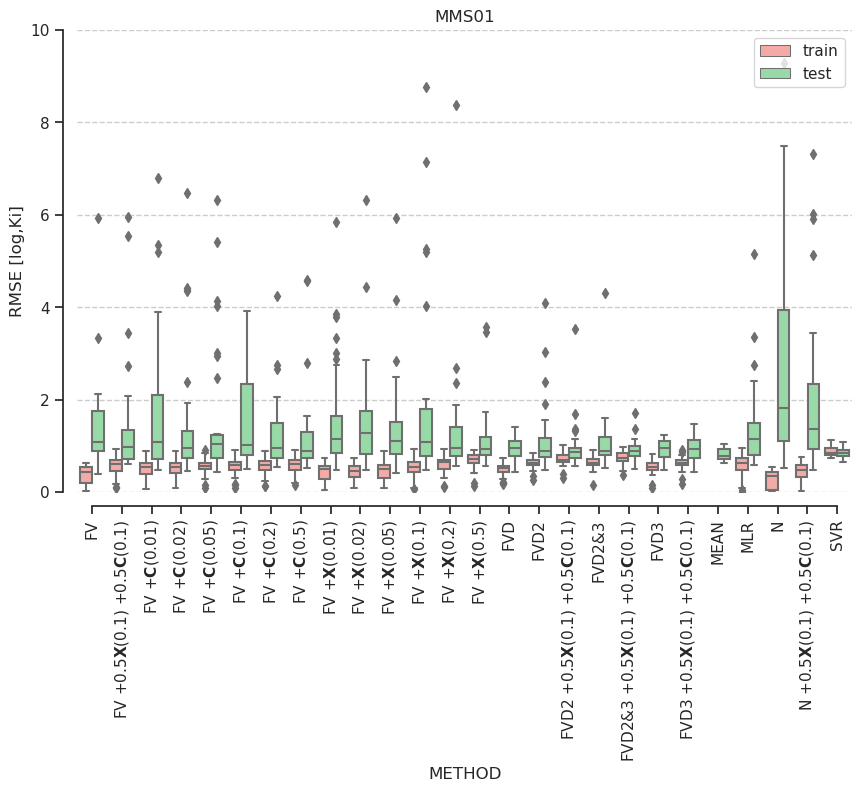

============================== MMS02 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

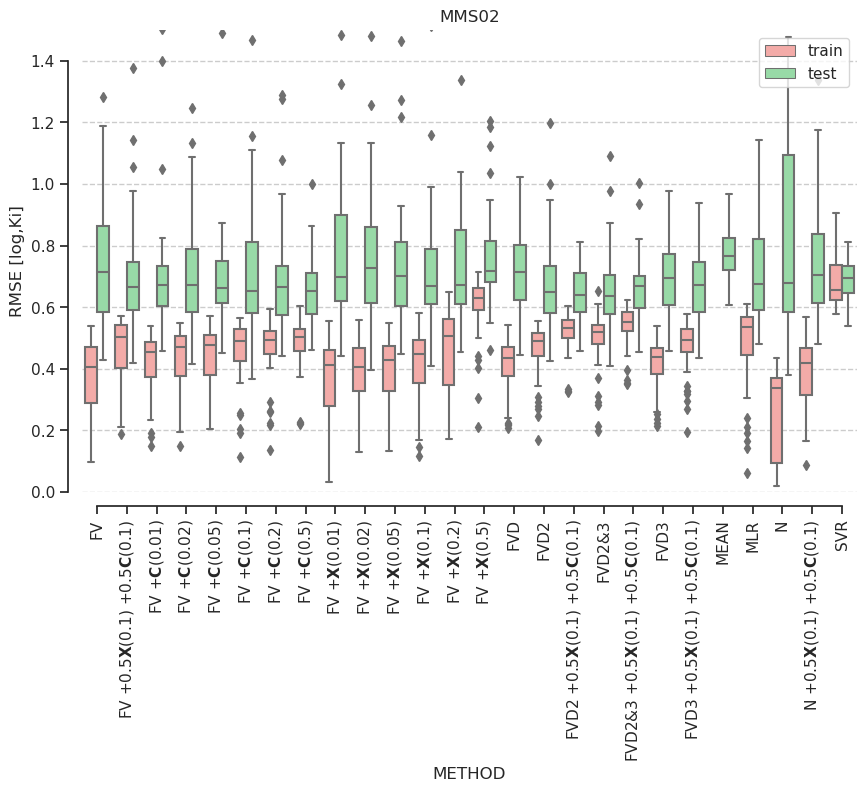

============================== MMS03 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

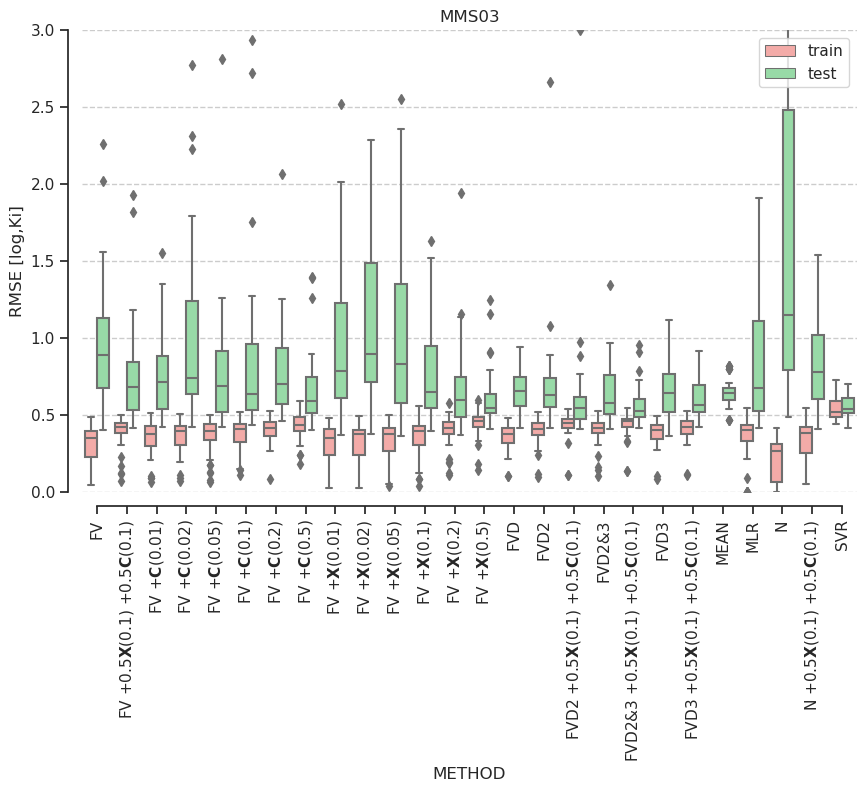

============================== MMS04 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

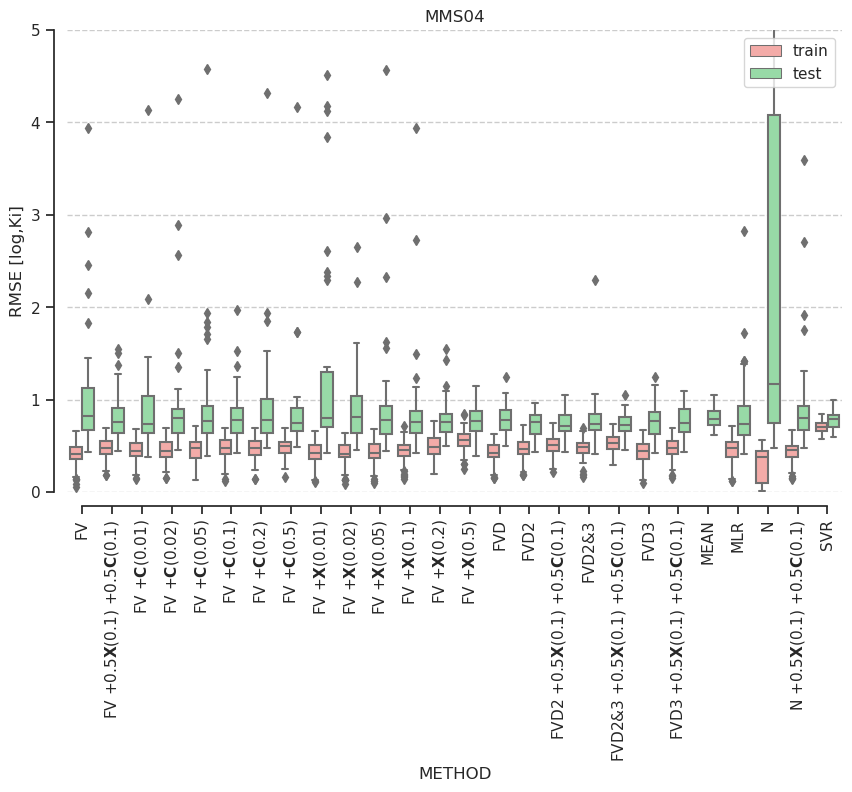

============================== MMS05 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

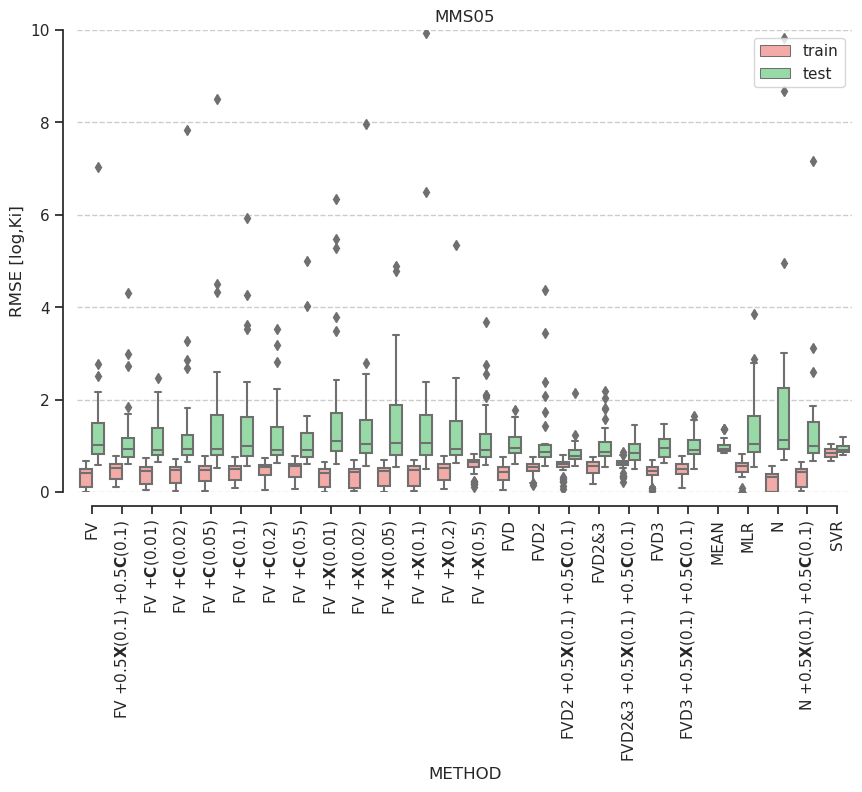

============================== MMS06 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

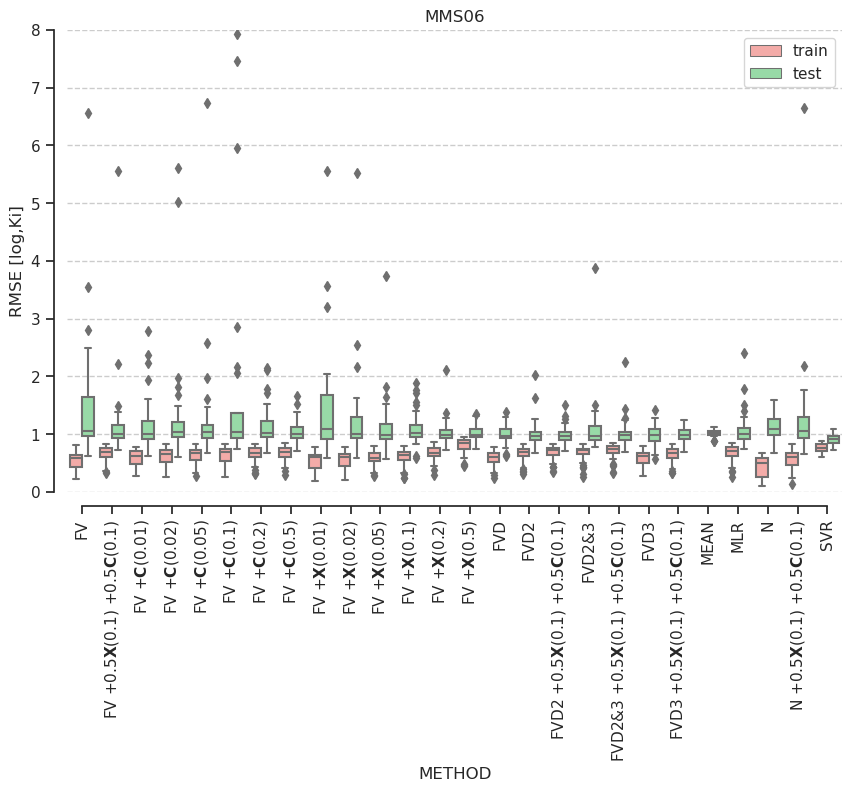

============================== MMS07 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

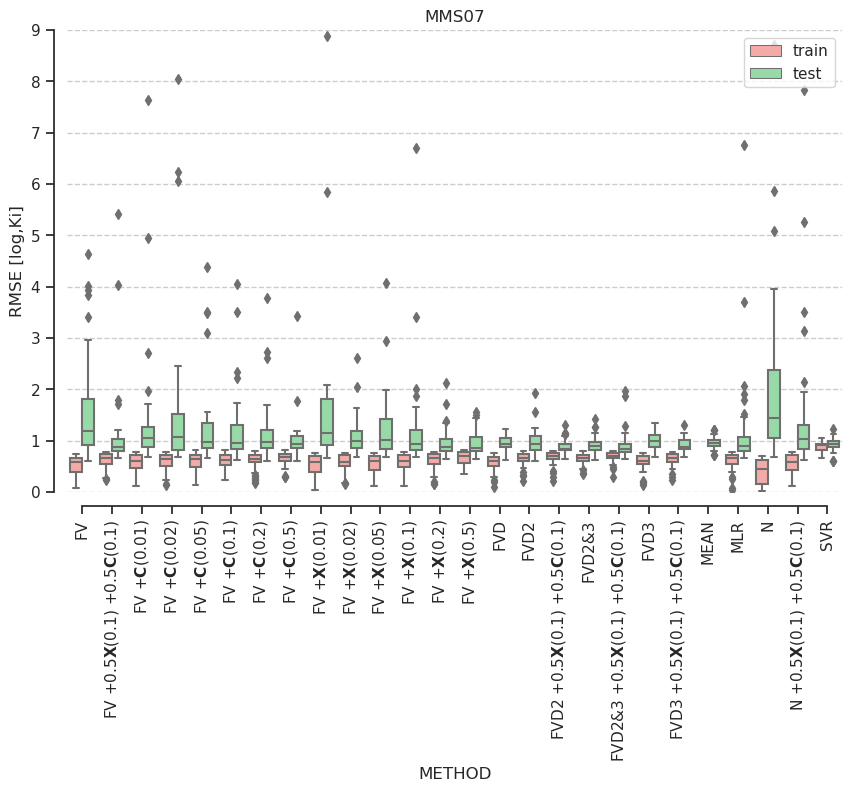

============================== MMS08 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

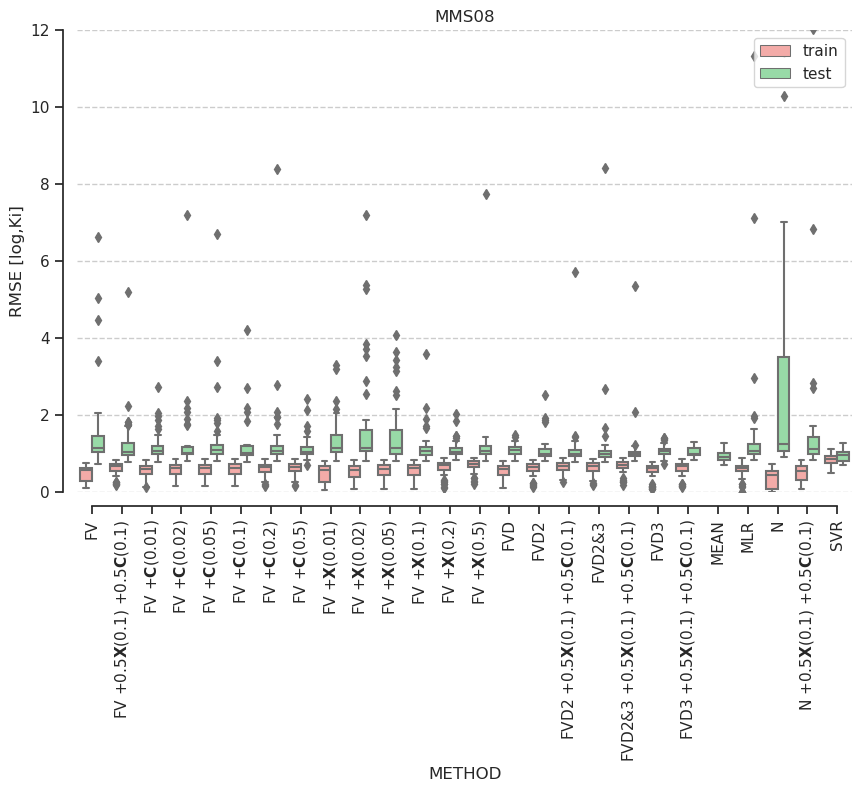

============================== MMS09 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

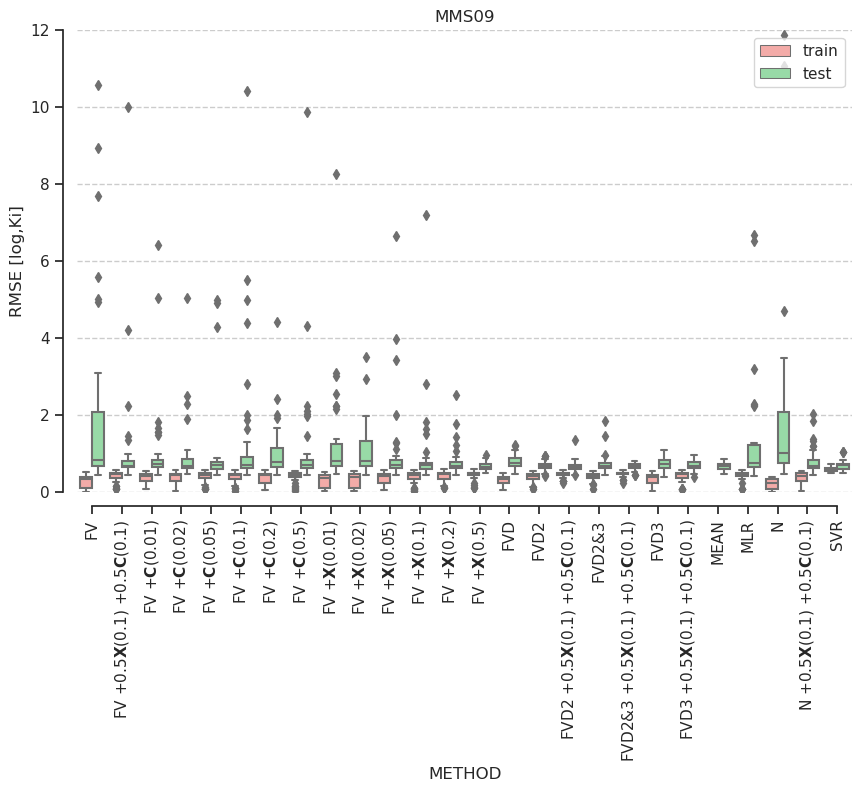

============================== MMS10 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

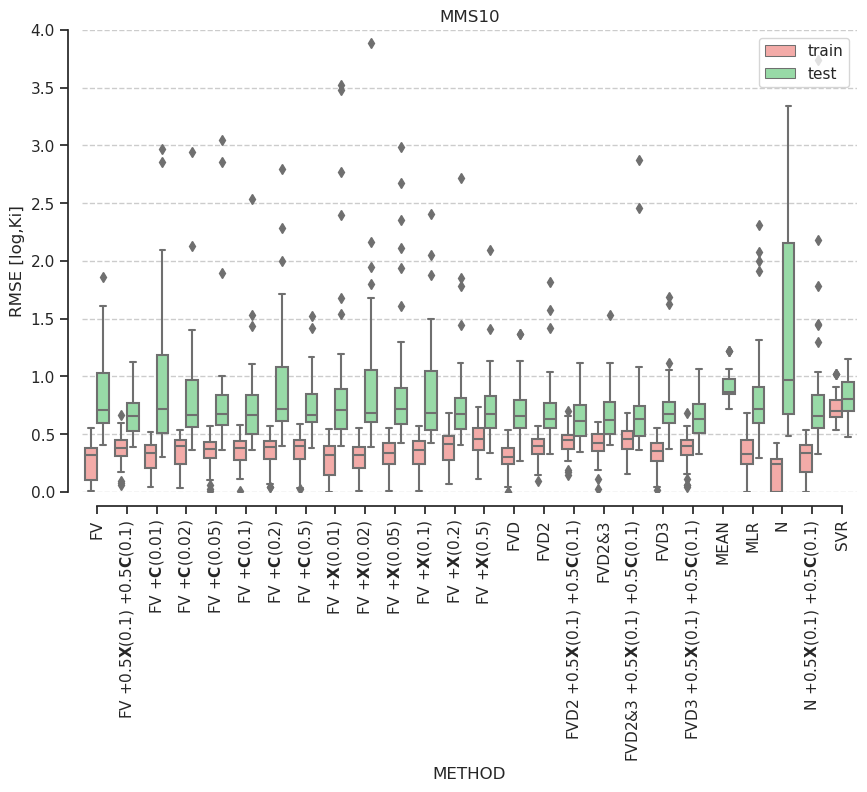

============================== MMS11 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

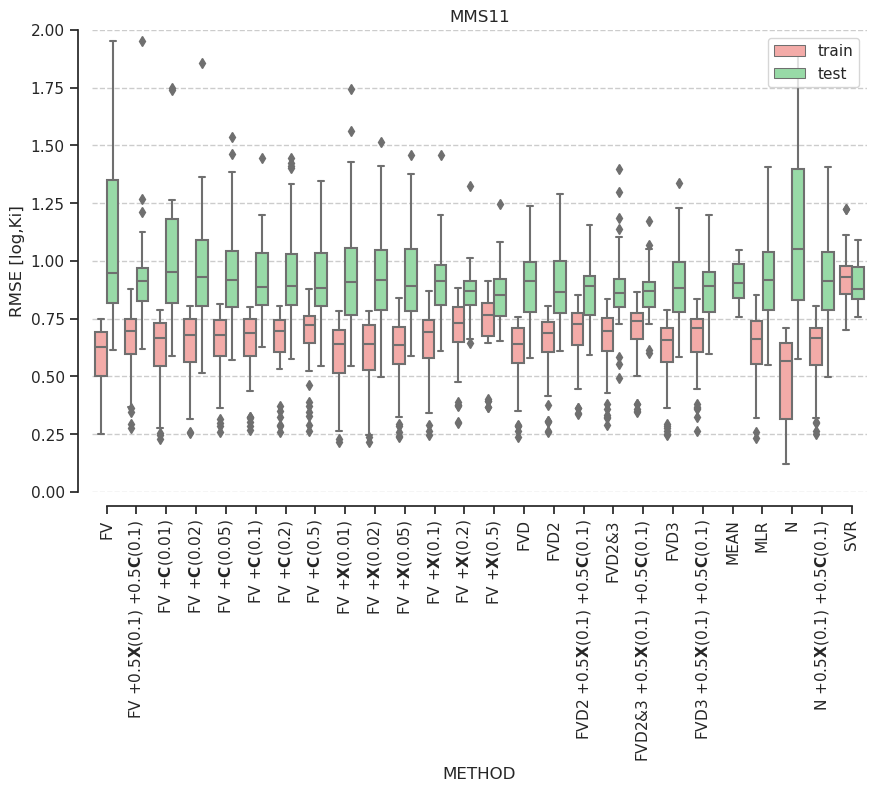

============================== MMS12 ==============================
{'FVD2', 'FV +1*X(d=.01)', 'FV', 'FV +1*C(d=.1)', 'FV +1*C(d=.02)', 'FV +1*C(d=.5)', 'FV +1*X(d=.5)', 'FV +1*C(d=.2)', 'FV +1*C(d=.05)', 'FV +1*X(d=.02)', 'FV +1*X(d=.05)', 'SVR', 'FVD2 +.5*X(d=.1) +.5*C(d=.1)', 'MEAN', 'FV +1*C(d=.01)', 'FVD3', 'N +.5*X(d=.1) +.5*C(d=.1)', 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)', 'FV +.5*X(d=.1) +.5*C(d=.1)', 'FV +1*X(d=.2)', 'N', 'FVD2&3', 'FVD3 +.5*X(d=.1) +.5*C(d=.1)', 'FVD', 'FV +1*X(d=.1)', 'MLR'}
{'FV +$\\bf{X}$(0.5)', 'FV +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FV +$\\bf{C}$(0.01)', 'FV +$\\bf{X}$(0.1)', 'FV +$\\bf{C}$(0.5)', 'FVD2', 'FV', 'FV +$\\bf{C}$(0.02)', 'FV +$\\bf{X}$(0.2)', 'FV +$\\bf{C}$(0.05)', 'SVR', 'FVD3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'MEAN', 'FVD3', 'FV +$\\bf{C}$(0.2)', 'FV +$\\bf{X}$(0.05)', 'FV +$\\bf{X}$(0.02)', 'FV +$\\bf{C}$(0.1)', 'FVD2&3', 'N', 'FVD', 'FV +$\\bf{X}$(0.01)', 'MLR', 'FVD2&3 +0.5$\\bf{X}$(0.1) +0.5$\\bf{C}$(0.1)', 'FVD2 +0.5$\\bf{X}$(0.1

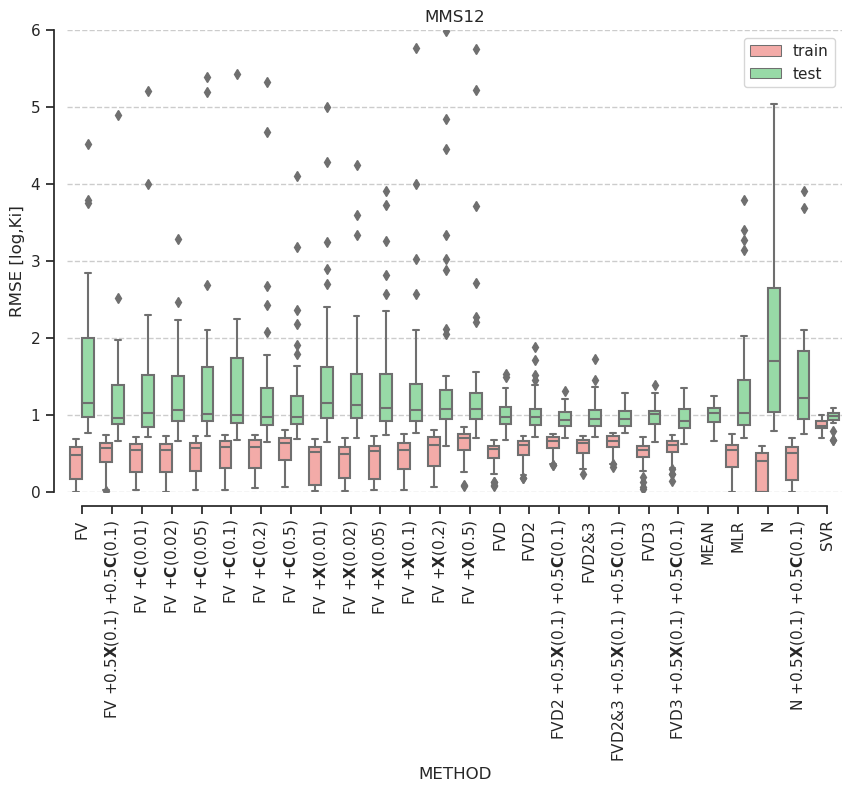

In [6]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

"""filter df by MMS01 and train_all"""
_ylim_rmse = {'MMS01': (0,10), 'MMS02': (0,1.5), 'MMS03': (0,3), 'MMS04': (0,5), 'MMS05': (0,10), 'MMS06': (0,8),
              'MMS07': (0,9), 'MMS08': (0,12), 'MMS09': (0,12), 'MMS10': (0,4),  'MMS11': (0,2), 'MMS12': (0,6)}

_ylim_r2   = {'MMS01': (-60,1), 'MMS02': (-2,1), 'MMS03': (-18,1), 'MMS04': (-30,1), 'MMS05': (-100,1), 'MMS06': (-39,1),
              'MMS07': (-34,1), 'MMS08': (-200,1), 'MMS09': (-300,1), 'MMS10': (-13,1), 'MMS11': (-3,1), 'MMS12': (-30,1)}

# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:
for _mms in ['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']:
# for _mms in ['MMS03', 'MMS05']:
    # for _n_feats in [4, 7, 10]:
    # for _n_feats in [4]:
    # for _n_feats in [10]:
    print(f"============================== {_mms} ==============================")
    _df = df[df["MMS"] == _mms].sort_values(by=["METHOD"])
    # _df = _df[_df["N FEATURES"] == _n_feats]
    # print(len(_df))
    # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
    print(set(_df.loc[:, "METHOD"].values))
    _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d=", "").replace("X", r"$\bf{X}$").replace("C", r"$\bf{C}$") for _method in _df["METHOD"]]
    # _df.loc[:, "METHOD"] = [_df.loc[_idx, "METHOD"] + f" f_{_df.loc[_idx, 'N FEATURES']:02}" for _idx in _df.index]
    # _df.sort_values(by=["METHOD"], inplace=True)
    print(set(_df.loc[:, "METHOD"].values))

    # break

    _PLOT_RMSE = True
    if _PLOT_RMSE:

        # sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        plt.ylim(_ylim_rmse[_mms])

        sns.set(style="ticks", palette="pastel")

        # Draw a nested boxplot 
        # seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, 
        #                 saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
        _bplot = sns.boxplot(x="METHOD", y="RMSE",
                            palette=["r", "g", "b"],
                            hue="DATASET",
                            # hue="N FEATURES",
                            dodge=True,
                            data=_df)
        # print(_bplot["whiskers"])
        sns.despine(offset=10, trim=True)
        """rotate xticks"""
        plt.grid(axis="y", linestyle="--")
        plt.legend(loc="upper right")
        plt.xticks(rotation=90)
        plt.ylabel("RMSE [log,Ki]")
        plt.title(_mms)
        plt.savefig(f"boxplot_{_mms}_rmse.png", dpi=300, bbox_inches="tight")
        plt.show()

    _PLOT_R2 = False
    if _PLOT_R2:
        # sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        plt.ylim(_ylim_r2[_n_feats][_mms])
        sns.set(style="ticks", palette="pastel")

        # Draw a nested boxplot 
        sns.boxplot(x="METHOD", y="R2",
                    palette=["r", "g", "b"],
                    hue="DATASET",
                    # hue="N FEATURES",
                    dodge=True,
                    data=_df)
        sns.despine(offset=10, trim=True)
        """rotate xticks"""
        plt.grid(axis="y", linestyle="--")
        plt.legend(loc="lower right")
        plt.xticks(rotation=90)
        plt.ylabel("R2")
        plt.title(_mms)
        plt.savefig(f"boxplot_{_mms}_r2.png", dpi=300, bbox_inches="tight")
        plt.show()



boxplot compact (each setting)

============================== MMS01 nfeats: 4 ==============================
750


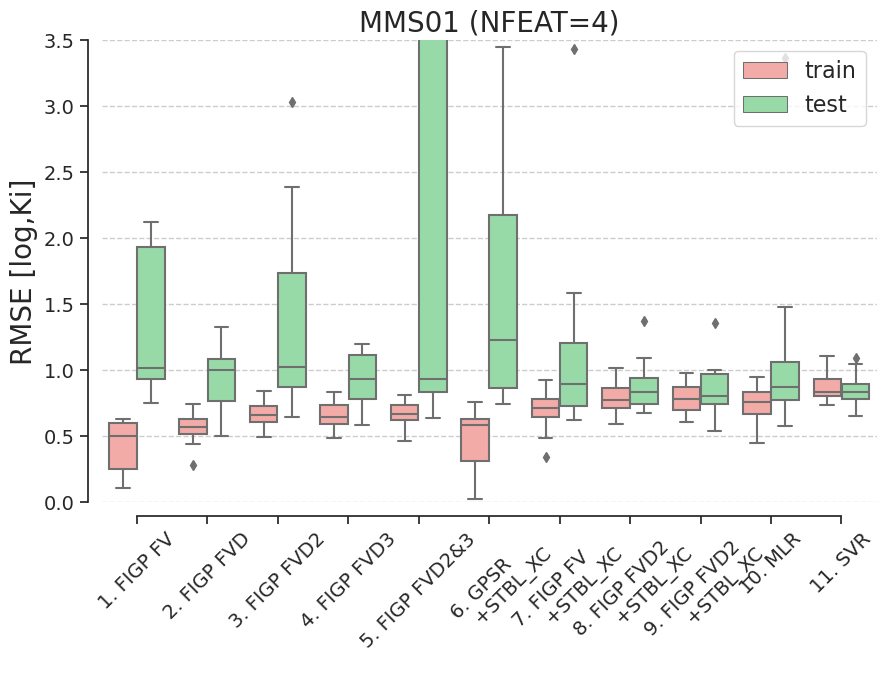

============================== MMS01 nfeats: 7 ==============================
758


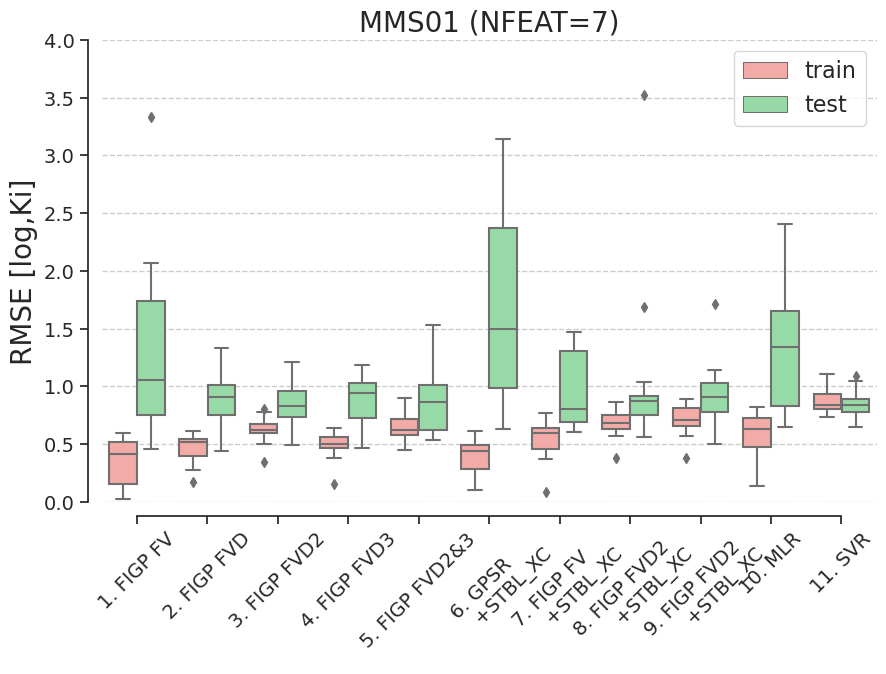

============================== MMS01 nfeats: 10 ==============================
752


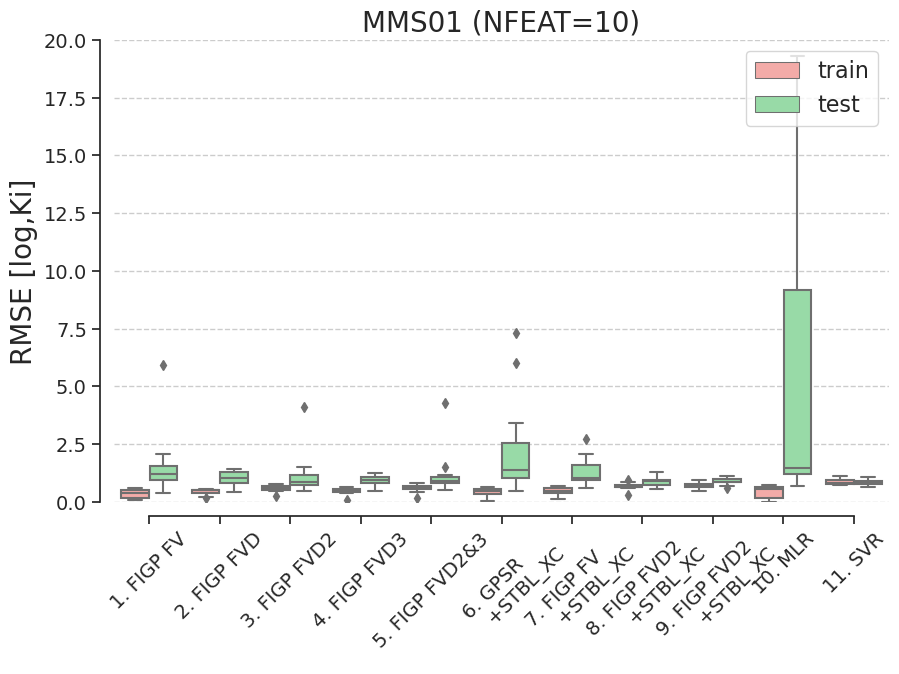

============================== MMS02 nfeats: 4 ==============================
749


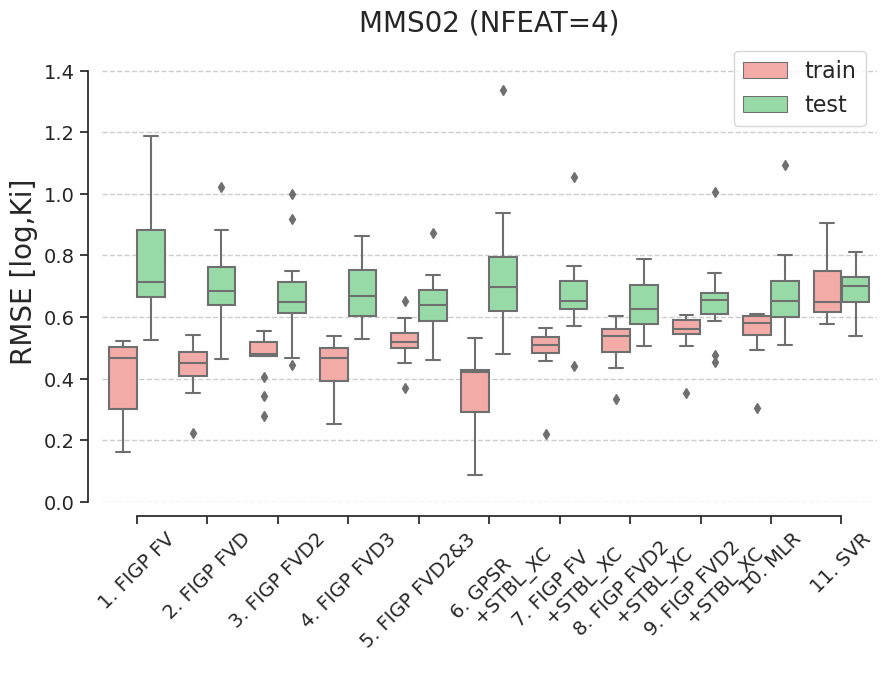

============================== MMS02 nfeats: 7 ==============================
752


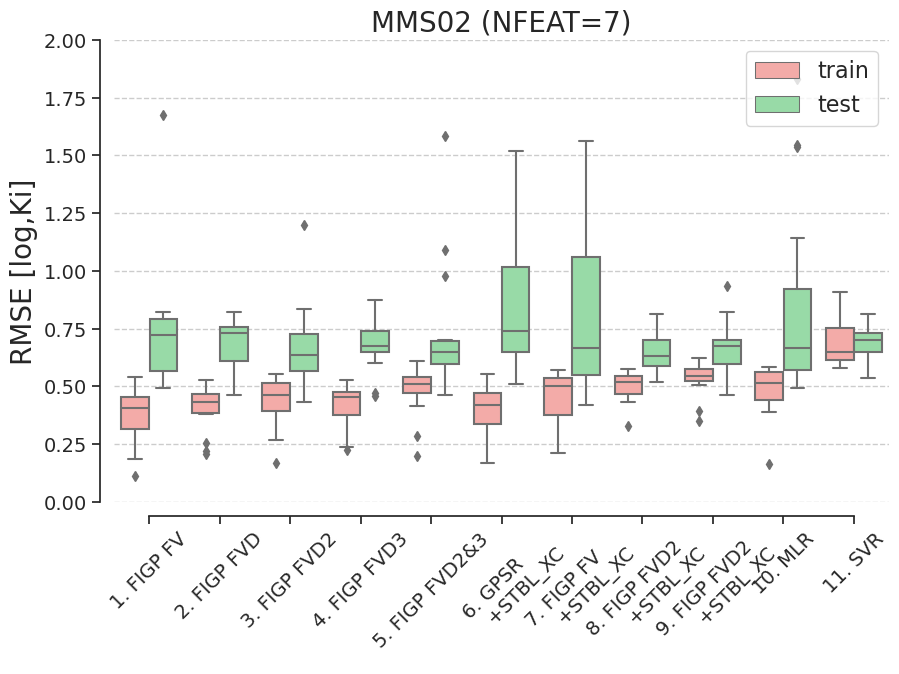

============================== MMS02 nfeats: 10 ==============================
740


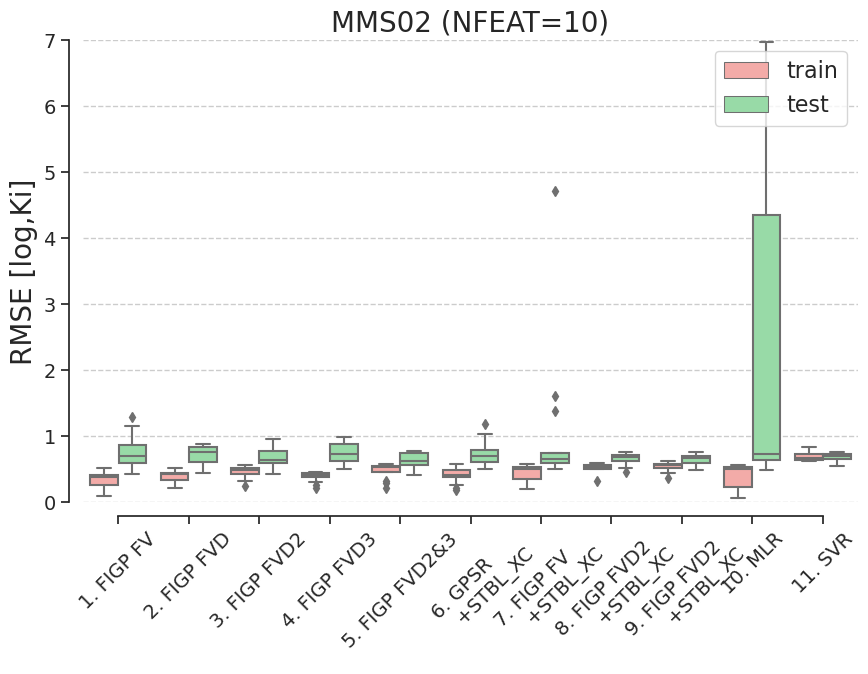

============================== MMS03 nfeats: 4 ==============================
740


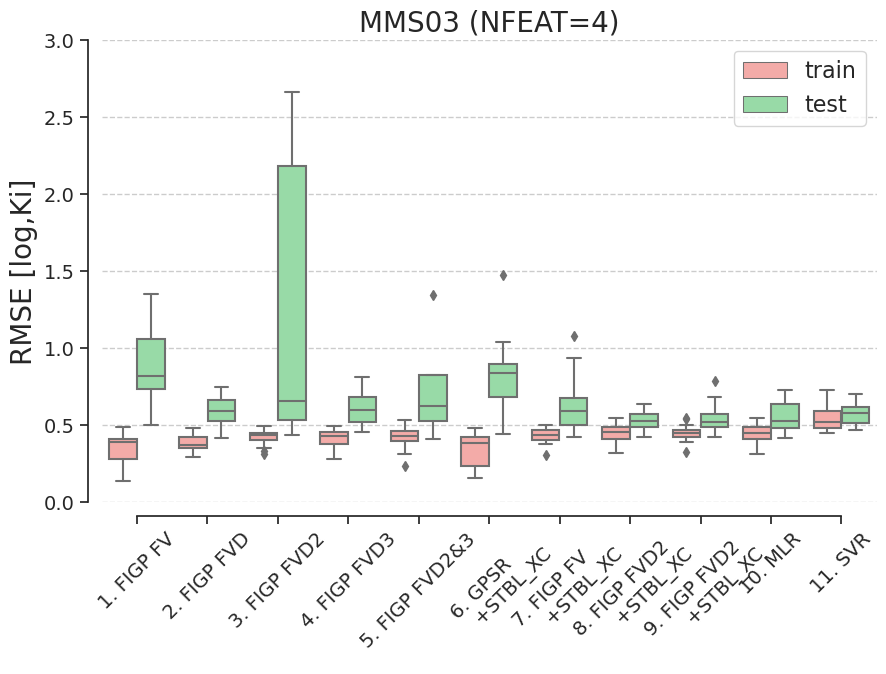

============================== MMS03 nfeats: 7 ==============================
736


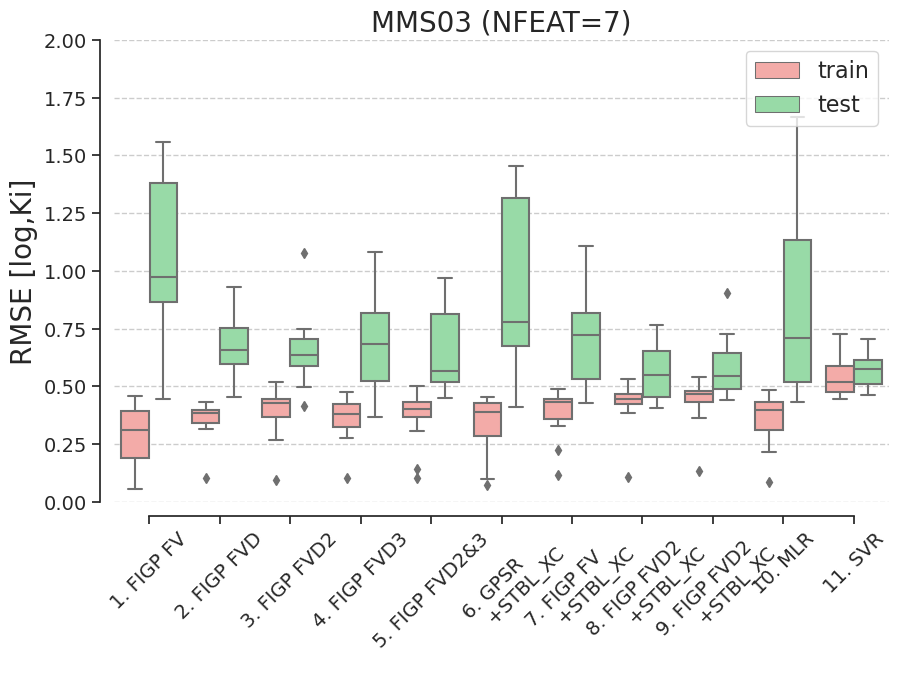

============================== MMS03 nfeats: 10 ==============================
733


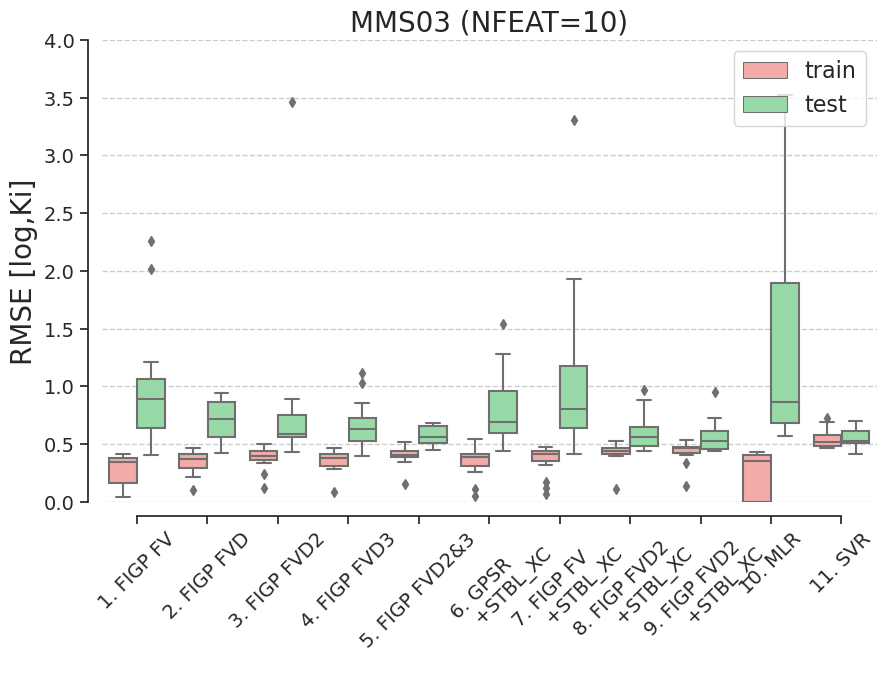

============================== MMS04 nfeats: 4 ==============================
765


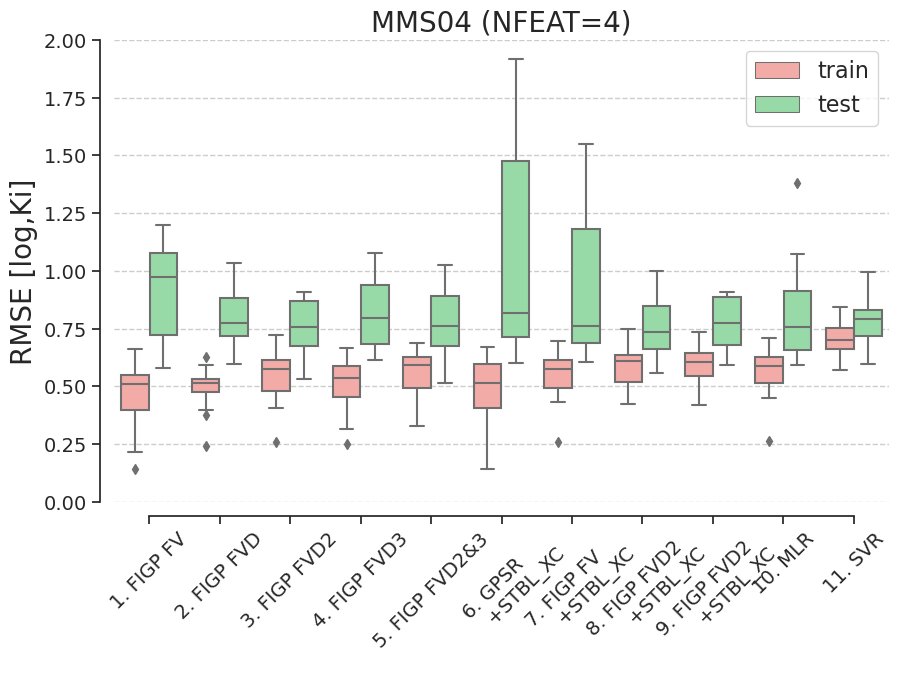

============================== MMS04 nfeats: 7 ==============================
758


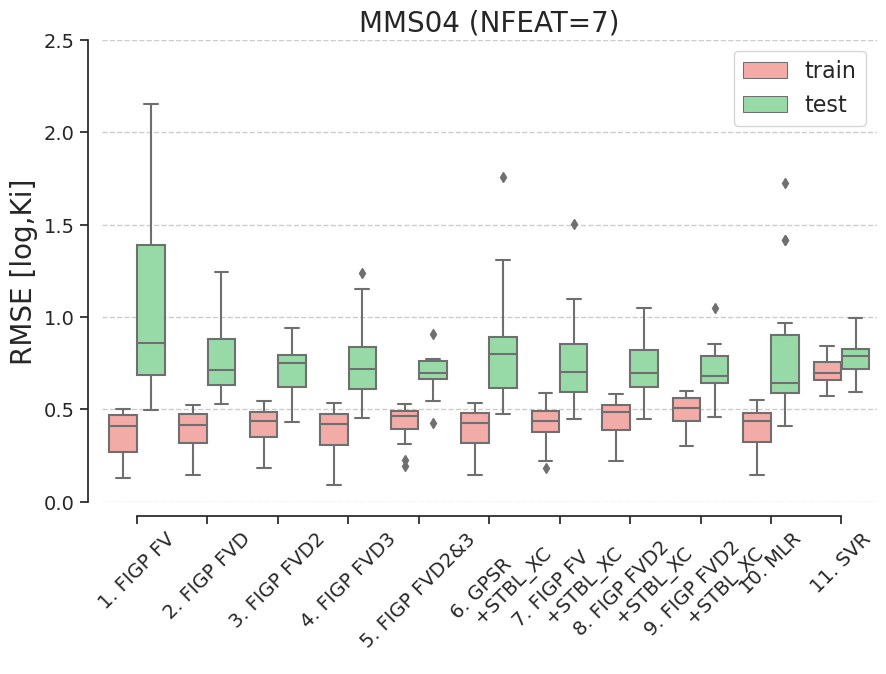

============================== MMS04 nfeats: 10 ==============================
756


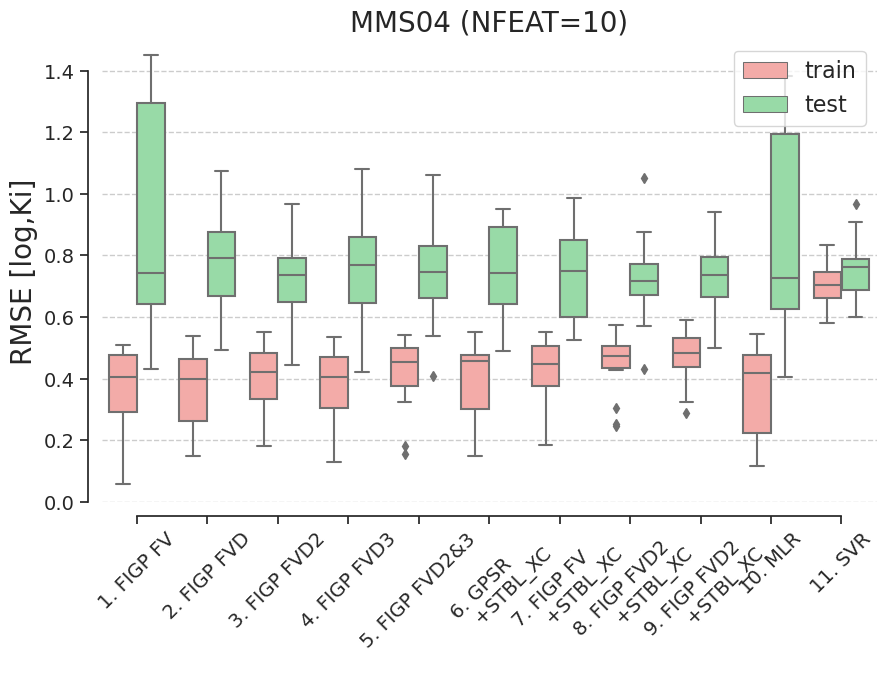

============================== MMS05 nfeats: 4 ==============================
732


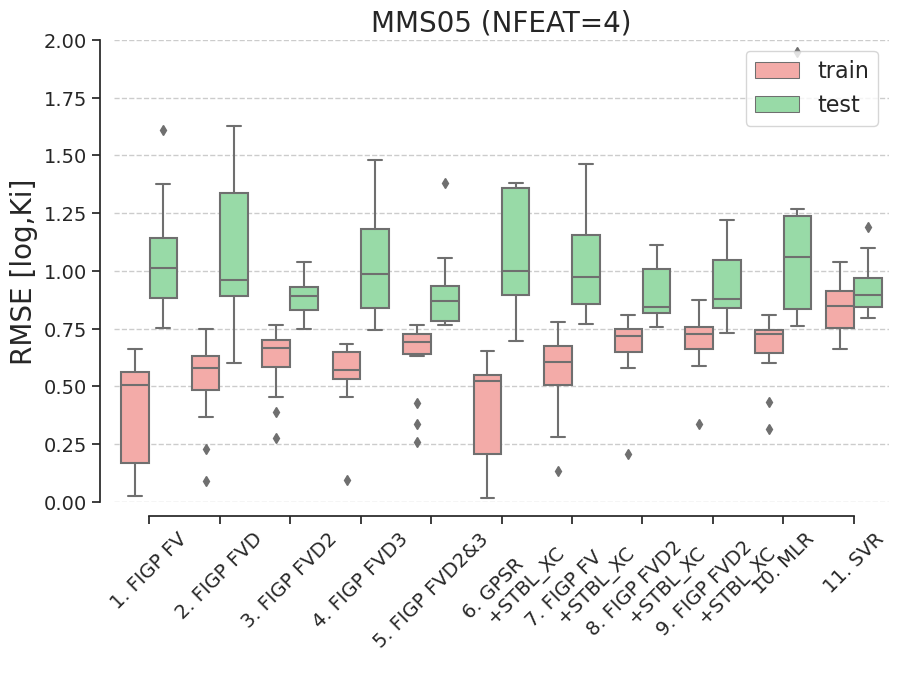

============================== MMS05 nfeats: 7 ==============================
746


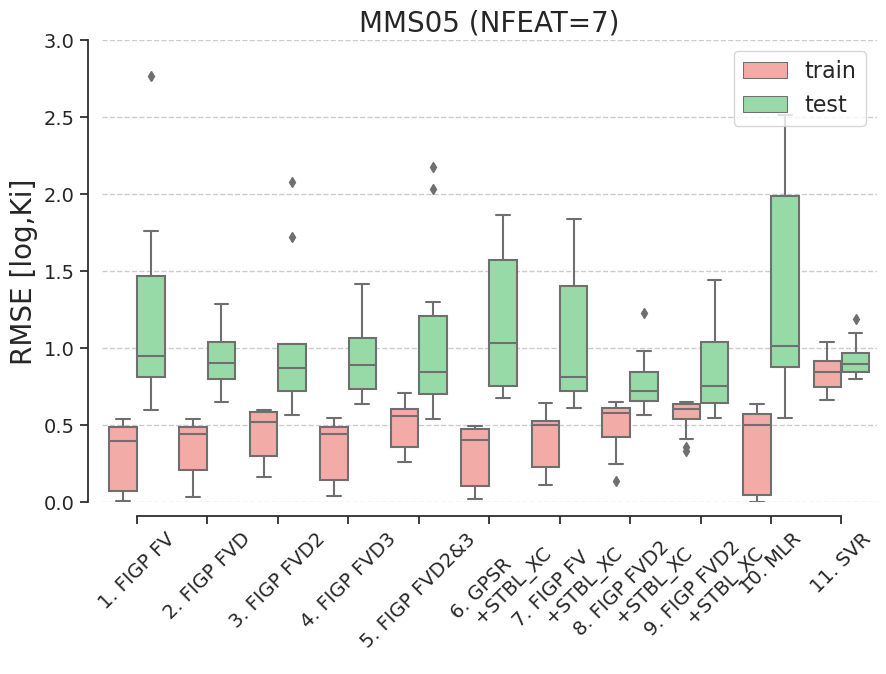

============================== MMS05 nfeats: 10 ==============================
749


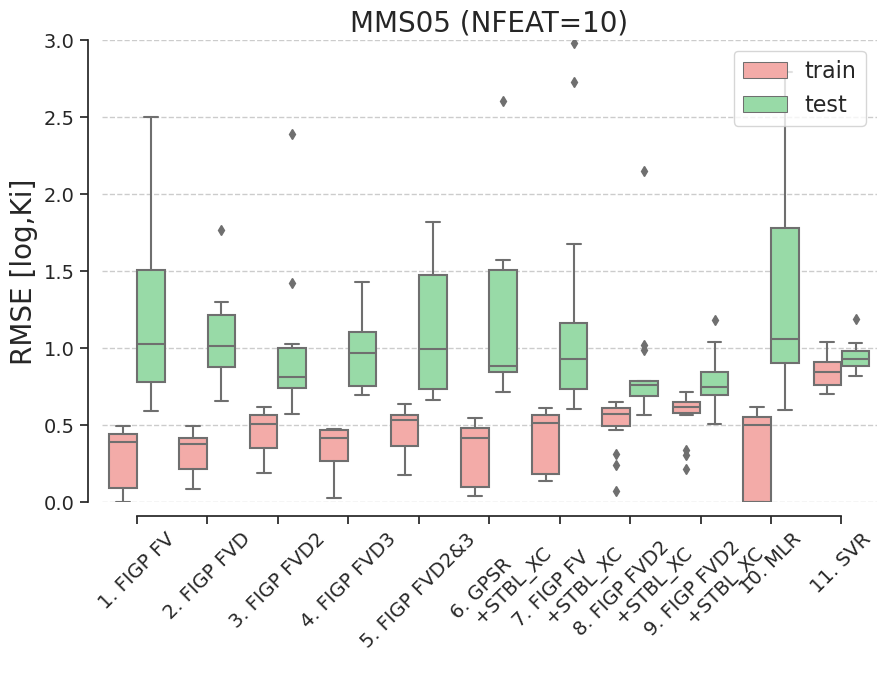

============================== MMS06 nfeats: 4 ==============================
745


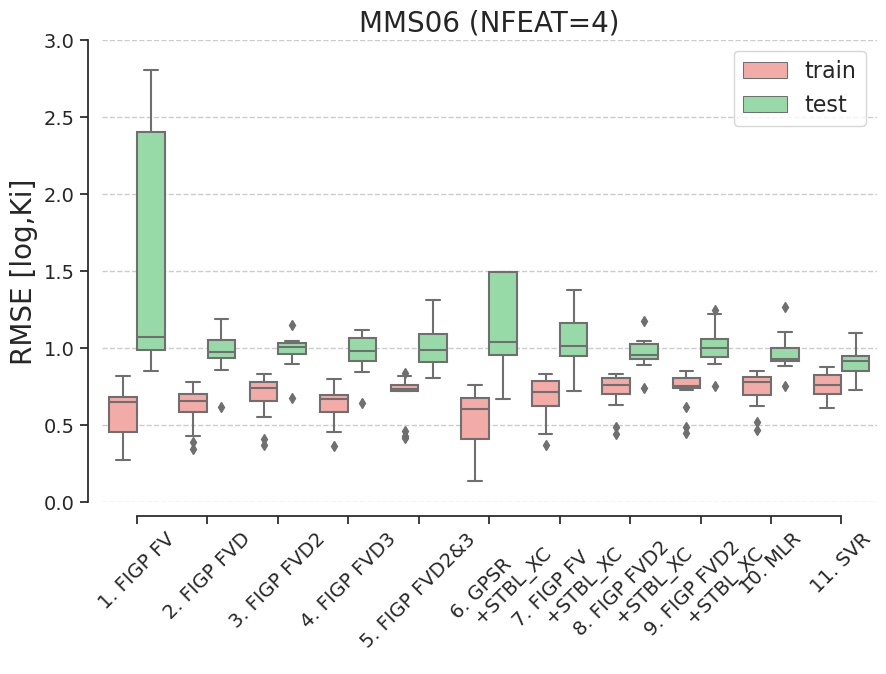

============================== MMS06 nfeats: 7 ==============================
731


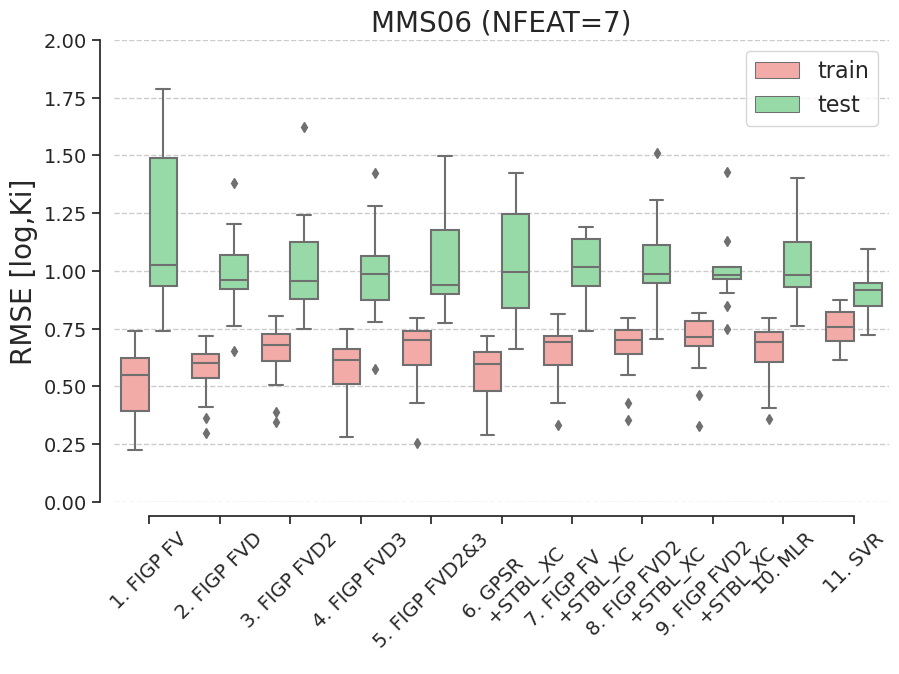

============================== MMS06 nfeats: 10 ==============================
723


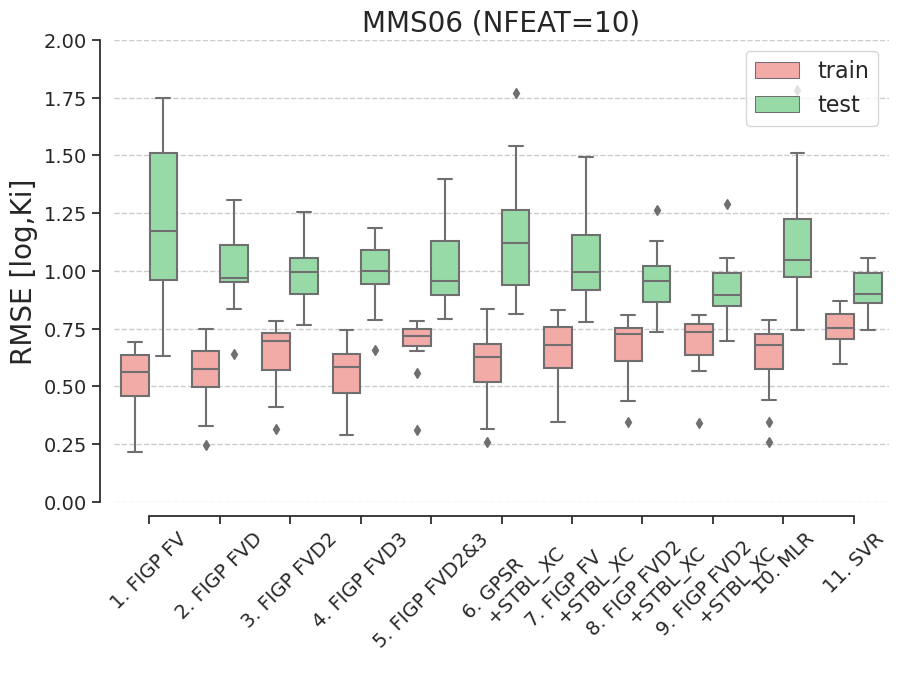

============================== MMS07 nfeats: 4 ==============================
747


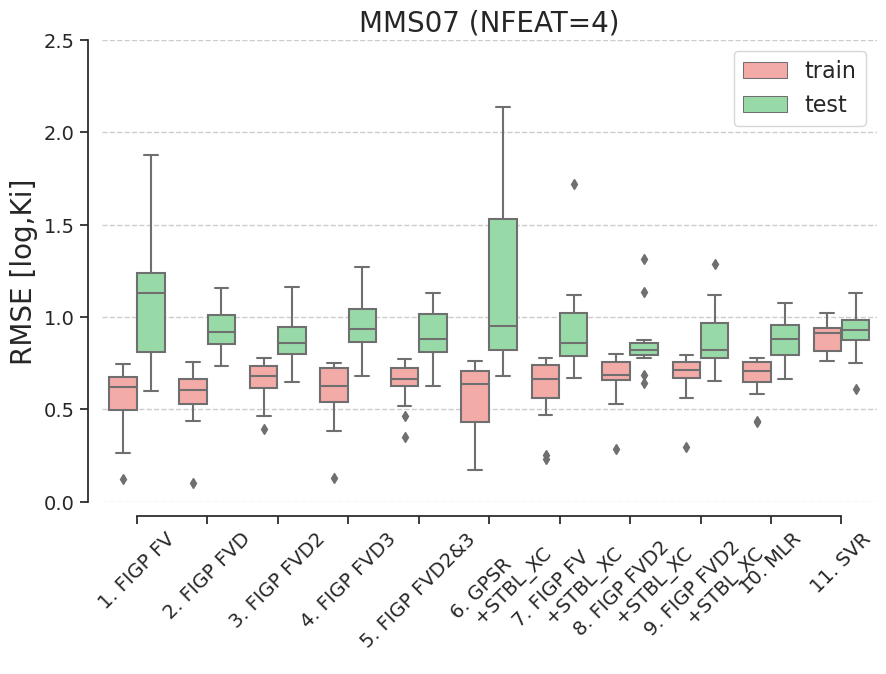

============================== MMS07 nfeats: 7 ==============================
747


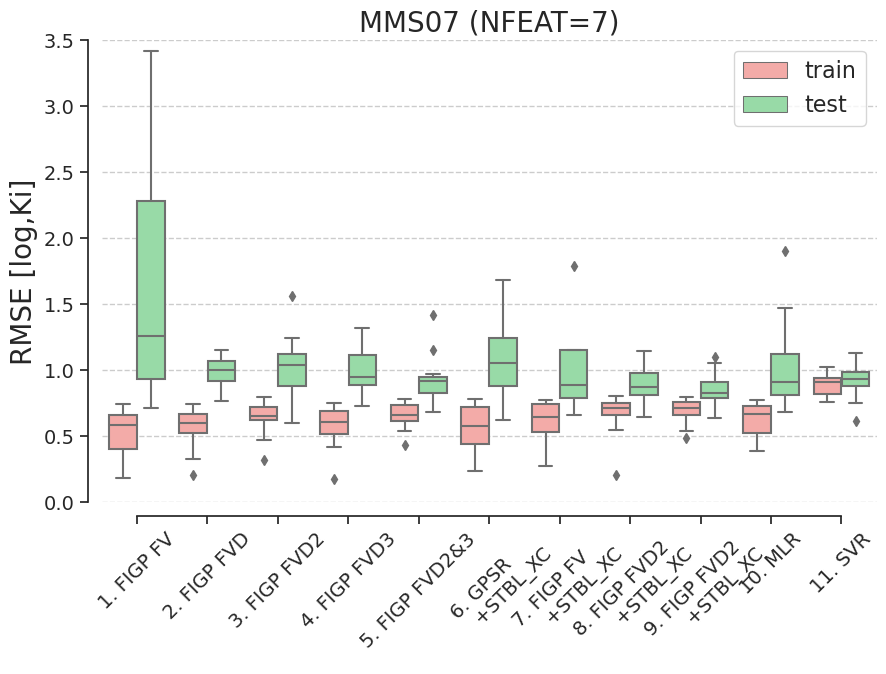

============================== MMS07 nfeats: 10 ==============================
743


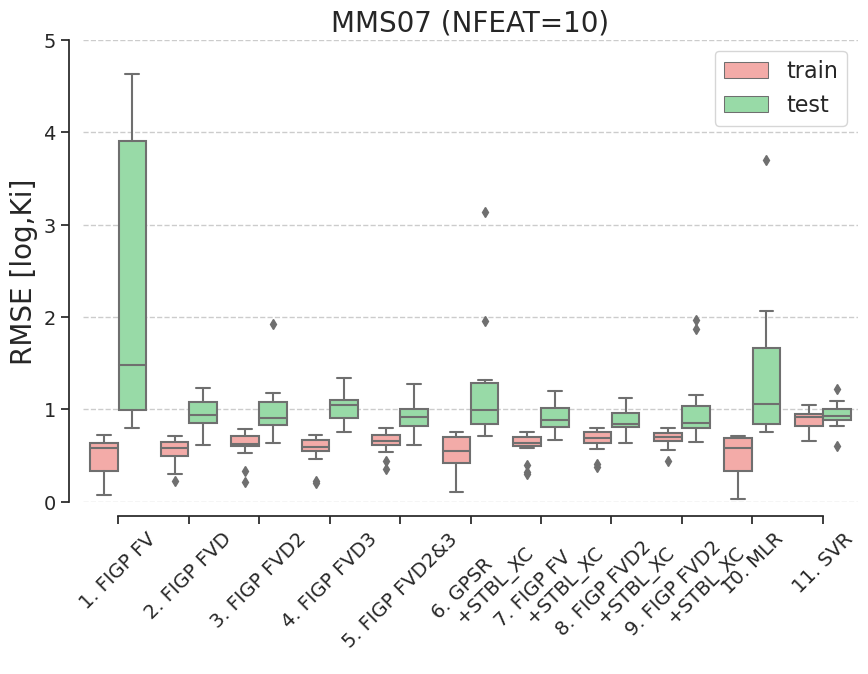

============================== MMS08 nfeats: 4 ==============================
759


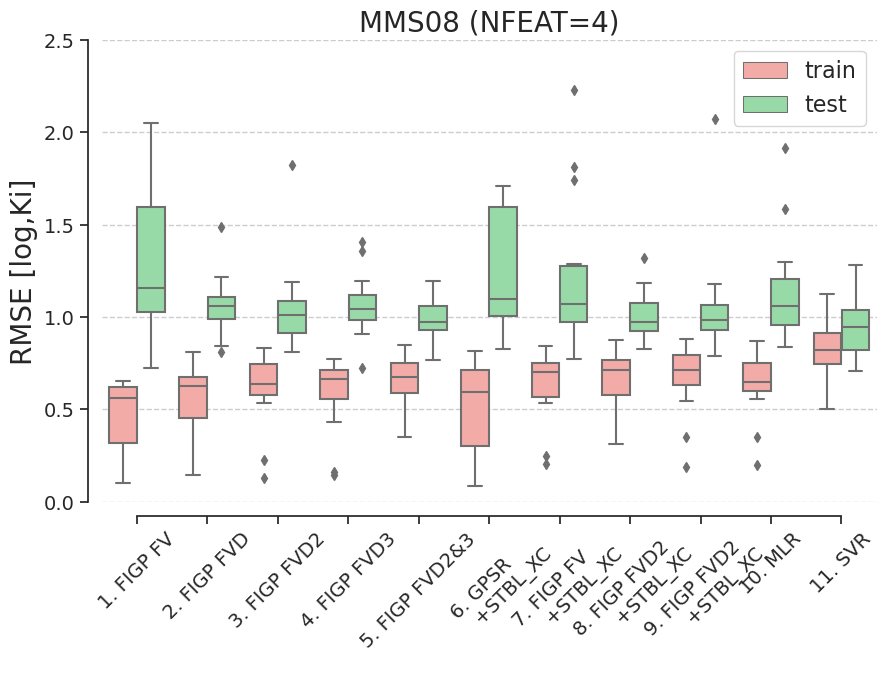

============================== MMS08 nfeats: 7 ==============================
754


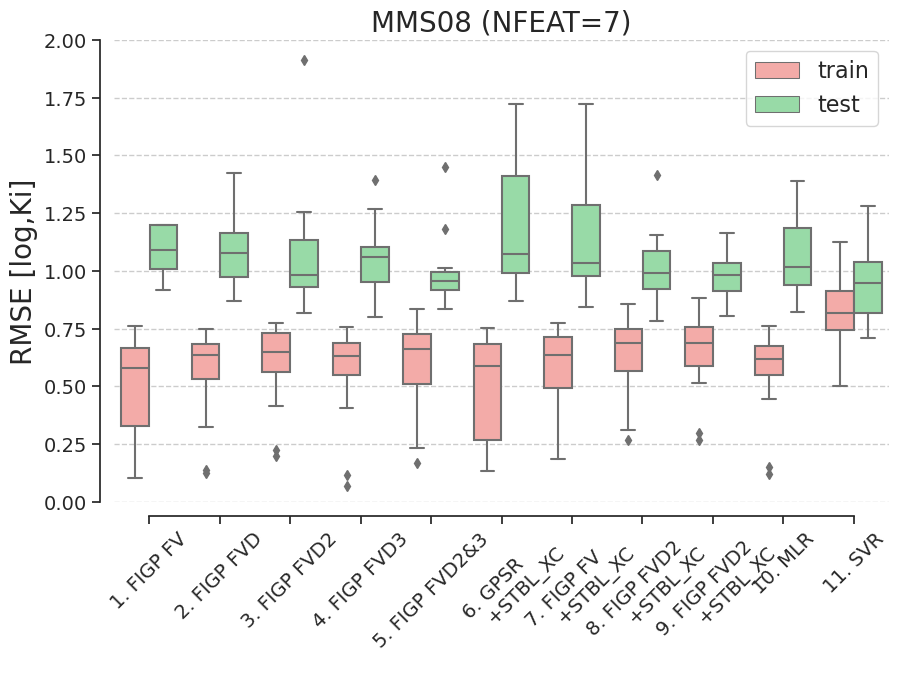

============================== MMS08 nfeats: 10 ==============================
756


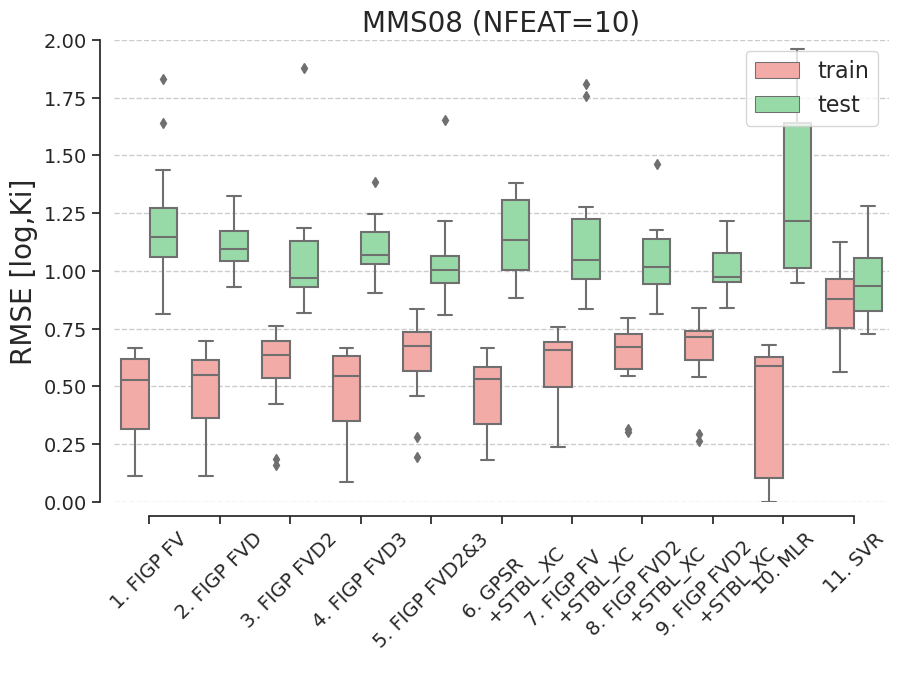

============================== MMS09 nfeats: 4 ==============================
765


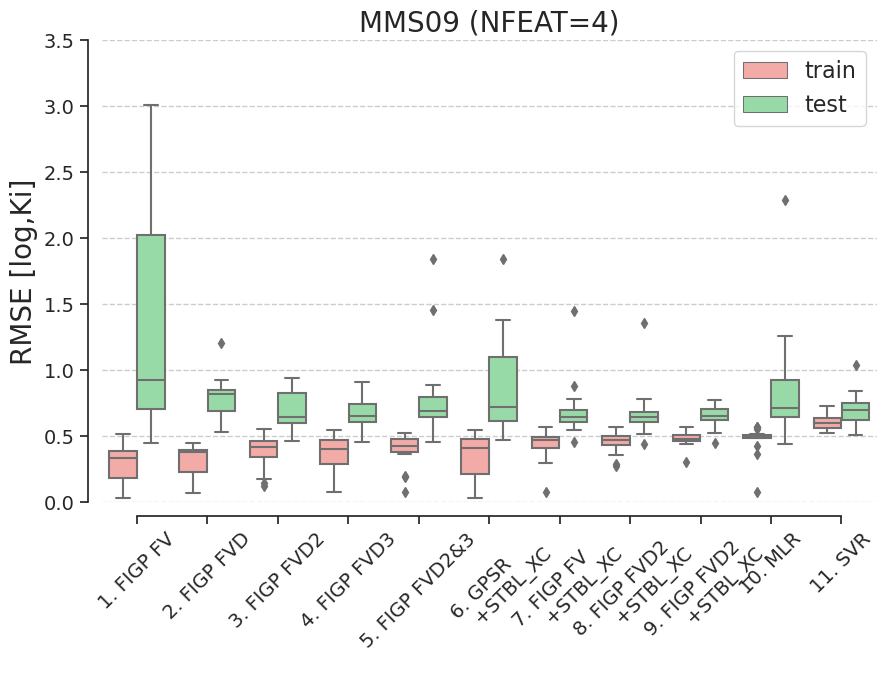

============================== MMS09 nfeats: 7 ==============================
764


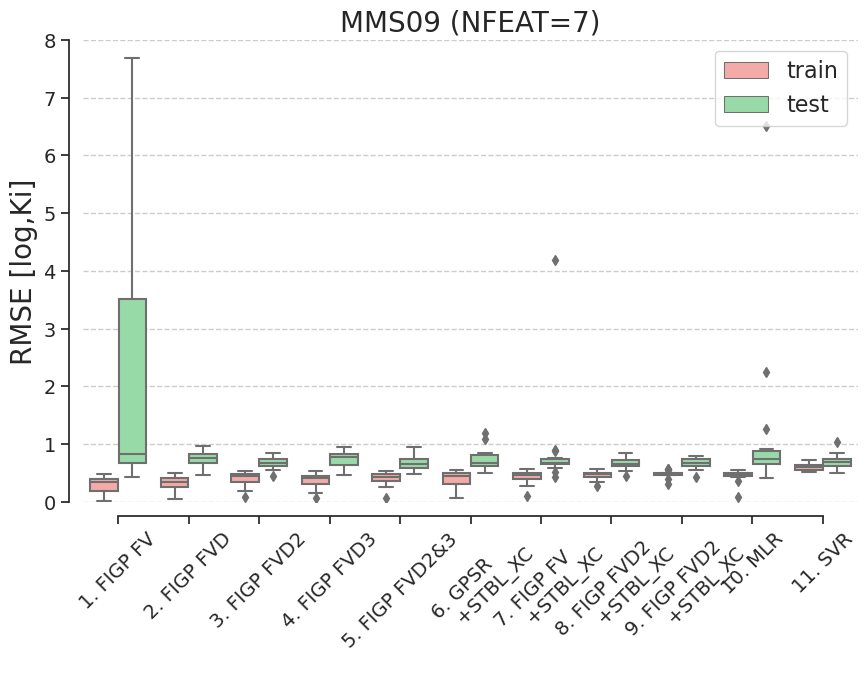

============================== MMS09 nfeats: 10 ==============================
764


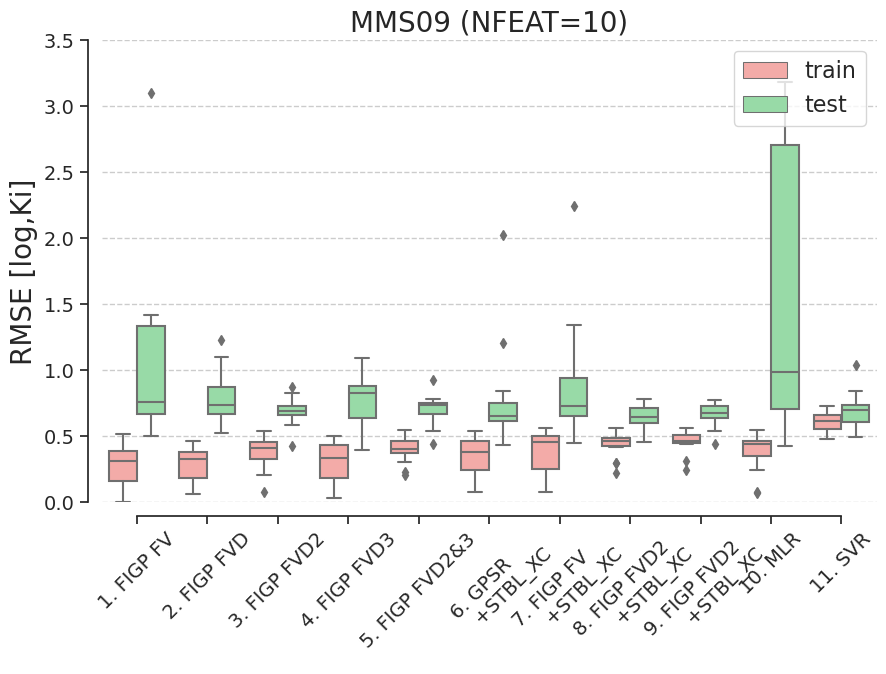

============================== MMS10 nfeats: 4 ==============================
741


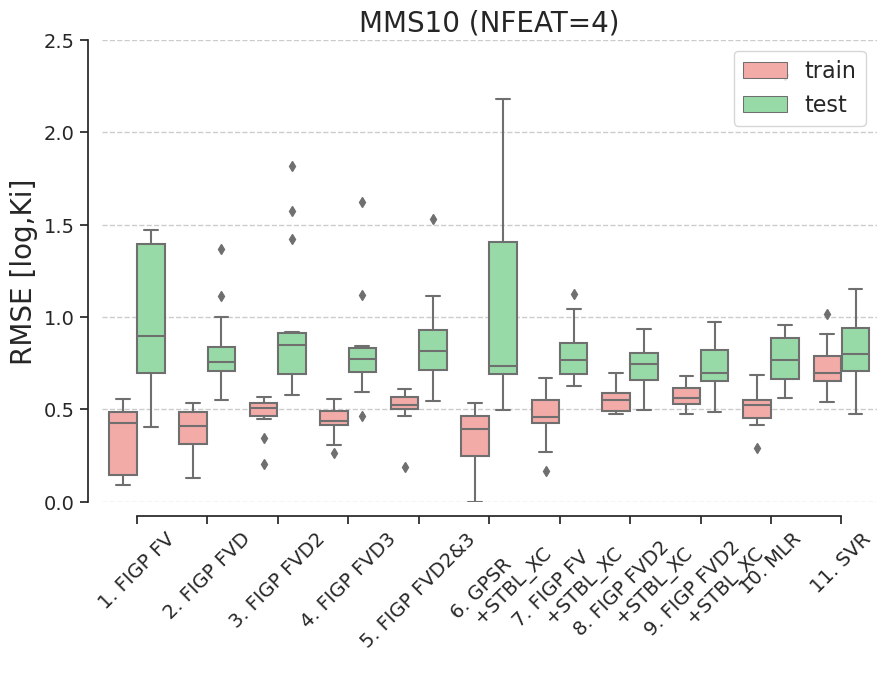

============================== MMS10 nfeats: 7 ==============================
756


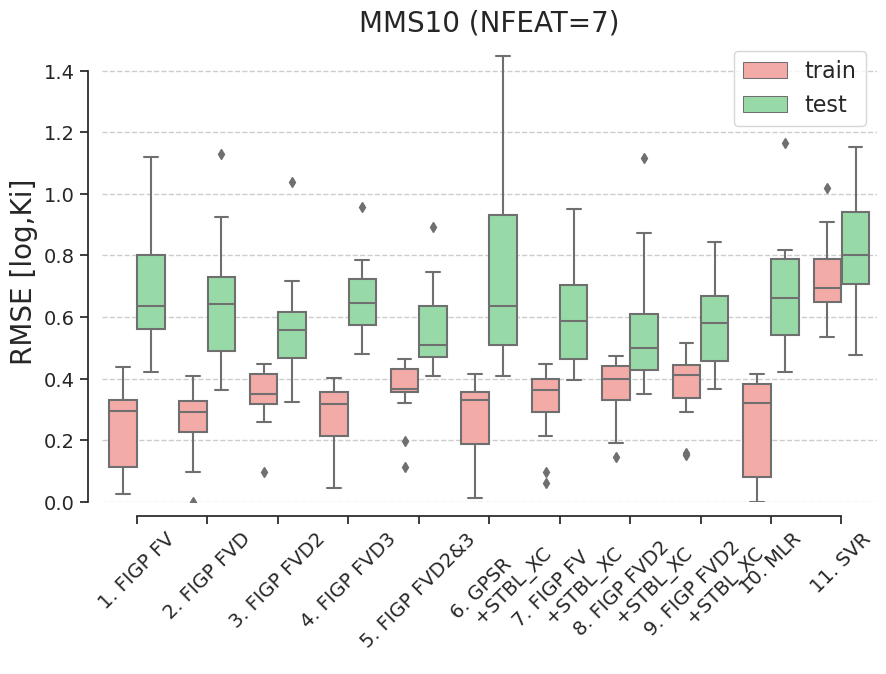

============================== MMS10 nfeats: 10 ==============================
748


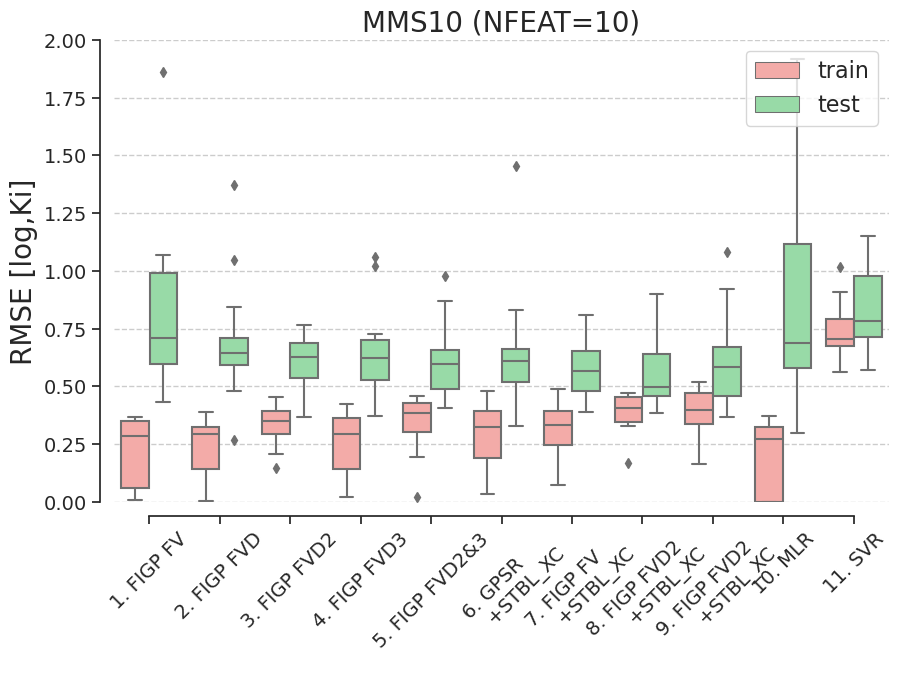

============================== MMS11 nfeats: 4 ==============================
762


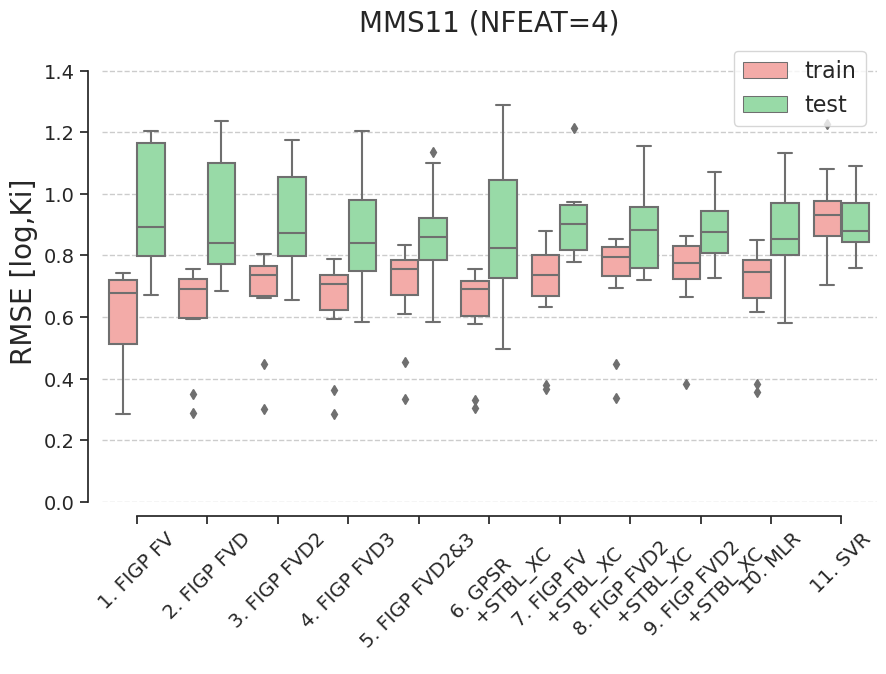

============================== MMS11 nfeats: 7 ==============================
763


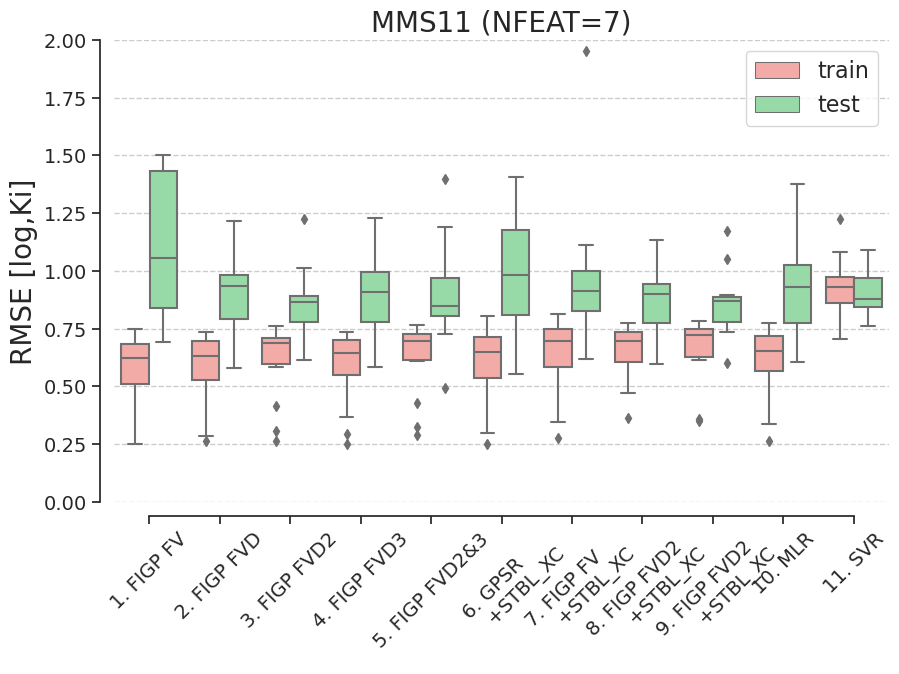

============================== MMS11 nfeats: 10 ==============================
765


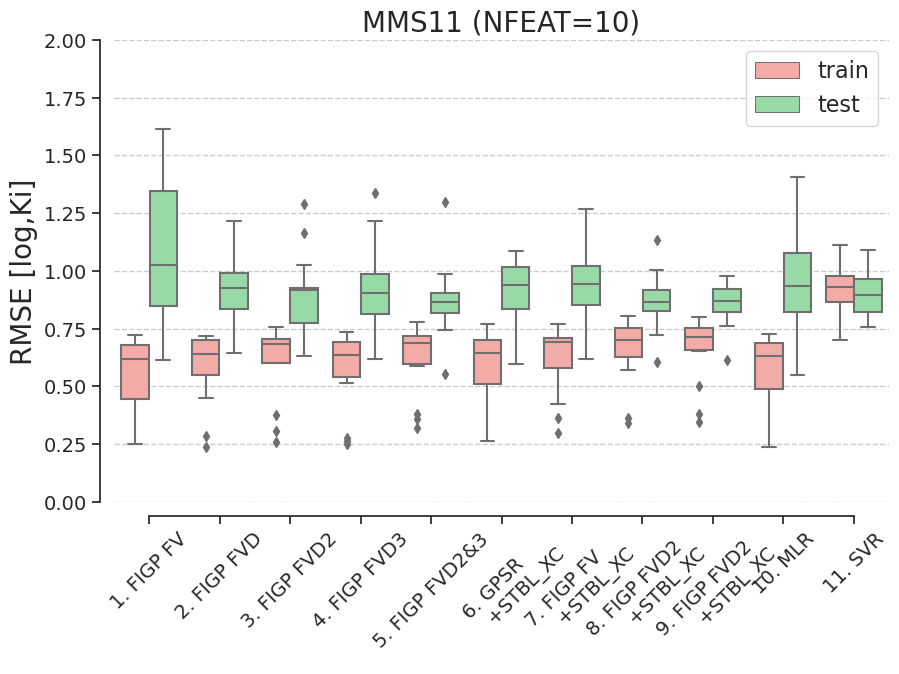

============================== MMS12 nfeats: 4 ==============================
761


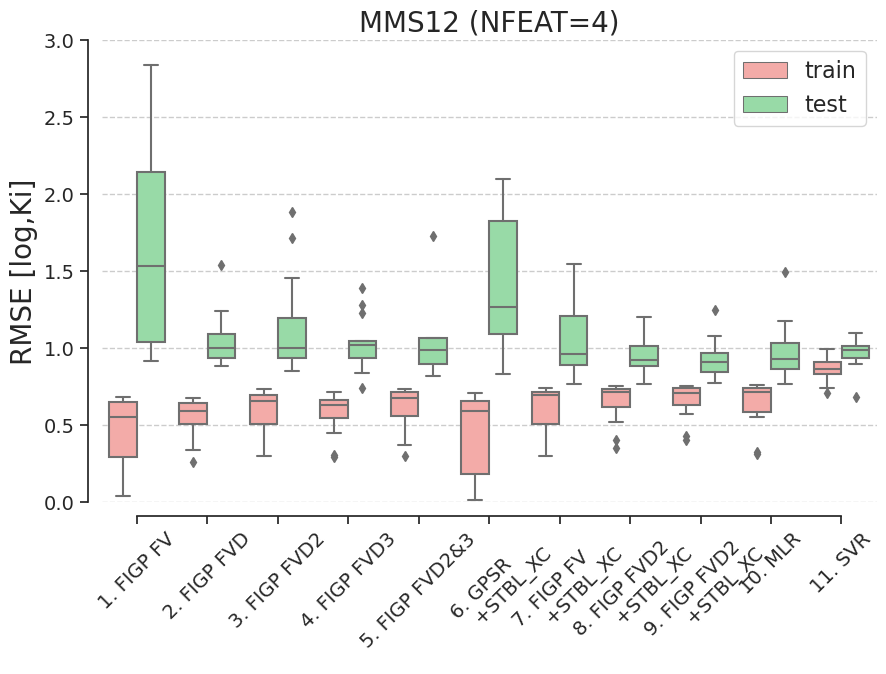

============================== MMS12 nfeats: 7 ==============================
758


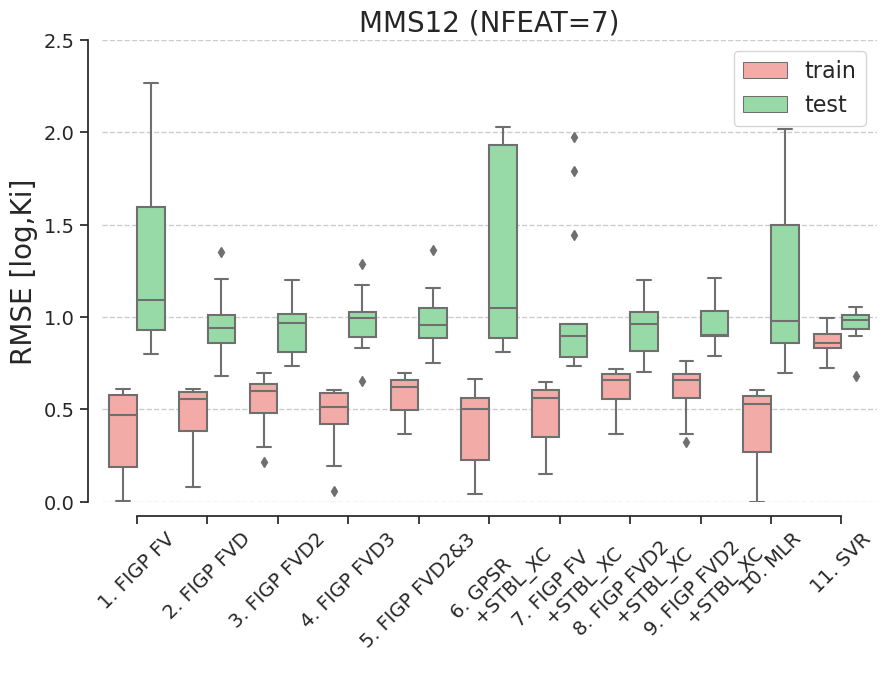

============================== MMS12 nfeats: 10 ==============================
758


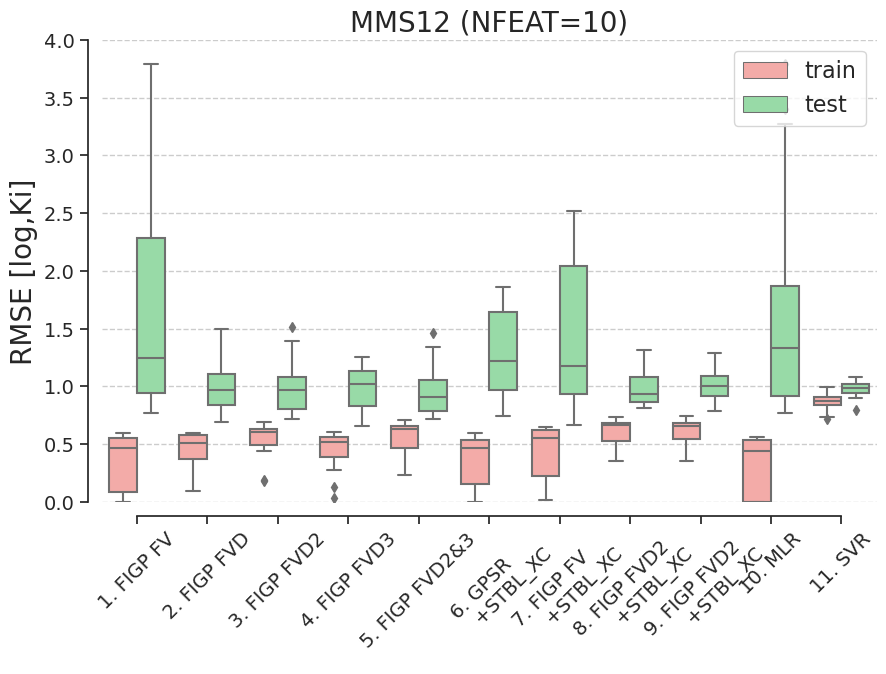

In [38]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

_ylim_rmse = { 4: {'MMS01': (0,3.5), 'MMS02': (0,1.5), 'MMS03': (0,3), 'MMS04': (0,2), 'MMS05': (0,2), 'MMS06': (0,3),
                  'MMS07': (0,2.5), 'MMS08': (0,2.5), 'MMS09': (0,3.5), 'MMS10': (0,2.5),  'MMS11': (0,1.5), 'MMS12': (0,3)},
               7: {'MMS01': (0,4), 'MMS02': (0,2), 'MMS03': (0,2), 'MMS04': (0,2.5), 'MMS05': (0,3), 'MMS06': (0,2),
                  'MMS07': (0,3.5), 'MMS08': (0,2), 'MMS09': (0,8), 'MMS10': (0,1.5),  'MMS11': (0,2), 'MMS12': (0,2.5)},
              10: {'MMS01': (0,20), 'MMS02': (0,7), 'MMS03': (0,4), 'MMS04': (0,1.5), 'MMS05': (0,3), 'MMS06': (0,2),
                  'MMS07': (0,5), 'MMS08': (0,2), 'MMS09': (0,3.5), 'MMS10': (0,2),  'MMS11': (0,2), 'MMS12': (0,4)},
             }

_methods = ['FV', 'FVD', 'FVD2', 'FVD3', 'FVD2&3',
            'FV +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)',
            'N +.5*X(d=.1) +.5*C(d=.1)', 
            'MLR',
            'SVR',
            # 'FV +1*X(d=.1)', 
            # 'FV +1*C(d=.1)', 
            # 'MEAN',
            # 'FV +1*X(d=.01)', 'FV +1*X(d=.02)', 'FV +1*C(d=.01)',
            # 'FV +1*C(d=.2)', 'FV +1*X(d=.5)',
            # 'FV +1*C(d=.5)', 'N', 'FV +1*C(d=.05)'
            ]

_m_rename = {
            #  'FV': '01. SR FLT=FV',
             'FV': '01. FIGP FV',
            #  'FVD': '02. SR FLT=FVD',
             'FVD': '02. FIGP FVD',
            #  'FVD2': '03. SR FLT=FVD2',
             'FVD2': '03. FIGP FVD2',
             'FVD3': '04. FIGP FVD3',
             'FVD2&3': '05. FIGP FVD2&3',
            #  'N +.5*X(d=.1) +.5*C(d=.1)': r'04. SR NOFLT+NOISE($\bf{X}$,$\bf{C}$)',
             'N +.5*X(d=.1) +.5*C(d=.1)': r'06. GPSR+STBL_XC',
            #  'FV +.5*X(d=.1) +.5*C(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$,$\bf{C}$)',
             'FV +.5*X(d=.1) +.5*C(d=.1)': r'07. FIGP FV+STBL_XC',
            #  'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'06. SR FLT=FVD2+NOISE($\bf{X}$,$\bf{C}$)',
             'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'08. FIGP FVD2+STBL_XC',
             'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)': r'09. FIGP FVD2+STBL_XC',
             'MLR': '10. MLR',
             'SVR': '11. SVR',
            #  'MEAN': '09. MEAN',
            #  'FV +1*X(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$)',
            #  'FV +1*C(d=.1)': r'06. SR FLT=FV+NOISE($\bf{C}$)',
             }

_selected_data = {

}

# for _mms, _nfeats in _seleced_data.items():

# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:
for _mms in ['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']:
# for _mms in ['MMS03', 'MMS05']:
    for _n_feats in [4, 7, 10]:
    # for _n_feats in [4]:
        print(f"============================== {_mms} nfeats: {_n_feats} ==============================")
        _df = df[df["MMS"] == _mms]
        # print(set(_df["METHOD"]))
        # break
        _df = _df[_df["N FEATURES"] == _n_feats]
        print(len(_df))

        """pick up only _methods"""
        _df = _df[_df["METHOD"].isin(_methods)]

        """rename methods"""
        _df.loc[:, "METHOD"] = [_m_rename[_method] for _method in _df["METHOD"]]

        # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
        _df = _df.sort_values(by=["METHOD"])
        _df.loc[:, "METHOD"] = [re.sub("^0", "", _method.replace("+", "\n        +")).replace("7. MLR", "      7. MLR      ").replace("8. SVR", "      8. SVR      ") for _method in _df["METHOD"]]

        # _df.loc[:, "METHOD"] = [_df.loc[_idx, "METHOD"] + f" f_{_df.loc[_idx, 'N FEATURES']:02}" for _idx in _df.index]
        
        # _df.sort_values(by=["METHOD"], inplace=True)

        _PLOT_RMSE = True
        if _PLOT_RMSE:

            # sns.set(style="whitegrid")
            plt.figure(figsize=(10, 6))
            plt.ylim(_ylim_rmse[_n_feats][_mms])
            sns.set(style="ticks", palette="pastel")

            # Draw a nested boxplot 
            # seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, 
            #                 saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
            _bplot = sns.boxplot(x="METHOD", y="RMSE",
                                 palette=["r", "g", "b"],
                                 hue="DATASET",
                                 # hue="N FEATURES",
                                 dodge=True,
                                 data=_df)
            # print(_bplot["whiskers"])
            sns.despine(offset=10, trim=True)
            plt.grid(axis="y", linestyle="--")
            plt.legend(loc="upper right", fontsize=16)
            plt.xticks(rotation=45, fontsize=14)
            plt.yticks(fontsize=14)
            plt.ylabel("RMSE [log,Ki]", fontsize=20)
            plt.xlabel("")
            plt.title(_mms+f" (NFEAT={_n_feats})", fontsize=20)
            plt.savefig(f"boxplot_cpt_{_mms}_f{_n_feats}_rmse.png", dpi=300, bbox_inches="tight")
            plt.show()


boxplot comparison (acum all NFEATs)

============================== MMS01 ==============================
2260


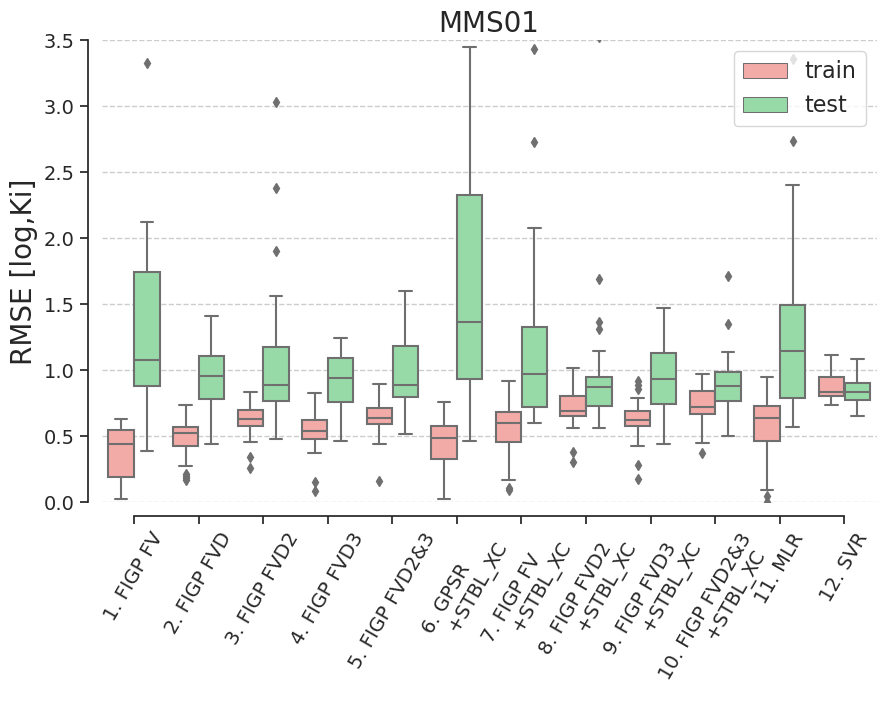

============================== MMS02 ==============================
2241


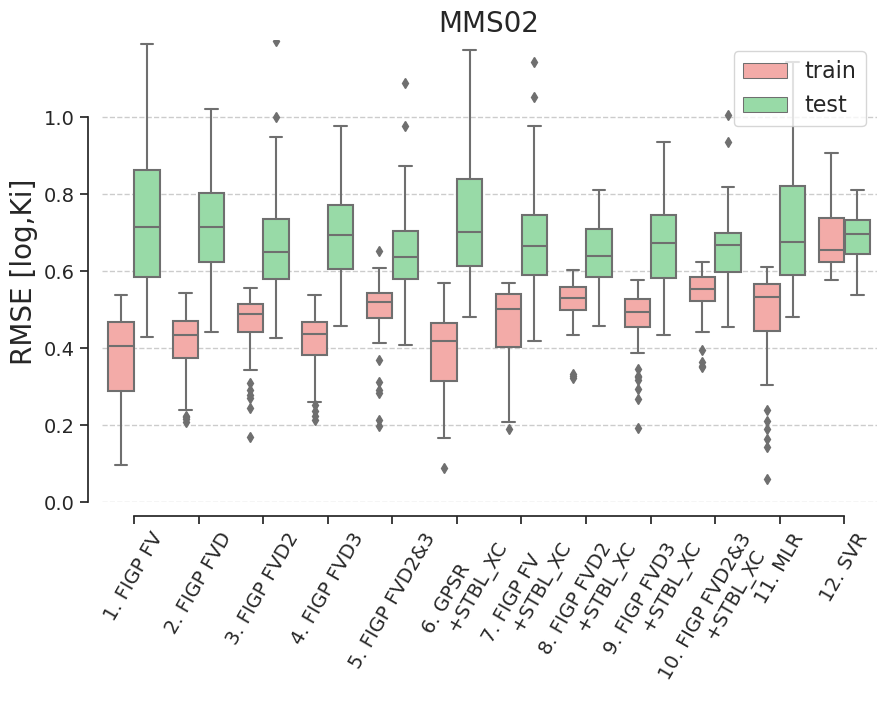

============================== MMS03 ==============================
2209


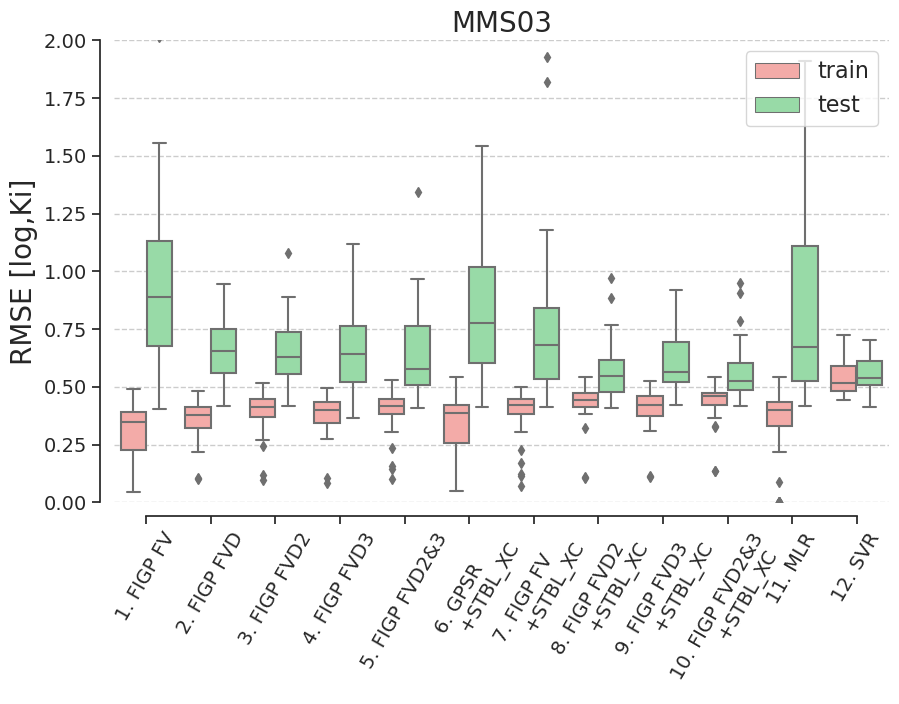

============================== MMS04 ==============================
2279


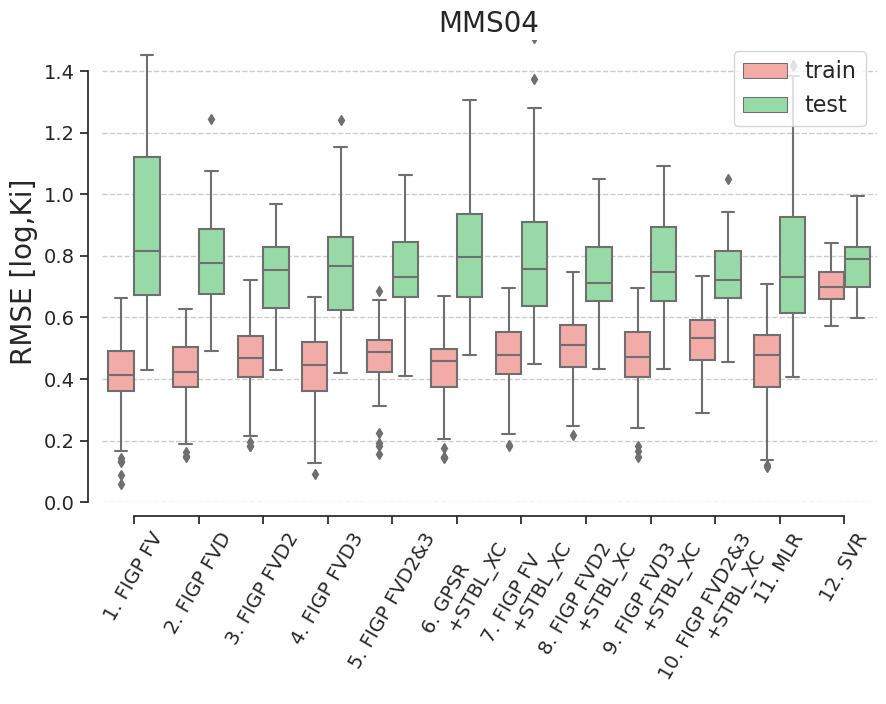

============================== MMS05 ==============================
2227


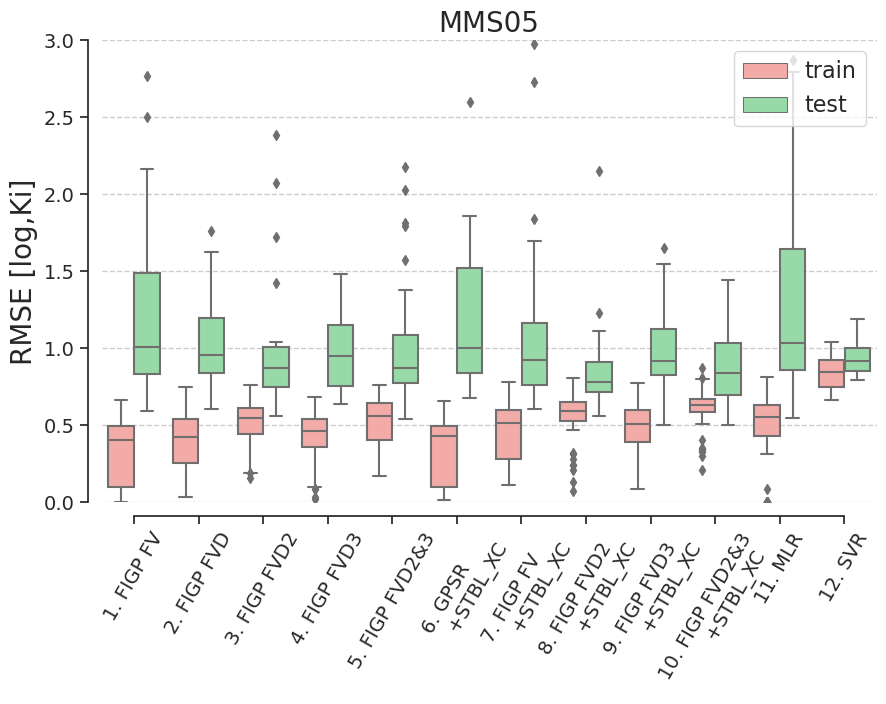

============================== MMS06 ==============================
2199


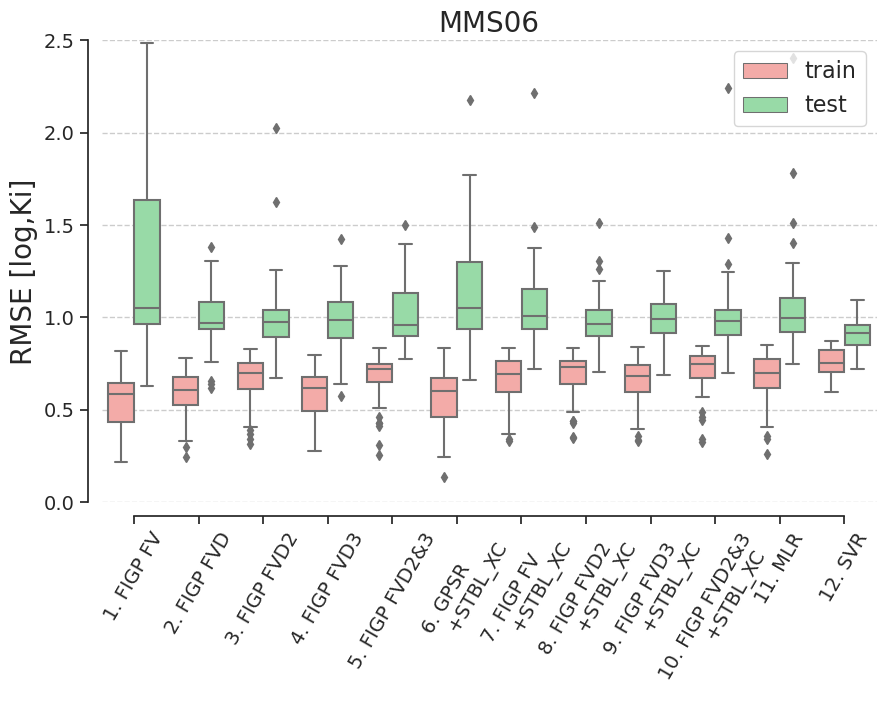

============================== MMS07 ==============================
2237


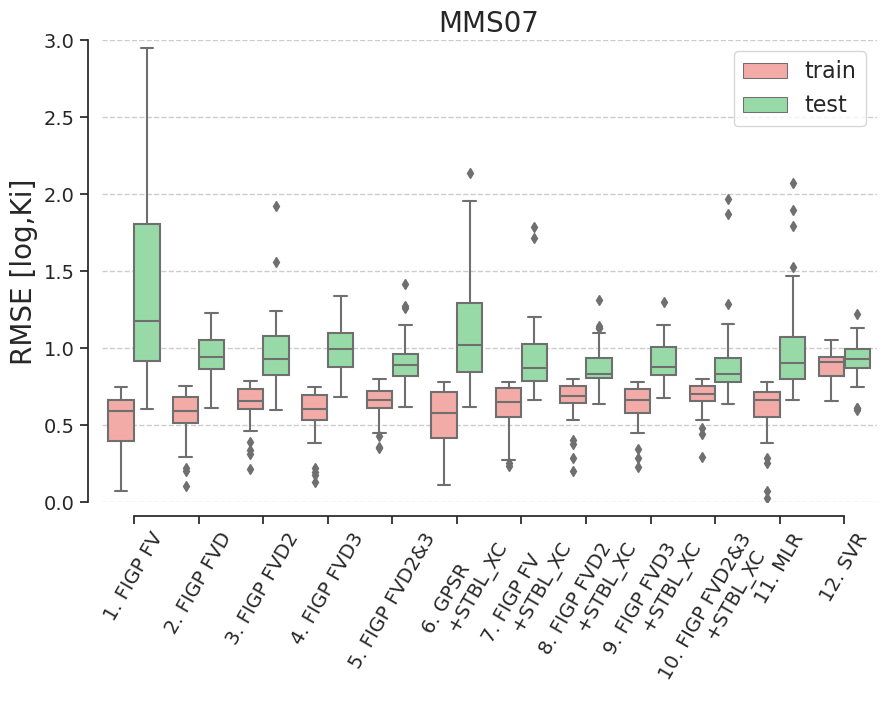

============================== MMS08 ==============================
2269


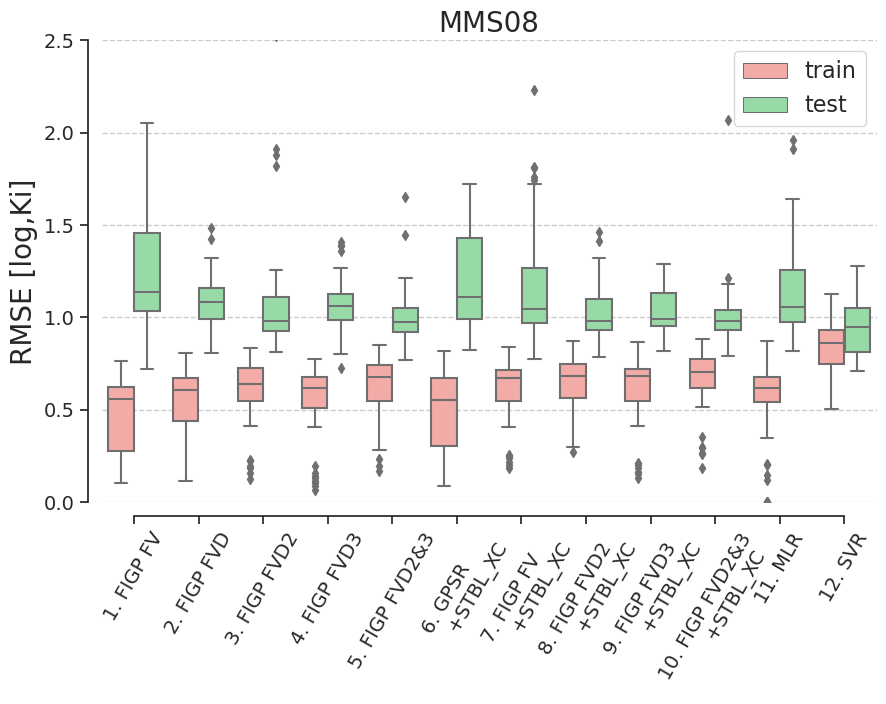

============================== MMS09 ==============================
2293


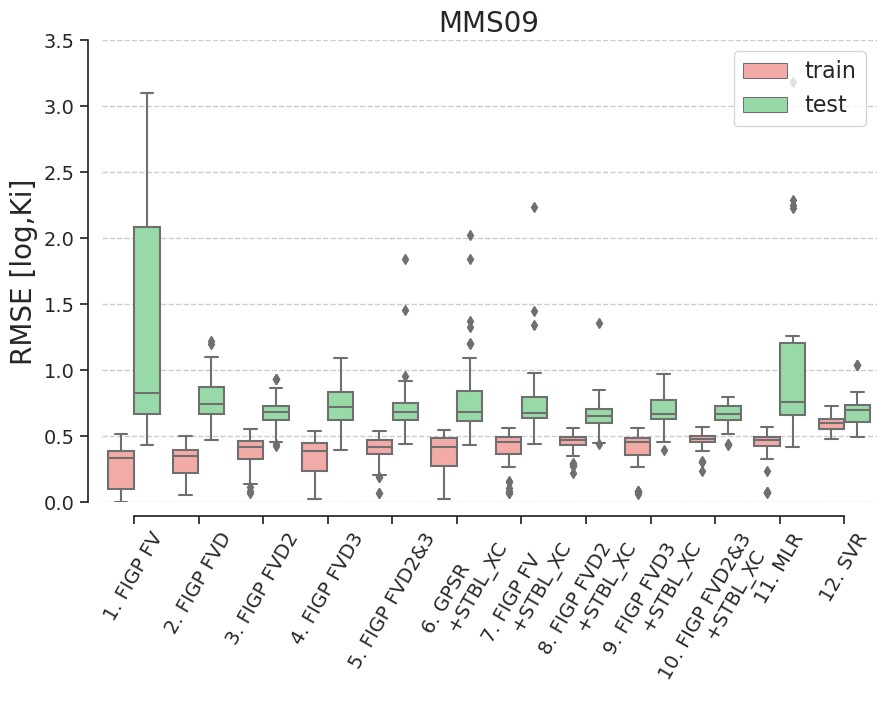

============================== MMS10 ==============================
2245


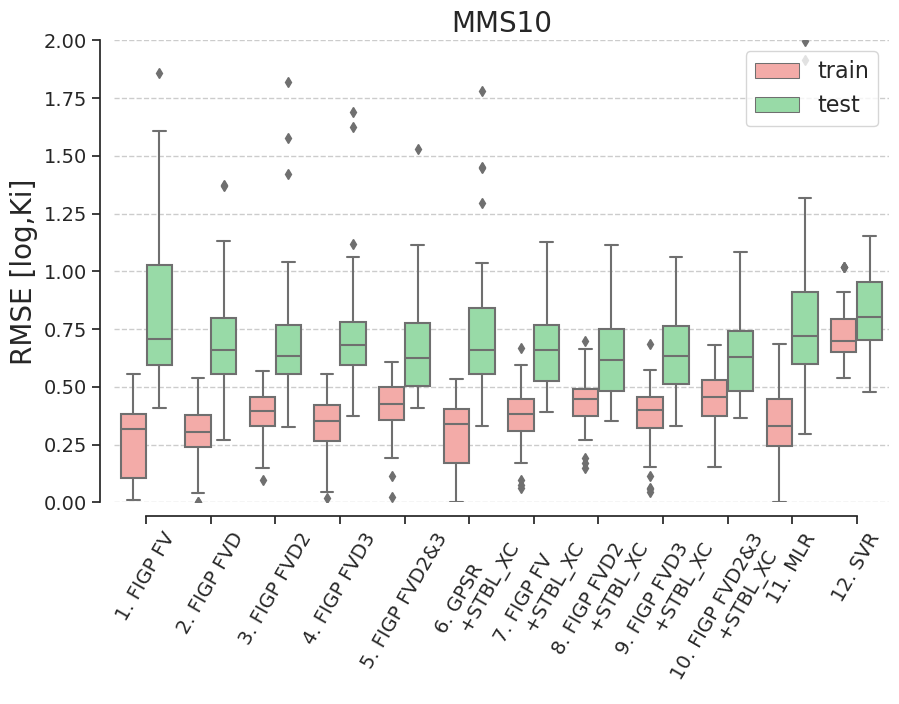

============================== MMS11 ==============================
2290


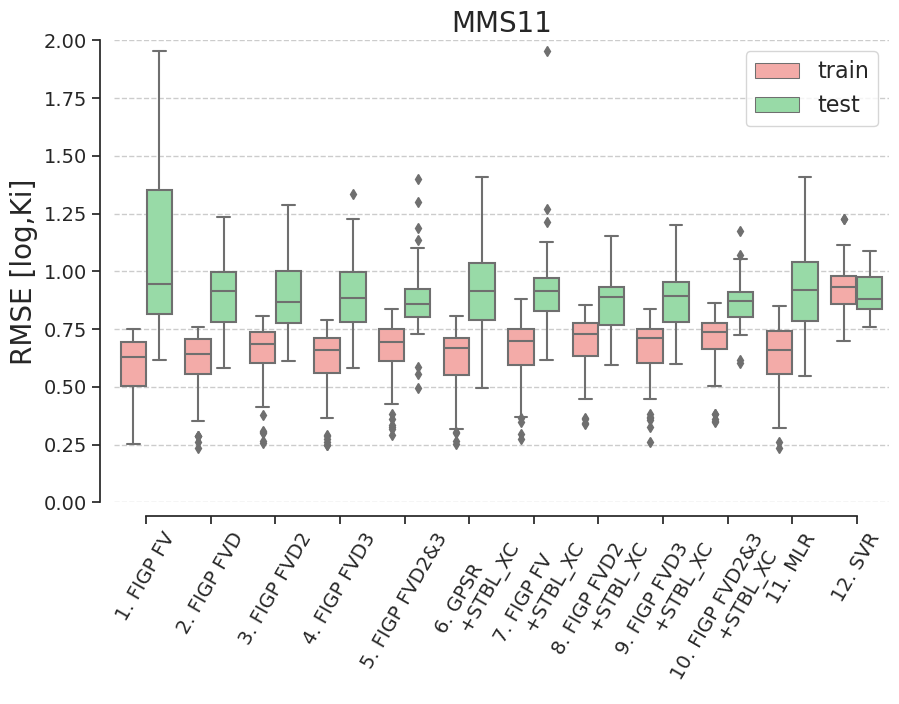

============================== MMS12 ==============================
2277


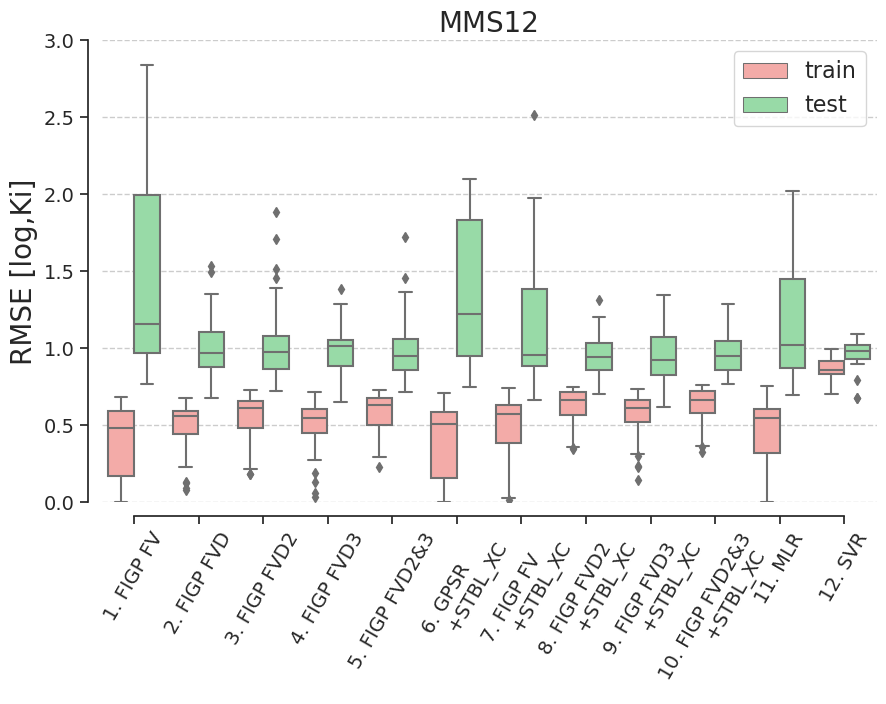

In [39]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

_ylim_rmse = {'MMS01': (0,3.5), 'MMS02': (0,1.2), 'MMS03': (0,2), 'MMS04': (0,1.5), 'MMS05': (0,3), 'MMS06': (0,2.5),
              'MMS07': (0,3), 'MMS08': (0,2.5), 'MMS09': (0,3.5), 'MMS10': (0,2),  'MMS11': (0,2), 'MMS12': (0,3)}

_methods = ['FV', 'FVD', 'FVD2', 'FVD3', 'FVD2&3',
            'FV +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)',
            'FVD3 +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)',
            'N +.5*X(d=.1) +.5*C(d=.1)', 
            'MLR',
            'SVR',
            # 'FV +1*X(d=.1)', 
            # 'FV +1*C(d=.1)', 
            # 'MEAN',
            # 'FV +1*X(d=.01)', 'FV +1*X(d=.02)', 'FV +1*C(d=.01)',
            # 'FV +1*C(d=.2)', 'FV +1*X(d=.5)',
            # 'FV +1*C(d=.5)', 'N', 'FV +1*C(d=.05)'
            ]

_m_rename = {
             'FV': '01. FIGP FV',
             'FVD': '02. FIGP FVD',
             'FVD2': '03. FIGP FVD2',
             'FVD3': '04. FIGP FVD3',
             'FVD2&3': '05. FIGP FVD2&3',
            #  'N +.5*X(d=.1) +.5*C(d=.1)': r'04. SR NOFLT+NOISE($\bf{X}$,$\bf{C}$)',
             'N +.5*X(d=.1) +.5*C(d=.1)': '06. GPSR+STBL_XC',
            #  'FV +.5*X(d=.1) +.5*C(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$,$\bf{C}$)',
             'FV +.5*X(d=.1) +.5*C(d=.1)': '07. FIGP FV+STBL_XC',
            #  'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'06. SR FLT=FVD2+NOISE($\bf{X}$,$\bf{C}$)',
             'FVD2 +.5*X(d=.1) +.5*C(d=.1)': '08. FIGP FVD2+STBL_XC',
             'FVD3 +.5*X(d=.1) +.5*C(d=.1)': '09. FIGP FVD3+STBL_XC',
             'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)': '10. FIGP FVD2&3+STBL_XC',
             'MLR': '11. MLR',
             'SVR': '12. SVR',
            #  'MEAN': '09. MEAN',
            #  'FV +1*X(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$)',
            #  'FV +1*C(d=.1)': r'06. SR FLT=FV+NOISE($\bf{C}$)',
             }

_selected_data = {

}

# for _mms, _nfeats in _seleced_data.items():

# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:
for _mms in ['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']:
# for _mms in ['MMS03', 'MMS05']:
    print(f"============================== {_mms} ==============================")
    _df = df[df["MMS"] == _mms]
    # print(set(_df["METHOD"]))
    # break
    # _df = _df[_df["N FEATURES"] == _n_feats]
    print(len(_df))

    """pick up only _methods"""
    _df = _df[_df["METHOD"].isin(_methods)]

    """rename methods"""
    _df.loc[:, "METHOD"] = [_m_rename[_method] for _method in _df["METHOD"]]

    # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
    _df = _df.sort_values(by=["METHOD"])
    _df.loc[:, "METHOD"] = [re.sub("^0", "", _method.replace("+", "\n        +")).replace("7. MLR", "      7. MLR      ").replace("8. SVR", "      8. SVR      ") for _method in _df["METHOD"]]

    # _df.loc[:, "METHOD"] = [_df.loc[_idx, "METHOD"] + f" f_{_df.loc[_idx, 'N FEATURES']:02}" for _idx in _df.index]
    
    # _df.sort_values(by=["METHOD"], inplace=True)

    _PLOT_RMSE = True
    if _PLOT_RMSE:

        # sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        plt.ylim(_ylim_rmse[_mms])
        sns.set(style="ticks", palette="pastel")

        # Draw a nested boxplot 
        # seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, 
        #                 saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
        _bplot = sns.boxplot(x="METHOD", y="RMSE",
                                palette=["r", "g", "b"],
                                hue="DATASET",
                                # hue="N FEATURES",
                                dodge=True,
                                data=_df)
        # print(_bplot["whiskers"])
        sns.despine(offset=10, trim=True)
        plt.grid(axis="y", linestyle="--")
        plt.legend(loc="upper right", fontsize=16)
        plt.xticks(rotation=60, fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylabel("RMSE [log,Ki]", fontsize=20)
        plt.xlabel("")
        plt.title(_mms, fontsize=20)
        plt.savefig(f"boxplot_cpt_{_mms}_rmse.png", dpi=300, bbox_inches="tight")
        plt.show()


comparison NFEAT (absolute value)

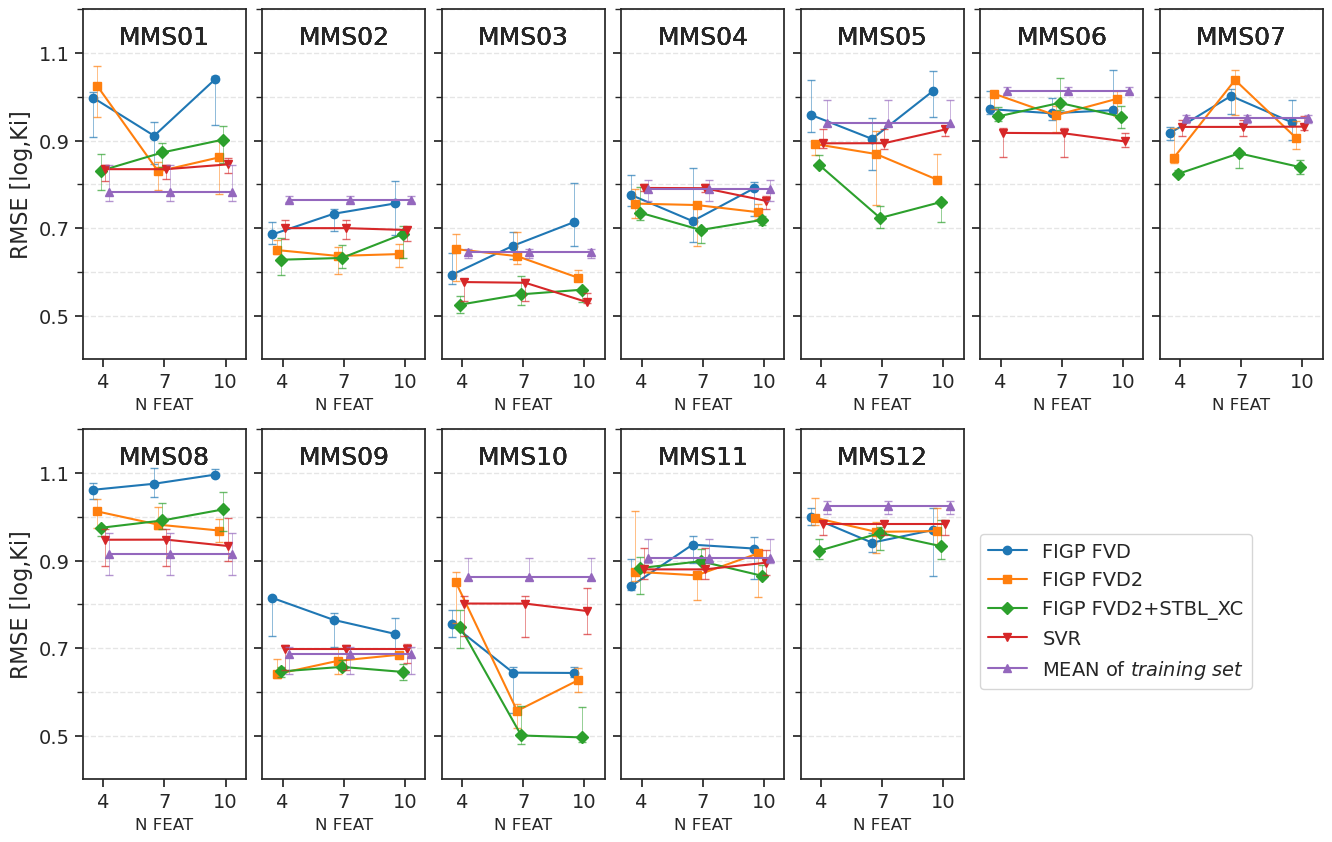

In [40]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import re

_methods = [
            # 'FV',
            'FVD',
            'FVD2',
            # 'FV +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)',
            # 'N +.5*X(d=.1) +.5*C(d=.1)', 
            # 'MLR',
            'SVR',
            # 'FV +1*X(d=.1)', 
            # 'FV +1*C(d=.1)', 
            'MEAN',
            # 'FV +1*X(d=.01)', 'FV +1*X(d=.02)', 'FV +1*C(d=.01)',
            # 'FV +1*C(d=.2)', 'FV +1*X(d=.5)',
            # 'FV +1*C(d=.5)', 'N', 'FV +1*C(d=.05)'
            ]

_m_rename = {
            #  'FV': 'SR FLT=FV',
             'FV': 'FIGP FV',
            #  'FVD': 'SR FLT=FVD',
             'FVD': 'FIGP FVD',
            #  'FVD2': 'SR FLT=FVD2',
             'FVD2': 'FIGP FVD2',
            #  'N +.5*X(d=.1) +.5*C(d=.1)': r'SR NOFLT+NOISE($\bf{X}$,$\bf{C}$)',
             'N +.5*X(d=.1) +.5*C(d=.1)': r'GPSR+STBL_XC',
            #  'FV +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FV+NOISE($\bf{X}$,$\bf{C}$)',
             'FV +.5*X(d=.1) +.5*C(d=.1)': r'FIGP FV+STBL_XC',
            #  'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FVD2+NOISE($\bf{X}$,$\bf{C}$)',
             'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'FIGP FVD2+STBL_XC',
            #  'MLR': 'MLR',
             'SVR': 'SVR',
             'MEAN': r'MEAN of $\it{training}$ $\it{set}$',
            #  'FV +1*X(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$)',
            #  'FV +1*C(d=.1)': r'06. SR FLT=FV+NOISE($\bf{C}$)',
             }

_selected_data = {

}

# for _mms, _nfeats in _seleced_data.items():
markers = ["o", "s", "D", "v", "^", ">", "<", "p", "P", "*", "X", "d"]
cmap = plt.get_cmap("tab10")
# cmap = plt.get_cmap("tab10")
# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:

fig, axes = plt.subplots(2, 7, figsize=(16, 10))
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

for _jdx, _mms in enumerate(['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']):
# for _mms in ['MMS03', 'MMS05']:

    ax = axes[int(_jdx/7), _jdx%7]

    for idx, _method in enumerate(_methods):

        _df = df[df["MMS"] == _mms]
        _df = _df[_df["DATASET"] == "test"]
        _df = _df[_df["METHOD"] == _method]

        """rename methods"""
        _df.loc[:, "METHOD"] = [_m_rename[_method] for _method in _df["METHOD"]]
        _method_name = _m_rename[_method]
        # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
        # _df.loc[:, "METHOD"] = [re.sub("^0", "", _method.replace("+", "\n        +")).replace("7. MLR", "      7. MLR      ").replace("8. SVR", "      8. SVR      ") for _method in _df["METHOD"]]

        _df_q = pd.DataFrame(index=[4, 7, 10], columns=["mean", "median", "25%", "40%", "50%", "60%", "75%", "std"])
        for _n_feats in [4, 7, 10]:
            _df_q.loc[_n_feats, :] = [_df[_df["N FEATURES"] == _n_feats]["RMSE"].mean(),
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].median(),
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.25),
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.4),
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.5),
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.6),
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.75),
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].std()]


        """plot median and errorbars from 25% to 75%, linetype is dashed for median"""
        # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "mean"], color=cmap(idx), marker="o", linestyle="solid", label=_method_name)
        # ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name, alpha=0.7)
        # # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "median"], color=cmap(idx), marker="_", linestyle="dashed", label="", linewidth=0.5)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none', 
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        """plot median and errobar with upper side only"""
        ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none',
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "40%"], _df_q.loc[:, "60%"] - _df_q.loc[:, "median"]], fmt='none',
                    ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)


        ax.set_yticks([0.5, 0.7, 0.9, 1.1], fontsize=14)

        """put legend outside of the plot"""
        if _jdx == 11:
            ax.legend(bbox_to_anchor=(1.1, 0.7), loc='upper left', borderaxespad=0, fontsize=14)
        
        if _jdx%7 != 0:
            ax.set_yticklabels([])
        else:
            ax.set_yticklabels(["0.5", "0.7", "0.9", "1.1"], fontsize=14)
            ax.set_ylabel("RMSE [log,Ki]", fontsize=16)

        ax.set_xticks([4, 7, 10])
        ax.set_xticklabels(["4", "7", "10"], fontsize=14)

        """set minor ticks for y axis"""
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

        # ax.set_xlabel("N FEAT", fontsize=14)
        ax.set_xlabel("N FEAT")
        ax.set_xlim(3, 11)
        ax.set_ylim(0.4, 1.2)
        ax.grid(axis="y", linestyle="dashed", alpha=0.5)
        ax.grid(axis="y", linestyle="dashed", alpha=0.5, which="minor")

        """set title inside the plot"""
        ax.text(.5, .90, _mms, fontsize=18,
                horizontalalignment='center',
                transform=ax.transAxes)



plt.subplots_adjust(wspace=0.1)
plt.savefig("plot_rmse_nfeat.png", dpi=300, bbox_inches="tight")
plt.show()



comparison NFEAT (relative value, all)

/tmp/ipykernel_9333/675575671.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_9333/675575671.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_9333/675575671.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_9333/675575671.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_9333/675575671.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_9333/675575671.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),

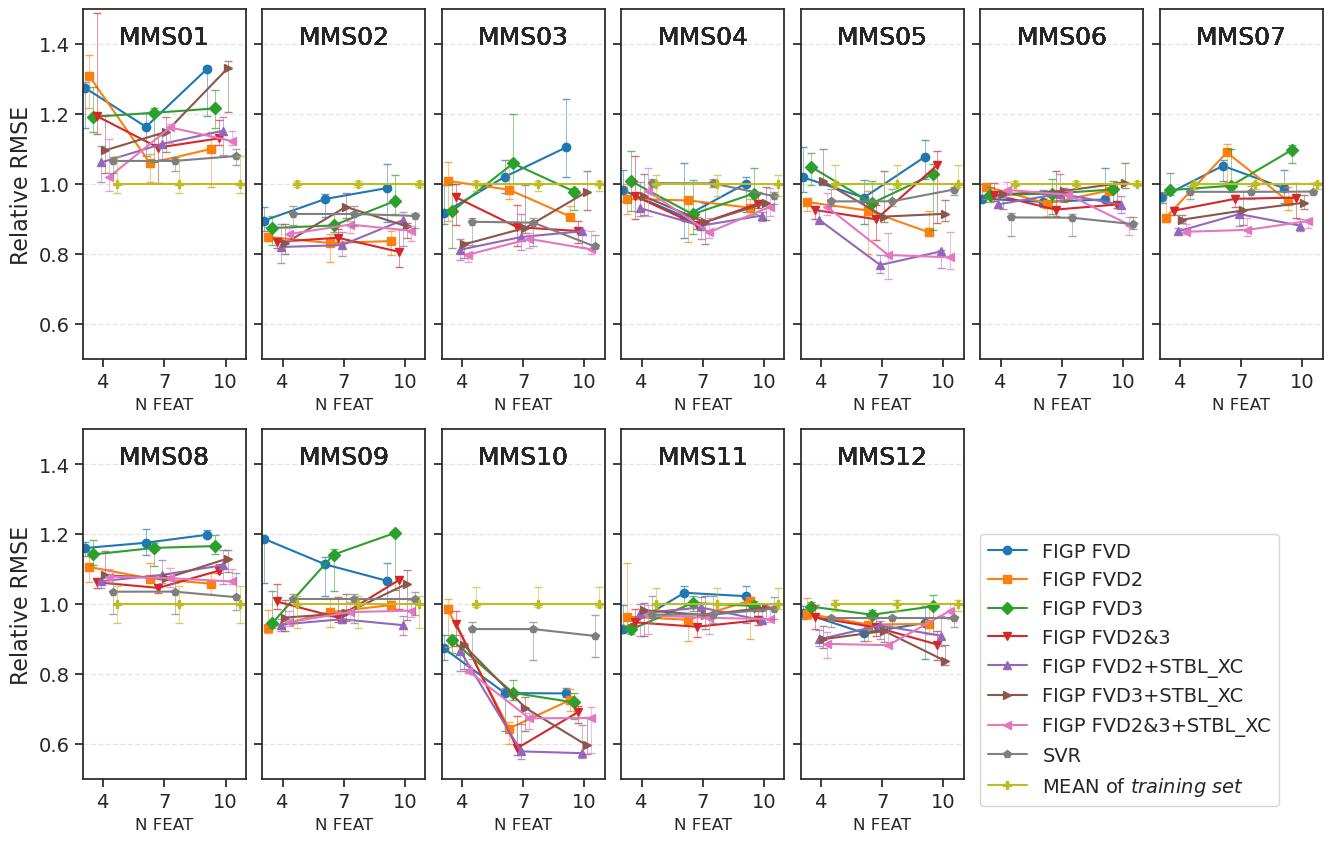

In [41]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import re

_methods = [
            # 'FV',
            'FVD',
            'FVD2',
            'FVD3',
            'FVD2&3',
            # 'FV +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)',
            'FVD3 +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)',
            # 'N +.5*X(d=.1) +.5*C(d=.1)', 
            # 'MLR',
            'SVR',
            # 'FV +1*X(d=.1)', 
            # 'FV +1*C(d=.1)', 
            'MEAN',
            # 'FV +1*X(d=.01)', 'FV +1*X(d=.02)', 'FV +1*C(d=.01)',
            # 'FV +1*C(d=.2)', 'FV +1*X(d=.5)',
            # 'FV +1*C(d=.5)', 'N', 'FV +1*C(d=.05)'
            ]

_m_rename = {
            #  'FV': 'SR FLT=FV',
             'FV': 'FIGP FV',
            #  'FVD': 'SR FLT=FVD',
             'FVD': 'FIGP FVD',
            #  'FVD2': 'SR FLT=FVD2',
             'FVD2': 'FIGP FVD2',
             'FVD3': 'FIGP FVD3',
             'FVD2&3': 'FIGP FVD2&3',
            #  'N +.5*X(d=.1) +.5*C(d=.1)': r'SR NOFLT+NOISE($\bf{X}$,$\bf{C}$)',
             'N +.5*X(d=.1) +.5*C(d=.1)': 'GPSR+STBL_XC',
            #  'FV +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FV+NOISE($\bf{X}$,$\bf{C}$)',
             'FV +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FV+STBL_XC',
            #  'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FVD2+NOISE($\bf{X}$,$\bf{C}$)',
             'FVD2 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD2+STBL_XC',
             'FVD3 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD3+STBL_XC',
             'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD2&3+STBL_XC',
            #  'MLR': 'MLR',
             'SVR': 'SVR',
             'MEAN': r'MEAN of $\it{training}$ $\it{set}$',
            #  'FV +1*X(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$)',
            #  'FV +1*C(d=.1)': r'06. SR FLT=FV+NOISE($\bf{C}$)',
             }

_selected_data = {

}

# for _mms, _nfeats in _seleced_data.items():
markers = ["o", "s", "D", "v", "^", ">", "<", "p", "P", "*", "X", "d"]
cmap = plt.get_cmap("tab10")
# cmap = plt.get_cmap("tab10")
# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:

fig, axes = plt.subplots(2, 7, figsize=(16, 10))
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

for _jdx, _mms in enumerate(['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']):
# for _mms in ['MMS03', 'MMS05']:

    ax = axes[int(_jdx/7), _jdx%7]

    for idx, _method in enumerate(_methods):

        _df = df[df["MMS"] == _mms]
        _df = _df[_df["DATASET"] == "test"]
        _df_mean = _df[_df["METHOD"] == "MEAN"]
        _df = _df[_df["METHOD"] == _method]

        """rename methods"""
        _df.loc[:, "METHOD"] = [_m_rename[_method] for _method in _df["METHOD"]]
        _method_name = _m_rename[_method]
        # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
        # _df.loc[:, "METHOD"] = [re.sub("^0", "", _method.replace("+", "\n        +")).replace("7. MLR", "      7. MLR      ").replace("8. SVR", "      8. SVR      ") for _method in _df["METHOD"]]

        _df_q = pd.DataFrame(index=[4, 7, 10], columns=["mean", "median", "25%", "40%", "50%", "60%", "75%", "std"])
        for _n_feats in [4, 7, 10]:
            _se_mean_q = _df_mean[_df_mean["N FEATURES"] == _n_feats]["RMSE"].median()
            # print(_se_mean_q)

            _df_q.loc[_n_feats, :] = [_df[_df["N FEATURES"] == _n_feats]["RMSE"].mean()/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].median()/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.25)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.4)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.5)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.6)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.75)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].std()/_se_mean_q]


        """plot median and errorbars from 25% to 75%, linetype is dashed for median"""
        # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "mean"], color=cmap(idx), marker="o", linestyle="solid", label=_method_name)
        # ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name, alpha=0.7)
        # # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "median"], color=cmap(idx), marker="_", linestyle="dashed", label="", linewidth=0.5)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none', 
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        """plot median and errobar with upper side only"""
        ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none',
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "40%"], _df_q.loc[:, "60%"] - _df_q.loc[:, "median"]], fmt='none',
                    ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)


        # """set minor ticks for y axis"""
        # ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

        # # ax.set_xlabel("N FEAT", fontsize=14)
        ax.set_xlabel("N FEAT")
        ax.set_xlim(3, 11)
        ax.set_ylim(0.5, 1.5)

        # ax.set_yticks([0.5, 0.7, 0.9, 1.1], fontsize=14)

        """put legend outside of the plot"""
        if _jdx == 11:
            ax.legend(bbox_to_anchor=(1.1, 0.7), loc='upper left', borderaxespad=0, fontsize=14)
        
        if _jdx%7 != 0:
            ax.set_yticklabels([])
        else:
            # print()
            ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
            ax.set_ylabel("Relative RMSE", fontsize=16)

        ax.set_xticks([4, 7, 10])
        ax.set_xticklabels(["4", "7", "10"], fontsize=14)



        ax.grid(axis="y", linestyle="dashed", alpha=0.5)
        ax.grid(axis="y", linestyle="dashed", alpha=0.5, which="minor")

        """set title inside the plot"""
        ax.text(.5, .90, _mms, fontsize=18,
                horizontalalignment='center',
                transform=ax.transAxes)



plt.subplots_adjust(wspace=0.1)
plt.savefig("plot_rmse_nfeat_r.png", dpi=300, bbox_inches="tight")
plt.show()



comparison NFEAT (relative value, selected)

/tmp/ipykernel_9333/1747981557.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_9333/1747981557.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


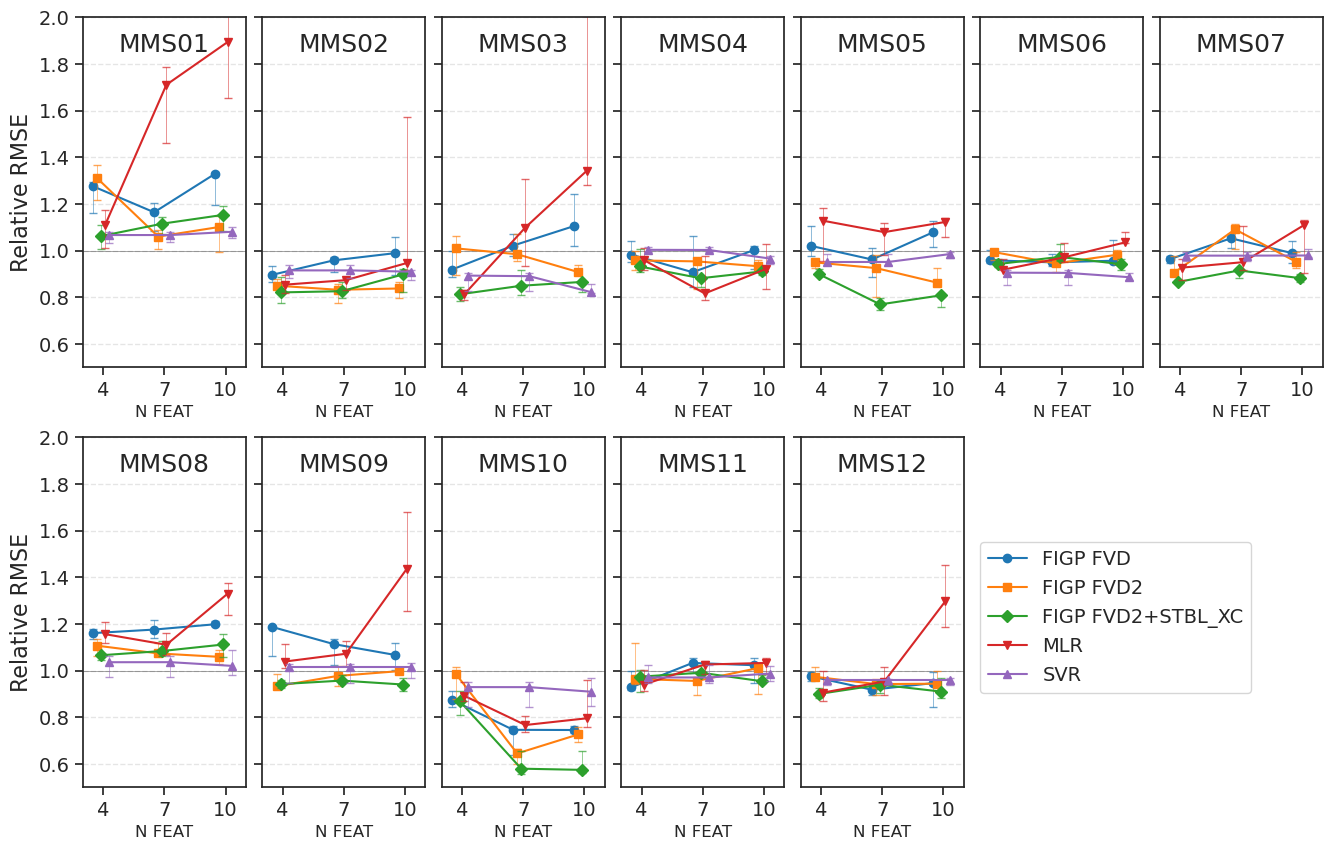

In [51]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import re

_methods = [
            # 'FV',
            'FVD',
            'FVD2',
            # 'FVD3',
            # 'FVD2&3',
            # 'FV +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)',
            # 'FVD3 +.5*X(d=.1) +.5*C(d=.1)',
            # 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)',
            # 'N +.5*X(d=.1) +.5*C(d=.1)', 
            'MLR',
            'SVR',
            # 'FV +1*X(d=.1)', 
            # 'FV +1*C(d=.1)', 
            # 'MEAN',
            # 'FV +1*X(d=.01)', 'FV +1*X(d=.02)', 'FV +1*C(d=.01)',
            # 'FV +1*C(d=.2)', 'FV +1*X(d=.5)',
            # 'FV +1*C(d=.5)', 'N', 'FV +1*C(d=.05)'
            ]

_m_rename = {
            #  'FV': 'SR FLT=FV',
             'FV': 'FIGP FV',
            #  'FVD': 'SR FLT=FVD',
             'FVD': 'FIGP FVD',
            #  'FVD2': 'SR FLT=FVD2',
             'FVD2': 'FIGP FVD2',
             'FVD3': 'FIGP FVD3',
             'FVD2&3': 'FIGP FVD2&3',
            #  'N +.5*X(d=.1) +.5*C(d=.1)': r'SR NOFLT+NOISE($\bf{X}$,$\bf{C}$)',
             'N +.5*X(d=.1) +.5*C(d=.1)': 'GPSR+STBL_XC',
            #  'FV +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FV+NOISE($\bf{X}$,$\bf{C}$)',
             'FV +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FV+STBL_XC',
            #  'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FVD2+NOISE($\bf{X}$,$\bf{C}$)',
             'FVD2 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD2+STBL_XC',
             'FVD3 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD3+STBL_XC',
             'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD2&3+STBL_XC',
             'MLR': 'MLR',
             'SVR': 'SVR',
             'MEAN': 'MEAN of $\it{training}$ $\it{set}$',
            #  'FV +1*X(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$)',
            #  'FV +1*C(d=.1)': r'06. SR FLT=FV+NOISE($\bf{C}$)',
             }

_selected_data = {

}

# for _mms, _nfeats in _seleced_data.items():
markers = ["o", "s", "D", "v", "^", ">", "<", "p", "P", "*", "X", "d"]
cmap = plt.get_cmap("tab10")
# cmap = plt.get_cmap("tab10")
# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:

fig, axes = plt.subplots(2, 7, figsize=(16, 10))
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

for _jdx, _mms in enumerate(['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']):
# for _mms in ['MMS03', 'MMS05']:

    ax = axes[int(_jdx/7), _jdx%7]
    ax.hlines([1], 3, 11, linestyle="solid", alpha=0.5, linewidth=0.5, color="black")

    for idx, _method in enumerate(_methods):

        _df = df[df["MMS"] == _mms]
        _df = _df[_df["DATASET"] == "test"]
        _df_mean = _df[_df["METHOD"] == "MEAN"]
        _df = _df[_df["METHOD"] == _method]

        """rename methods"""
        _df.loc[:, "METHOD"] = [_m_rename[_method] for _method in _df["METHOD"]]
        _method_name = _m_rename[_method]
        # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
        # _df.loc[:, "METHOD"] = [re.sub("^0", "", _method.replace("+", "\n        +")).replace("7. MLR", "      7. MLR      ").replace("8. SVR", "      8. SVR      ") for _method in _df["METHOD"]]

        _df_q = pd.DataFrame(index=[4, 7, 10], columns=["mean", "median", "25%", "40%", "50%", "60%", "75%", "std"])
        for _n_feats in [4, 7, 10]:
            _se_mean_q = _df_mean[_df_mean["N FEATURES"] == _n_feats]["RMSE"].median()
            # print(_se_mean_q)

            _df_q.loc[_n_feats, :] = [_df[_df["N FEATURES"] == _n_feats]["RMSE"].mean()/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].median()/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.25)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.4)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.5)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.6)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].quantile(0.75)/_se_mean_q,
                               _df[_df["N FEATURES"] == _n_feats]["RMSE"].std()/_se_mean_q]


        """plot median and errorbars from 25% to 75%, linetype is dashed for median"""
        # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "mean"], color=cmap(idx), marker="o", linestyle="solid", label=_method_name)
        # ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name, alpha=0.7)
        # # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "median"], color=cmap(idx), marker="_", linestyle="dashed", label="", linewidth=0.5)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none', 
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        """plot median and errobar with upper side only"""
        ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none',
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "40%"], _df_q.loc[:, "60%"] - _df_q.loc[:, "median"]], fmt='none',
                    ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)


    # """set minor ticks for y axis"""
    # ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

    # # ax.set_xlabel("N FEAT", fontsize=14)
    ax.set_xlabel("N FEAT")
    ax.set_xlim(3, 11)
    ax.set_ylim(0.5, 2.0)

    # ax.set_yticks([0.5, 0.7, 0.9, 1.1], fontsize=14)

    """put legend outside of the plot"""
    if _jdx == 11:
        ax.legend(bbox_to_anchor=(1.1, 0.7), loc='upper left', borderaxespad=0, fontsize=14)

    if _jdx%7 != 0:
        ax.set_yticklabels([])
    else:
        # print()
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
        ax.set_ylabel("Relative RMSE", fontsize=16)

    ax.set_xticks([4, 7, 10])
    ax.set_xticklabels(["4", "7", "10"], fontsize=14)



    ax.grid(axis="y", linestyle="dashed", alpha=0.5)
    ax.grid(axis="y", linestyle="dashed", alpha=0.5, which="minor")

    """set title inside the plot"""
    ax.text(.5, .90, _mms, fontsize=18,
            horizontalalignment='center',
            transform=ax.transAxes)



plt.subplots_adjust(wspace=0.1)
plt.savefig("plot_rmse_nfeat_r.png", dpi=300, bbox_inches="tight")
plt.show()



comparison TRAIN RATIO

In [ ]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import re

_methods = [
            # 'FV',
            'FVD',
            'FVD2',
            # 'FV +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)',
            # 'N +.5*X(d=.1) +.5*C(d=.1)', 
            # 'MLR',
            'SVR',
            # 'FV +1*X(d=.1)', 
            # 'FV +1*C(d=.1)', 
            'MEAN',
            # 'FV +1*X(d=.01)', 'FV +1*X(d=.02)', 'FV +1*C(d=.01)',
            # 'FV +1*C(d=.2)', 'FV +1*X(d=.5)',
            # 'FV +1*C(d=.5)', 'N', 'FV +1*C(d=.05)'
            ]

_m_rename = {
            #  'FV': 'SR FLT=FV',
             'FV': 'FIGP FV',
            #  'FVD': 'SR FLT=FVD',
             'FVD': 'FIGP FVD',
            #  'FVD2': 'SR FLT=FVD2',
             'FVD2': 'FIGP FVD2',
            #  'N +.5*X(d=.1) +.5*C(d=.1)': r'SR NOFLT+NOISE($\bf{X}$,$\bf{C}$)',
             'N +.5*X(d=.1) +.5*C(d=.1)': r'GPSR+STBL_XC',
            #  'FV +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FV+NOISE($\bf{X}$,$\bf{C}$)',
             'FV +.5*X(d=.1) +.5*C(d=.1)': r'FIGP FV+STBL_XC',
            #  'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FVD2+NOISE($\bf{X}$,$\bf{C}$)',
             'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'FIGP FVD2+STBL_XC',
            #  'MLR': 'MLR',
             'SVR': 'SVR',
             'MEAN': r'MEAN of $\it{training}$ $\it{set}$',
            #  'FV +1*X(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$)',
            #  'FV +1*C(d=.1)': r'06. SR FLT=FV+NOISE($\bf{C}$)',
             }

_selected_data = {

}

# for _mms, _nfeats in _seleced_data.items():
markers = ["o", "s", "D", "v", "^", ">", "<", "p", "P", "*", "X", "d"]
cmap = plt.get_cmap("tab10")
# cmap = plt.get_cmap("tab10")
# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:

fig, axes = plt.subplots(2, 7, figsize=(16, 10))
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

# display(df)

for _jdx, _mms in enumerate(['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']):
# for _mms in ['MMS03', 'MMS05']:

    ax = axes[int(_jdx/7), _jdx%7]

    for idx, _method in enumerate(_methods):

        _df = df[df["MMS"] == _mms]
        _df = _df[_df["DATASET"] == "test"]
        _df = _df[_df["METHOD"] == _method]
        # _df = _df[_df["N FEATURES"] == 10]

        """rename methods"""
        _df.loc[:, "METHOD"] = [_m_rename[_method] for _method in _df["METHOD"]]
        _method_name = _m_rename[_method]
        # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
        # _df.loc[:, "METHOD"] = [re.sub("^0", "", _method.replace("+", "\n        +")).replace("7. MLR", "      7. MLR      ").replace("8. SVR", "      8. SVR      ") for _method in _df["METHOD"]]


        _df_q = pd.DataFrame(index=[0.2, 0.5, 0.8], columns=["mean", "median", "25%", "40%", "50%", "60%", "75%", "std"])
        # _df_q = pd.DataFrame(index=[4, 7, 10], columns=["mean", "median", "25%", "40%", "50%", "60%", "75%", "std"])
        for _train_r in [0.2, 0.5, 0.8]:
            _rmse = _df[_df["TRAIN RATIO"] == _train_r]["RMSE"]
            _df_q.loc[_train_r, :] = [_rmse.mean(), _rmse.median(), _rmse.quantile(0.25),
                                      _rmse.quantile(0.4), _rmse.quantile(0.5), _rmse.quantile(0.6),
                                      _rmse.quantile(0.75), _rmse.std()]
            # print(_df_q.loc[_train_r, :])
        
        """plot median and errorbars from 25% to 75%, linetype is dashed for median"""
        # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "mean"], color=cmap(idx), marker="o", linestyle="solid", label=_method_name)
        # ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name, alpha=0.7)
        # # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "median"], color=cmap(idx), marker="_", linestyle="dashed", label="", linewidth=0.5)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none', 
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        """plot median and errobar with upper side only"""
        ax.plot(_df_q.index+0.02*idx-0.01*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none',
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        ax.errorbar(_df_q.index+0.02*idx-0.01*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "40%"], _df_q.loc[:, "60%"] - _df_q.loc[:, "median"]], fmt='none',
                    ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)


        # ax.set_yticks([0.5, 0.7, 0.9, 1.1], fontsize=14)

        """put legend outside of the plot"""
        if _jdx == 11:
            ax.legend(bbox_to_anchor=(1.1, 0.7), loc='upper left', borderaxespad=0, fontsize=14)
        
        """set minor ticks for y axis"""
        # ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

        # ax.set_xlabel("N FEAT", fontsize=14)
        # ax.set_xlabel("N FEAT")
        ax.set_xlim(0, 1)
        ax.set_ylim(0.4, 2.1)
        ax.grid(axis="y", linestyle="dashed", alpha=0.5)
        ax.grid(axis="y", linestyle="dashed", alpha=0.5, which="minor")

        if _jdx%7 != 0:
            ax.set_yticklabels([])
        else:
            # ax.set_yticklabels(["0.5", "0.7", "0.9", "1.1"], fontsize=14)
            ax.set_ylabel("RMSE [log,Ki]", fontsize=16)

        ax.set_xticks([0.2, 0.5, 0.8])
        ax.set_xticklabels(["0.2", "0.5", "0.8"], fontsize=14)


        """set title inside the plot"""
        ax.text(.5, .90, _mms, fontsize=18,
                horizontalalignment='center',
                transform=ax.transAxes)



plt.subplots_adjust(wspace=0.1)
plt.savefig("plot_rmse_trainr.png", dpi=300, bbox_inches="tight")
plt.show()



comparison TRAIN R (relative, all)

/tmp/ipykernel_5282/1584088426.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_5282/1584088426.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_5282/1584088426.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_5282/1584088426.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_5282/1584088426.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_5282/1584088426.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklab

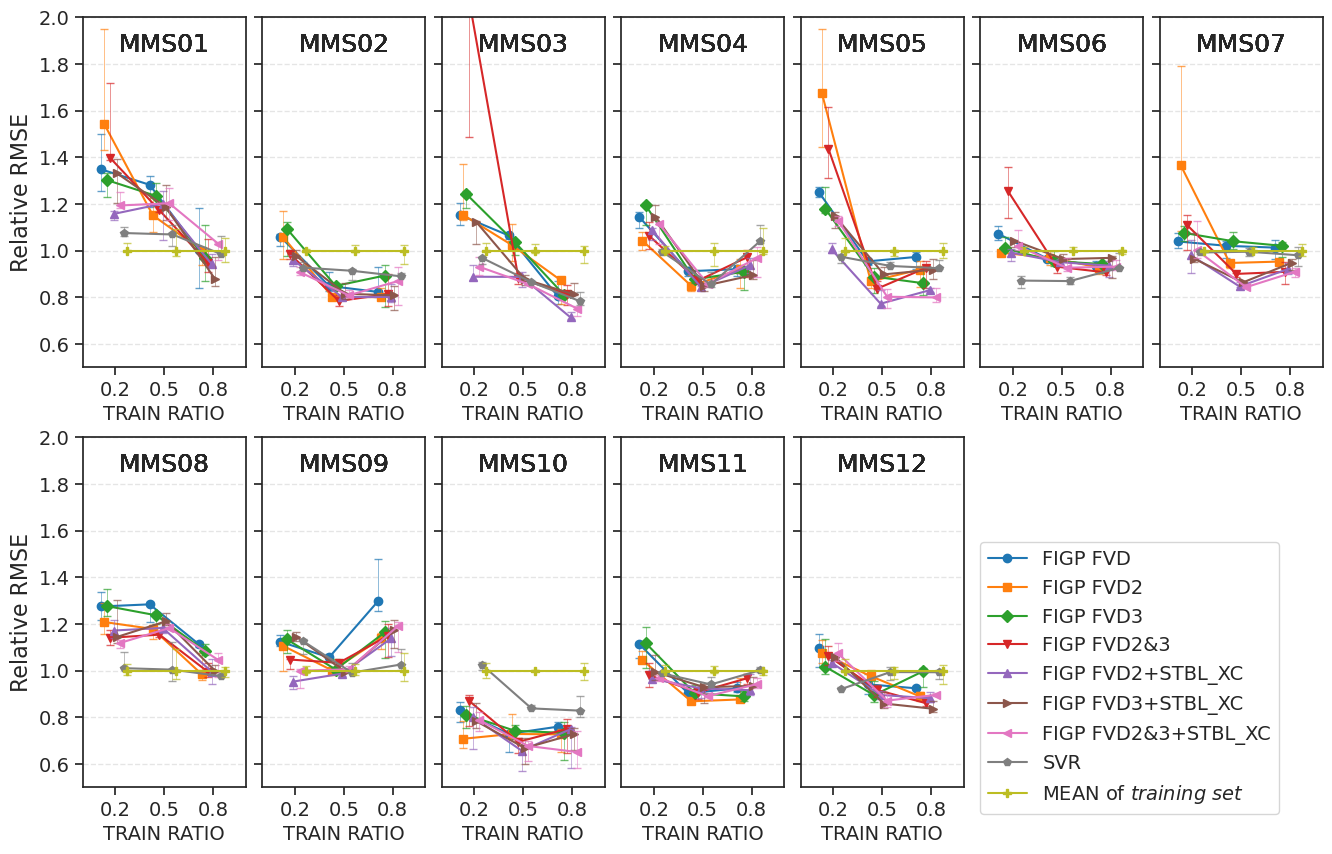

In [10]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import re

_methods = [
            # 'FV',
            'FVD',
            'FVD2',
            'FVD3',
            'FVD2&3',
            # 'FV +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)',
            'FVD3 +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)',
            # 'N +.5*X(d=.1) +.5*C(d=.1)', 
            # 'MLR',
            'SVR',
            # 'FV +1*X(d=.1)', 
            # 'FV +1*C(d=.1)', 
            'MEAN',
            # 'FV +1*X(d=.01)', 'FV +1*X(d=.02)', 'FV +1*C(d=.01)',
            # 'FV +1*C(d=.2)', 'FV +1*X(d=.5)',
            # 'FV +1*C(d=.5)', 'N', 'FV +1*C(d=.05)'
            ]

_m_rename = {
            #  'FV': 'SR FLT=FV',
             'FV': 'FIGP FV',
            #  'FVD': 'SR FLT=FVD',
             'FVD': 'FIGP FVD',
            #  'FVD2': 'SR FLT=FVD2',
             'FVD2': 'FIGP FVD2',
             'FVD3': 'FIGP FVD3',
             'FVD2&3': 'FIGP FVD2&3',
            #  'N +.5*X(d=.1) +.5*C(d=.1)': r'SR NOFLT+NOISE($\bf{X}$,$\bf{C}$)',
             'N +.5*X(d=.1) +.5*C(d=.1)': 'GPSR+STBL_XC',
            #  'FV +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FV+NOISE($\bf{X}$,$\bf{C}$)',
             'FV +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FV+STBL_XC',
            #  'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FVD2+NOISE($\bf{X}$,$\bf{C}$)',
             'FVD2 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD2+STBL_XC',
             'FVD3 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD3+STBL_XC',
             'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD2&3+STBL_XC',
            #  'MLR': 'MLR',
             'SVR': 'SVR',
             'MEAN': r'MEAN of $\it{training}$ $\it{set}$',
            #  'FV +1*X(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$)',
            #  'FV +1*C(d=.1)': r'06. SR FLT=FV+NOISE($\bf{C}$)',
             }

_selected_data = {

}

# for _mms, _nfeats in _seleced_data.items():
markers = ["o", "s", "D", "v", "^", ">", "<", "p", "P", "*", "X", "d"]
cmap = plt.get_cmap("tab10")
# cmap = plt.get_cmap("tab10")
# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:

fig, axes = plt.subplots(2, 7, figsize=(16, 10))
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

for _jdx, _mms in enumerate(['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']):
# for _mms in ['MMS03', 'MMS05']:

    ax = axes[int(_jdx/7), _jdx%7]

    for idx, _method in enumerate(_methods):

        _df = df[df["MMS"] == _mms]
        _df = _df[_df["DATASET"] == "test"]
        _df_mean = _df[_df["METHOD"] == "MEAN"]
        _df = _df[_df["METHOD"] == _method]
        # _df = _df[_df["N FEATURES"] == 7]

        """rename methods"""
        _df.loc[:, "METHOD"] = [_m_rename[_method] for _method in _df["METHOD"]]
        _method_name = _m_rename[_method]
        # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
        # _df.loc[:, "METHOD"] = [re.sub("^0", "", _method.replace("+", "\n        +")).replace("7. MLR", "      7. MLR      ").replace("8. SVR", "      8. SVR      ") for _method in _df["METHOD"]]

        _df_q = pd.DataFrame(index=[0.2, 0.5, 0.8], columns=["mean", "median", "25%", "40%", "50%", "60%", "75%", "std"])
        for _train_r in [0.2, 0.5, 0.8]:
            _se_mean_q = _df_mean[_df_mean["TRAIN RATIO"] == _train_r]["RMSE"].median()
            _rmse = _df[_df["TRAIN RATIO"] == _train_r]["RMSE"]
            
            _df_q.loc[_train_r, :] = [_rmse.mean()/_se_mean_q, _rmse.median()/_se_mean_q, _rmse.quantile(0.25)/_se_mean_q,
                                      _rmse.quantile(0.4)/_se_mean_q, _rmse.quantile(0.5)/_se_mean_q, _rmse.quantile(0.6)/_se_mean_q,
                                      _rmse.quantile(0.75)/_se_mean_q, _rmse.std()/_se_mean_q]

            # print(_df_q.loc[_train_r, :])
        
        """plot median and errorbars from 25% to 75%, linetype is dashed for median"""
        # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "mean"], color=cmap(idx), marker="o", linestyle="solid", label=_method_name)
        # ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name, alpha=0.7)
        # # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "median"], color=cmap(idx), marker="_", linestyle="dashed", label="", linewidth=0.5)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none', 
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        """plot median and errobar with upper side only"""
        ax.plot(_df_q.index+0.02*idx-0.01*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none',
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        ax.errorbar(_df_q.index+0.02*idx-0.01*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "40%"], _df_q.loc[:, "60%"] - _df_q.loc[:, "median"]], fmt='none',
                    ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)


        """put legend outside of the plot"""
        if _jdx == 11:
            ax.legend(bbox_to_anchor=(1.1, 0.7), loc='upper left', borderaxespad=0, fontsize=14)
        
        # """set minor ticks for y axis"""
        # ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

        """set minor ticks for y axis"""
        # ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

        # ax.set_xlabel("N FEAT", fontsize=14)
        ax.set_xlabel("TRAIN RATIO", fontsize=14)
        ax.set_xlim(0, 1)
        ax.set_ylim(0.5, 2.0)
        ax.grid(axis="y", linestyle="dashed", alpha=0.5)
        ax.grid(axis="y", linestyle="dashed", alpha=0.5, which="minor")

        if _jdx%7 != 0:
            ax.set_yticklabels([])
        else:
            ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
            ax.set_ylabel("Relative RMSE", fontsize=16)

        ax.set_xticks([0.2, 0.5, 0.8])
        ax.set_xticklabels(["0.2", "0.5", "0.8"], fontsize=14)


        ax.grid(axis="y", linestyle="dashed", alpha=0.5)
        ax.grid(axis="y", linestyle="dashed", alpha=0.5, which="minor")

        """set title inside the plot"""
        ax.text(.5, .90, _mms, fontsize=18,
                horizontalalignment='center',
                transform=ax.transAxes)



plt.subplots_adjust(wspace=0.1)
plt.savefig("plot_rmse_trainr_r.png", dpi=300, bbox_inches="tight")
plt.show()



comparison TRAIN R (relative, selected)

/tmp/ipykernel_9333/1545379785.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
/tmp/ipykernel_9333/1545379785.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


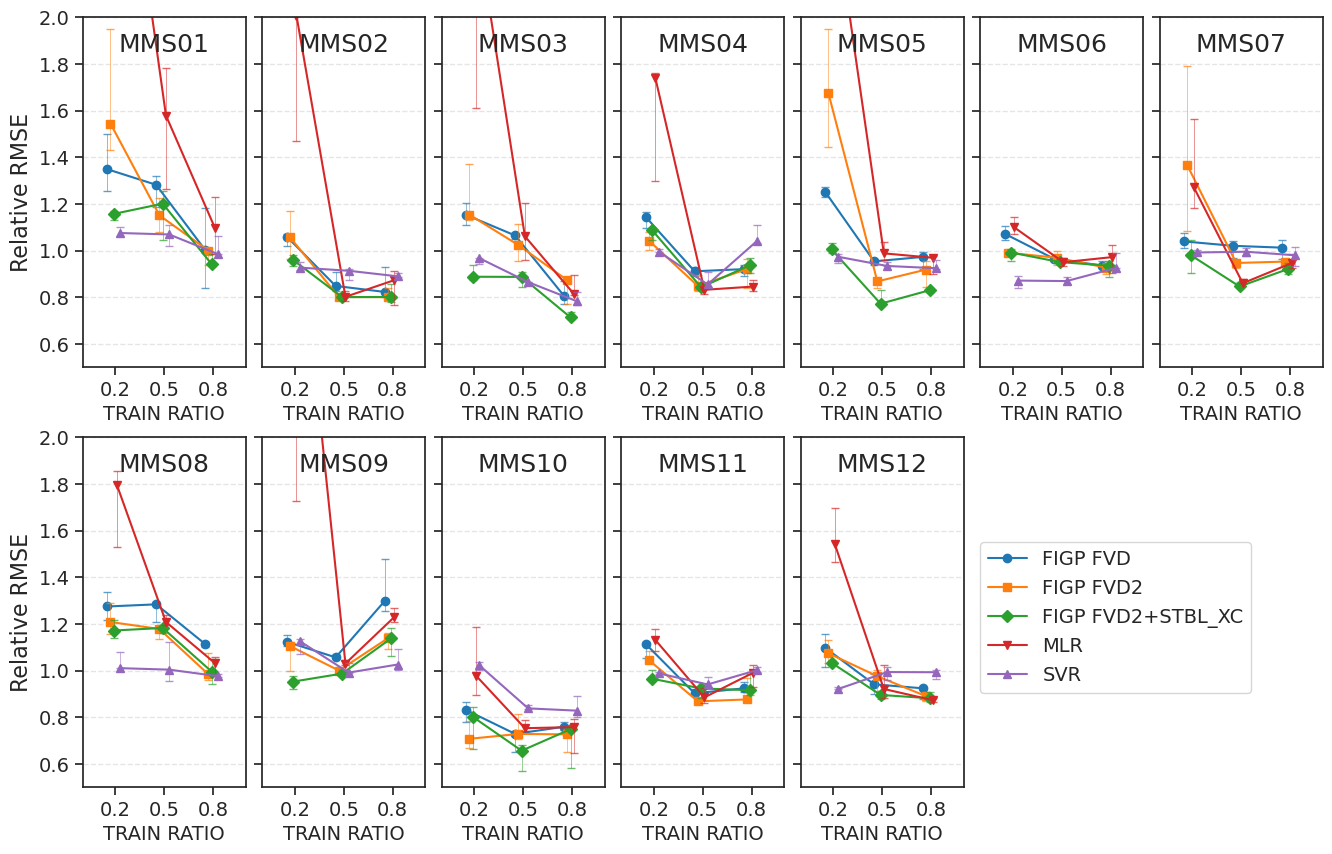

In [54]:
"""BOX PLOT of RMSE"""
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import re

_methods = [
            # 'FV',
            'FVD',
            'FVD2',
            # 'FVD3',
            # 'FVD2&3',
            # 'FV +.5*X(d=.1) +.5*C(d=.1)',
            'FVD2 +.5*X(d=.1) +.5*C(d=.1)',
            # 'FVD3 +.5*X(d=.1) +.5*C(d=.1)',
            # 'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)',
            # 'N +.5*X(d=.1) +.5*C(d=.1)', 
            'MLR',
            'SVR',
            # 'FV +1*X(d=.1)', 
            # 'FV +1*C(d=.1)', 
            # 'MEAN',
            # 'FV +1*X(d=.01)', 'FV +1*X(d=.02)', 'FV +1*C(d=.01)',
            # 'FV +1*C(d=.2)', 'FV +1*X(d=.5)',
            # 'FV +1*C(d=.5)', 'N', 'FV +1*C(d=.05)'
            ]

_m_rename = {
            #  'FV': 'SR FLT=FV',
             'FV': 'FIGP FV',
            #  'FVD': 'SR FLT=FVD',
             'FVD': 'FIGP FVD',
            #  'FVD2': 'SR FLT=FVD2',
             'FVD2': 'FIGP FVD2',
             'FVD3': 'FIGP FVD3',
             'FVD2&3': 'FIGP FVD2&3',
            #  'N +.5*X(d=.1) +.5*C(d=.1)': r'SR NOFLT+NOISE($\bf{X}$,$\bf{C}$)',
             'N +.5*X(d=.1) +.5*C(d=.1)': 'GPSR+STBL_XC',
            #  'FV +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FV+NOISE($\bf{X}$,$\bf{C}$)',
             'FV +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FV+STBL_XC',
            #  'FVD2 +.5*X(d=.1) +.5*C(d=.1)': r'SR FLT=FVD2+NOISE($\bf{X}$,$\bf{C}$)',
             'FVD2 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD2+STBL_XC',
             'FVD3 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD3+STBL_XC',
             'FVD2&3 +.5*X(d=.1) +.5*C(d=.1)': 'FIGP FVD2&3+STBL_XC',
             'MLR': 'MLR',
             'SVR': 'SVR',
             'MEAN': r'MEAN of $\it{training}$ $\it{set}$',
            #  'FV +1*X(d=.1)': r'05. SR FLT=FV+NOISE($\bf{X}$)',
            #  'FV +1*C(d=.1)': r'06. SR FLT=FV+NOISE($\bf{C}$)',
             }

_selected_data = {

}

# for _mms, _nfeats in _seleced_data.items():
markers = ["o", "s", "D", "v", "^", ">", "<", "p", "P", "*", "X", "d"]
cmap = plt.get_cmap("tab10")
# cmap = plt.get_cmap("tab10")
# for _mms in ['MMS01', 'MMS02', 'MMS06', 'MMS09', 'MMS11']:

fig, axes = plt.subplots(2, 7, figsize=(16, 10))
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

for _jdx, _mms in enumerate(['MMS01', 'MMS02', 'MMS03', 'MMS04', 'MMS05', 'MMS06', 'MMS07', 'MMS08', 'MMS09', 'MMS10', 'MMS11', 'MMS12']):
# for _mms in ['MMS03', 'MMS05']:

    ax = axes[int(_jdx/7), _jdx%7]
    ax.hlines([1], 3, 11, linestyle="solid", alpha=0.5, linewidth=0.5, color="black")

    for idx, _method in enumerate(_methods):

        _df = df[df["MMS"] == _mms]
        _df = _df[_df["DATASET"] == "test"]
        _df_mean = _df[_df["METHOD"] == "MEAN"]
        _df = _df[_df["METHOD"] == _method]
        # _df = _df[_df["N FEATURES"] == 7]

        """rename methods"""
        _df.loc[:, "METHOD"] = [_m_rename[_method] for _method in _df["METHOD"]]
        _method_name = _m_rename[_method]
        # _df.loc[:, "METHOD"] = [_method.replace("*", "", ).replace("+1", "+").replace(".", "0.").replace("d", "$\sigma$").replace("X", "$X$").replace("C", "$C$") for _method in _df["METHOD"]]
        # _df.loc[:, "METHOD"] = [re.sub("^0", "", _method.replace("+", "\n        +")).replace("7. MLR", "      7. MLR      ").replace("8. SVR", "      8. SVR      ") for _method in _df["METHOD"]]

        _df_q = pd.DataFrame(index=[0.2, 0.5, 0.8], columns=["mean", "median", "25%", "40%", "50%", "60%", "75%", "std"])
        for _train_r in [0.2, 0.5, 0.8]:
            _se_mean_q = _df_mean[_df_mean["TRAIN RATIO"] == _train_r]["RMSE"].median()
            _rmse = _df[_df["TRAIN RATIO"] == _train_r]["RMSE"]
            
            _df_q.loc[_train_r, :] = [_rmse.mean()/_se_mean_q, _rmse.median()/_se_mean_q, _rmse.quantile(0.25)/_se_mean_q,
                                      _rmse.quantile(0.4)/_se_mean_q, _rmse.quantile(0.5)/_se_mean_q, _rmse.quantile(0.6)/_se_mean_q,
                                      _rmse.quantile(0.75)/_se_mean_q, _rmse.std()/_se_mean_q]

            # print(_df_q.loc[_train_r, :])
        
        """plot median and errorbars from 25% to 75%, linetype is dashed for median"""
        # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "mean"], color=cmap(idx), marker="o", linestyle="solid", label=_method_name)
        # ax.plot(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name, alpha=0.7)
        # # ax.plot(_df_q.index+0.2*idx, _df_q.loc[:, "median"], color=cmap(idx), marker="_", linestyle="dashed", label="", linewidth=0.5)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none', 
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        """plot median and errobar with upper side only"""
        ax.plot(_df_q.index+0.02*idx-0.01*len(_methods), _df_q.loc[:, "median"], color=cmap(idx), marker=markers[idx], linestyle="solid", label=_method_name)
        # ax.errorbar(_df_q.index+0.2*idx-0.1*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "25%"], _df_q.loc[:, "75%"] - _df_q.loc[:, "median"]], fmt='none',
        #             ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)

        ax.errorbar(_df_q.index+0.02*idx-0.01*len(_methods), _df_q.loc[:, "median"], yerr=[_df_q.loc[:, "median"] - _df_q.loc[:, "40%"], _df_q.loc[:, "60%"] - _df_q.loc[:, "median"]], fmt='none',
                    ecolor=cmap(idx), capsize=3, linewidth=0.5, alpha=0.7)


    # """set minor ticks for y axis"""
    # ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

    """set minor ticks for y axis"""
    # ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

    # ax.set_xlabel("N FEAT", fontsize=14)
    ax.set_xlabel("TRAIN RATIO", fontsize=14)
    ax.set_xlim(0, 1)
    ax.set_ylim(0.5, 2.0)
    ax.grid(axis="y", linestyle="dashed", alpha=0.5)
    ax.grid(axis="y", linestyle="dashed", alpha=0.5, which="minor")

    """put legend outside of the plot"""
    if _jdx == 11:
        ax.legend(bbox_to_anchor=(1.1, 0.7), loc='upper left', borderaxespad=0, fontsize=14)

    if _jdx%7 != 0:
        ax.set_yticklabels([])
    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
        ax.set_ylabel("Relative RMSE", fontsize=16)

    ax.set_xticks([0.2, 0.5, 0.8])
    ax.set_xticklabels(["0.2", "0.5", "0.8"], fontsize=14)


    ax.grid(axis="y", linestyle="dashed", alpha=0.5)
    ax.grid(axis="y", linestyle="dashed", alpha=0.5, which="minor")

    """set title inside the plot"""
    ax.text(.5, .90, _mms, fontsize=18,
            horizontalalignment='center',
            transform=ax.transAxes)



plt.subplots_adjust(wspace=0.1)
plt.savefig("plot_rmse_trainr_r.png", dpi=300, bbox_inches="tight")
plt.show()



best expression for each MMS by tex

In [2]:
import sympy as sp
import pandas as pd
import re
from IPython.display import Math

def float_precision(float_str, _precision=3):
    _ret = None
    if "." not in float_str:
        _ret = float_str
    else:
        _match = re.search("[1-9]", float_str)
        _idx = float_str.index(".")
        _len = len(float_str)
        if 0 == _match.start(): # 1.234, 12.345, ..
            if _idx <= _precision and _precision <= _len-1:
                _ret = f"{float(float_str):.{_precision-_idx}f}"
            else:
                _ret = f"{round(float(float_str))}"
        elif 1 < _match.start(): # 0.123, 0.01234, ...
            if _precision+_match.start()-2 < _len-(_idx+1):
                _ret = f"{float(float_str):.{_precision+_match.start()-2}f}"
            else:
                _ret = float_str
        else:
            raise RuntimeError("unexpected float_str", float_str)

    print(float_str, end=" -> ")
    return _ret
    # return f"{float(_f):.{_precision}f}"

res_tex = pd.read_csv("../scripts/res_tex_all.csv", header=None)
# display(res_tex)
res_tex.columns = ["PATH", "MMS", "SUBPATH", "RMSE_TRAIN", "RMSE_TEST", "TEX"]

PATH_PTN = re.compile(r"^2303.._D([^_]*)_F([^_]*)_(([^_]*)|([^_]*)_([^_]*)|([^_]*)_([^_]*)_([^_]*))$")
XX_PTN = re.compile(r"(arings|acc|don|a_heavy|logp|rbc|rings|tpsa|vdw_vol|mw) (arings|acc|don|a_heavy|logp|rbc|rings|tpsa|vdw_vol|mw)")
res_tex.loc[:, ["N FEATURES", "TRAIN RATIO", "METHOD"]] = None

_custom_repl = {"MMS10": [("\cdot 10^{19} ", ""), ("9.19 \cdot 10^{20} ", "91.9 "), ("1.56 \cdot 10^{20} ", "15.6 "), ("- 1.17 \cdot 10^{20} ", "- 11.7 ")],
                "MMS11": [("\cdot 10^{81} ", ""), ("1.04 \cdot 10^{82} ", "10.4 "), (" 1.76 \cdot 10^{83}", " 176"), ("+ 1.49 \cdot 10^{82} ", "+ 14.9 "), ("6.68 \cdot 10^{82}", "66.8")]}
# "MMS10"
# $$\mathrm{\frac{9.19 \cdot 10^{20} - 8.80 \cdot 10^{19} e^{- rbc}}{1.56 \cdot 10^{20} - 1.17 \cdot 10^{20} e^{- acc}}}$$
# "MMS11"
# $$\mathrm{\frac{1.04 \cdot 10^{82} don + 2.95 \cdot 10^{81} logp + 1.76 \cdot 10^{83}}{- 2.92 \cdot 10^{81} arings + 2.02 \cdot 10^{81} rbc + 1.49 \cdot 10^{82} + \frac{6.68 \cdot 10^{82}}{a_{heavy}}}}$$


for _idx in res_tex.index:
    
    if PATH_PTN.match(res_tex.loc[_idx, "PATH"]) is not None:
        _match = PATH_PTN.match(res_tex.loc[_idx, "PATH"])
        # print(_match.groups(), _match.group(0),_match.group(1),_match.group(2),_match.group(3))
        _train_r = float(f"0.{_match.group(1)}")
        _n_feats = int(_match.group(2))
        _method = None
        
        if _match.group(4) is not None:
            _method = _match.group(4)
        elif _match.group(5) is not None:
            _lmd = _match.group(6)[1:].split(":")
            _method = f"{_match.group(5)} +{_lmd[0]}*{_match.group(6)[0]}(d={_lmd[1]})"
        elif _match.group(7) is not None:
            _xlmd = _match.group(8)[1:].split(":")
            _clmd = _match.group(9)[1:].split(":")
            _method = f"{_match.group(7)} +{_xlmd[0]}*{_match.group(8)[0]}(d={_xlmd[1]}) +{_clmd[0]}*{_match.group(9)[0]}(d={_clmd[1]})"
        else:
            raise Exception("no match", _match.groups())
        
        res_tex.loc[_idx, ["N FEATURES", "TRAIN RATIO", "METHOD"]] = [_n_feats, _train_r, _method]

res_tex = res_tex.iloc[:, [8, 7, 6, 1, 3, 4, 5, 2, 0]]
for _idx in range(1, 13):
    _mms = f"MMS{_idx:02d}"
    _best = res_tex[res_tex["MMS"] == _mms].sort_values(by="RMSE_TEST").iloc[:1, :]
    _best = _best[_best["MMS"] == _mms].sort_values(by="RMSE_TEST").iloc[:1, :]
    # print(_best)
    _tex = "$$\mathrm{" + _best.iloc[0, :].loc['TEX'] + "}$$"
    display(_best.loc[:, ["MMS", "METHOD", "N FEATURES", "TRAIN RATIO", "SUBPATH", "RMSE_TRAIN", "RMSE_TEST", "SUBPATH"]])
    # display(Math(_best.iloc[0, :].loc["TEX"]))

    _rep = []
    _r = re.finditer(r"(?<![0-9])[0-9]+\.[0-9]+(?![0-9])", _tex)
    for _m in _r:
        # print(_m.group(0), _m.start(), _m.end())
        _rep.append([_m.start(), _m.end(), _m.group(0), float_precision(_m.group(0))])
        # print(_m.groups())

    for item in reversed(_rep):
        _tex = _tex[:item[0]] + item[3] + _tex[item[1]:]
    # print(_tex)
    # print(_match.group())
    print(_tex)
    if XX_PTN.search(_tex):
        print("match!!")
        _tex = XX_PTN.sub("\\1\\\\cdot \\2", _tex)
        print(_tex)
    print(_tex)
    if _mms in _custom_repl.keys():
        print("match2!!")
        for _rep in _custom_repl[_mms]:
            _tex = _tex.replace(_rep[0], _rep[1])
        print(_tex)

    display(Math(_tex[2:-2].replace("$", "", 4)))
    sp.preview(_tex, viewer='file', filename=f"{_mms}_expr.png", euler=False)
    

#sp.preview(r'$$\int_0^1 e^x\,dx$$', viewer='file', filename='test.png', euler=False)
# sp.preview(r'$$\left(- \frac{tpsa}{- a_{heavy} + mw} + 4.5320462001435\right) \log{\left(don + 4.15689215183525 \right)}$$', viewer='file', filename='test.png', euler=False)

MMS METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
2020  MMS01      N          7         0.8  01/4_3    0.424021   

               RMSE_TEST SUBPATH  
2020  0.6344213573031522  01/4_3

1.15667716642387 -> 2.51217108509625 -> 10.6854837108365 -> 1593.63480157459 -> 239.149133575542 -> 0.00119421969856248 -> 1.83027777279773 -> $$\mathrm{\frac{\sqrt{don}}{\left(arings - 1.16\right) \left(- acc + 2.51 rbc - 10.7\right)} + \frac{- logp - 1594}{- tpsa - 239} + \frac{0.00119}{logp - 1.83}}$$
$$\mathrm{\frac{\sqrt{don}}{\left(arings - 1.16\right) \left(- acc + 2.51 rbc - 10.7\right)} + \frac{- logp - 1594}{- tpsa - 239} + \frac{0.00119}{logp - 1.83}}$$


<IPython.core.display.Math object>

MMS          METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
1421  MMS02  FV +1*C(d=.02)         10         0.8  02/4_2    0.452343   

                RMSE_TEST SUBPATH  
1421  0.47053016951805937  02/4_2

122.571990506088 -> 32.0349830495832 -> 788.515122239802 -> 38.0215962513931 -> 0.151016396418077 -> 834.685645085884 -> $$\mathrm{\frac{acc - 123}{don - 32.0 + \frac{789}{a_{heavy}}} + \frac{\sqrt{rbc} + 38.0}{-0.151 + \frac{835}{vdw_{vol}}}}$$
$$\mathrm{\frac{acc - 123}{don - 32.0 + \frac{789}{a_{heavy}}} + \frac{\sqrt{rbc} + 38.0}{-0.151 + \frac{835}{vdw_{vol}}}}$$


<IPython.core.display.Math object>

MMS          METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
1866  MMS03  FV +1*C(d=.01)          7         0.8  03/3_2    0.415306   

               RMSE_TEST SUBPATH  
1866  0.4715314502385206  03/3_2

4.64442413973615 -> 0.707602061929951 -> 223.074869246785 -> 1.6834220578173 -> 0.0343628607727991 -> 28.9133877120024 -> $$\mathrm{\frac{- 4.64 rbc + 0.708 tpsa - 223}{- arings \left(logp - 1.68\right) + 0.0344 mw - 28.9}}$$
$$\mathrm{\frac{- 4.64 rbc + 0.708 tpsa - 223}{- arings \left(logp - 1.68\right) + 0.0344 mw - 28.9}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
1171  MMS04  FVD2 +.5*X(d=.1) +.5*C(d=.1)          7         0.5  04/2_0   

      RMSE_TRAIN           RMSE_TEST SUBPATH  
1171    0.444275  0.6062602471785877  04/2_0

11.7197695086749 -> 2.26686426581834 -> $$\mathrm{\sqrt{arings don + logp} + \log{\left(\frac{11.7 mw}{acc + 2.27} \right)}}$$
match!!
$$\mathrm{\sqrt{arings\cdot don + logp} + \log{\left(\frac{11.7 mw}{acc + 2.27} \right)}}$$
$$\mathrm{\sqrt{arings\cdot don + logp} + \log{\left(\frac{11.7 mw}{acc + 2.27} \right)}}$$


<IPython.core.display.Math object>

MMS         METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
1220  MMS05  FV +1*C(d=.1)          7         0.5  05/4_4    0.485134   

               RMSE_TEST SUBPATH  
1220  0.6576267480981415  05/4_4

7.80719573513065 -> 2.6325678677841 -> $$\mathrm{- \log{\left(7.81 \cdot 10^{-5} tpsa \right)} + \frac{2.63 arings}{acc logp}}$$
match!!
$$\mathrm{- \log{\left(7.81 \cdot 10^{-5} tpsa \right)} + \frac{2.63 arings}{acc\cdot logp}}$$
$$\mathrm{- \log{\left(7.81 \cdot 10^{-5} tpsa \right)} + \frac{2.63 arings}{acc\cdot logp}}$$


<IPython.core.display.Math object>

MMS          METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
1293  MMS06  FV +1*X(d=.05)          7         0.5  06/2_3    0.632554   

               RMSE_TEST SUBPATH  
1293  0.8278835113893183  06/2_3

0.0102426447826963 -> 17.2155062692737 -> 146.294256580629 -> 7.0305942924696 -> $$\mathrm{- 0.0102 rbc \left(17.2 don + mw - 146\right) + 7.03}$$
$$\mathrm{- 0.0102 rbc \left(17.2 don + mw - 146\right) + 7.03}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
946  MMS07  FVD2 +.5*X(d=.1) +.5*C(d=.1)          4         0.5  07/1_0   

     RMSE_TRAIN          RMSE_TEST SUBPATH  
946    0.686872  0.875242750105107  07/1_0

0.479617607193298 -> 0.0346108337747774 -> 9.3095916332249 -> $$\mathrm{0.480 rbc - 0.0346 tpsa + 9.31}$$
$$\mathrm{0.480 rbc - 0.0346 tpsa + 9.31}$$


<IPython.core.display.Math object>

MMS          METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
1271  MMS08  FV +1*X(d=.01)          7         0.5  08/3_1     0.51582   

               RMSE_TEST SUBPATH  
1271  0.9370469387524937  08/3_1

0.0153951291984413 -> 0.159051254884182 -> 19.0068445891013 -> 2474.52500938505 -> 7.08950561037063 -> $$\mathrm{\left(- 0.0154 tpsa - \frac{0.159}{logp}\right) \left(acc - 19.0 + \frac{2475}{mw}\right) + \sqrt{e^{don}} + 7.09}$$
$$\mathrm{\left(- 0.0154 tpsa - \frac{0.159}{logp}\right) \left(acc - 19.0 + \frac{2475}{mw}\right) + \sqrt{e^{don}} + 7.09}$$


<IPython.core.display.Math object>

MMS         METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
1332  MMS09  FV +1*X(d=.5)          7         0.5  09/4_2    0.480435   

               RMSE_TEST SUBPATH  
1332  0.5832598703254341  09/4_2

6.9132544279546 -> 4.08403894795374 -> 0.527207284034225 -> 43.2447869230864 -> $$\mathrm{6.91 + \frac{acc - logp - rbc - 4.08}{- 0.527 mw + tpsa + 43.2}}$$
$$\mathrm{6.91 + \frac{acc - logp - rbc - 4.08}{- 0.527 mw + tpsa + 43.2}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
45  MMS10  FVD2 +.5*X(d=.1) +.5*C(d=.1)         10         0.2  10/2_0   

    RMSE_TRAIN           RMSE_TEST SUBPATH  
45    0.215946  0.5638402848627365  10/2_0

9.19429357482086 -> 8.80275104351303 -> 1.55581477868504 -> 1.16927390840003 -> $$\mathrm{\frac{9.19 \cdot 10^{20} - 8.80 \cdot 10^{19} e^{- rbc}}{1.56 \cdot 10^{20} - 1.17 \cdot 10^{20} e^{- acc}}}$$
$$\mathrm{\frac{9.19 \cdot 10^{20} - 8.80 \cdot 10^{19} e^{- rbc}}{1.56 \cdot 10^{20} - 1.17 \cdot 10^{20} e^{- acc}}}$$
match2!!
$$\mathrm{\frac{91.9 - 8.80 e^{- rbc}}{15.6 - 11.7 e^{- acc}}}$$


<IPython.core.display.Math object>

MMS         METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
1466  MMS11  FV +1*C(d=.2)         10         0.8  11/1_2    0.697121   

               RMSE_TEST SUBPATH  
1466  0.7836776769902295  11/1_2

1.03797182599604 -> 2.95144267527793 -> 1.75968025382308 -> 2.92265595118168 -> 2.02216659853775 -> 1.48951702800454 -> 6.6797159393273 -> $$\mathrm{\frac{1.04 \cdot 10^{82} don + 2.95 \cdot 10^{81} logp + 1.76 \cdot 10^{83}}{- 2.92 \cdot 10^{81} arings + 2.02 \cdot 10^{81} rbc + 1.49 \cdot 10^{82} + \frac{6.68 \cdot 10^{82}}{a_{heavy}}}}$$
$$\mathrm{\frac{1.04 \cdot 10^{82} don + 2.95 \cdot 10^{81} logp + 1.76 \cdot 10^{83}}{- 2.92 \cdot 10^{81} arings + 2.02 \cdot 10^{81} rbc + 1.49 \cdot 10^{82} + \frac{6.68 \cdot 10^{82}}{a_{heavy}}}}$$
match2!!
$$\mathrm{\frac{10.4 don + 2.95 logp + 176}{- 2.92 arings + 2.02 rbc + 14.9 + \frac{66.8}{a_{heavy}}}}$$


<IPython.core.display.Math object>

MMS METHOD N FEATURES TRAIN RATIO SUBPATH  RMSE_TRAIN  \
1395  MMS12   FVD2         10         0.8  12/2_2    0.613095   

               RMSE_TEST SUBPATH  
1395  0.7739858754765785  12/2_2

0.008268290477568 -> 96.0 -> 9.5 -> $$\mathrm{- acc - logp + 0.00827 rbc \left(vdw_{vol} - 96.0\right) + 10}$$
$$\mathrm{- acc - logp + 0.00827 rbc \left(vdw_{vol} - 96.0\right) + 10}$$


<IPython.core.display.Math object>

best expression by FVD, FVD2, FVD2+NOISE

In [9]:
# from sympy import *

_methods = ["FV", "FVD", "FVD2", "FVD2 +.5*X(d=.1) +.5*C(d=.1)"]
_meth_rep = {"FV": "fv", "FVD": "fvd", "FVD2": "fvd2", "FVD2 +.5*X(d=.1) +.5*C(d=.1)": "fvd2xc"}

XX_PTN = re.compile(r"(arings|acc|don|a_{heavy}|logp|rbc|rings|tpsa|vdw_{vol}|mw) (arings|acc|don|a_{heavy}|logp|rbc|rings|tpsa|vdw_{vol}|mw)")

_custom_repl = {"MMS01": [(" \cdot 10^{51}", ""), ("- 3.86 \cdot 10^{52}", "- 38.6"), ("6.30 \cdot 10^{52} ", "63.0"), ("-2.79 \cdot 10^{53}", "-279")],
                "MMS03": [("\cdot 10^{27} ", ""), ("- 6.80 \cdot 10^{28}", "- 68.0"), ("+ 6.75 \cdot 10^{29}", "+ 675"), ("3.28 \cdot 10^{30}", "3280")],
                "MMS06": [("\cdot 10^{27} ", ""), ("1.68 \cdot 10^{35}", "1.68 \cdot 10^{8}"), ("+ 3.35 \cdot 10^{32} ", "+ 3.35 \cdot 10^{5} "), ("+ 2.09 \cdot 10^{34}", "+ 2.09 \cdot 10^{7}")],
                "MMS09": [(" \cdot 10^{47}", ""), (" \cdot 10^{51}", " \cdot 10^{4}"), ("-2.54 \cdot 10^{48}", "-25.4")],
                "MMS10": [("\cdot 10^{19} ", ""), ("9.19 \cdot 10^{20} ", "91.9 "), ("1.56 \cdot 10^{20} ", "15.6 "), ("- 1.17 \cdot 10^{20} ", "- 11.7 ")],
                "MMS12": [(" \cdot 10^{38}", ""), ("3.40 \cdot 10^{39}", "35.0")]}
                #"MMS01":
                #$$\mathrm{\frac{-2.79 \cdot 10^{53} + 6.30 \cdot 10^{52} e^{- don}}{1.89 \cdot 10^{51} logp - 3.86 \cdot 10^{52}}}$$
                #"MMS03":
                #$$\mathrm{\frac{3.28 \cdot 10^{30} - 2.88 \cdot 10^{27} logp^{3}}{1.36 \cdot 10^{27} tpsa - 6.80 \cdot 10^{28} \log{\left(mw \right)} + 6.75 \cdot 10^{29}}}$$
                #"MMS06":
                #$$\mathrm{\frac{1.68 \cdot 10^{35}}{3.25 \cdot 10^{27} mw^{2} tpsa + 3.35 \cdot 10^{32} rbc + 2.09 \cdot 10^{34}}}$$
                #"MMS09":
                #$$\mathrm{\frac{-2.54 \cdot 10^{48} - \frac{2.26 \cdot 10^{51}}{mw^{2}}}{-4.19 \cdot 10^{47} + \frac{3.16 \cdot 10^{47}}{logp^{2}}}}$$
                #"MMS10":
                #$$\mathrm{\frac{9.19 \cdot 10^{20} - 8.80 \cdot 10^{19} e^{- rbc}}{1.56 \cdot 10^{20} - 1.17 \cdot 10^{20} e^{- acc}}}$$
                #"MMS12":
                #$$\mathrm{\frac{- 2.53 \cdot 10^{38} acc - 3.68 \cdot 10^{38} logp + 3.40 \cdot 10^{39}}{3.49 \cdot 10^{38} + \frac{3.49 \cdot 10^{38}}{don^{3} tpsa}}}$$

for _idx in range(1, 13):
# for _idx in [9, 12]:
    _mms = f"MMS{_idx:02d}"

    # for _method in _methods:
    for _method in ["FVD2 +.5*X(d=.1) +.5*C(d=.1)"]:
        _best = res_tex[res_tex["MMS"] == _mms]
        _best = _best[_best["METHOD"] == _method].sort_values(by="RMSE_TEST").iloc[:1, :]
    
        # print(_expr)
        _tex = "$$\mathrm{" + _best.iloc[0, :].loc['TEX'] + "}$$"
        display(_best.loc[:, ["MMS", "METHOD", "N FEATURES", "TRAIN RATIO", "SUBPATH", "RMSE_TRAIN", "RMSE_TEST", "SUBPATH"]])

        _rep = []
        _r = re.finditer(r"(?<![0-9])[0-9]+\.[0-9]+(?![0-9])", _tex)
        for _m in _r:
            # print(_m.group(0), _m.start(), _m.end())
            _rep.append([_m.start(), _m.end(), _m.group(0), float_precision(_m.group(0))])
            # print(_m.groups())

        print(_tex)
        for item in reversed(_rep):
            _tex = _tex[:item[0]] + item[3] + _tex[item[1]:]
        # print(_tex)
        # print(_match.group())
        if XX_PTN.search(_tex):
            print("match!!")
            _tex = XX_PTN.sub("\\1\\\\cdot \\2", _tex)
            print(_tex)

        print(_tex)
        if _mms in _custom_repl.keys():
            print("match2!!")
            for _rep in _custom_repl[_mms]:
                _tex = _tex.replace(_rep[0], _rep[1])
            print(_tex)

        display(Math(_tex[2:-2].replace("$", "", 4)))
        sp.preview(_tex, viewer='file', filename=f"{_mms}_{_meth_rep[_method]}_expr.png", euler=False)
        # 

    # #sp.preview(r'$$\int_0^1 e^x\,dx$$', viewer='file', filename='test.png', euler=False)
    # # sp.preview(r'$$\left(- \frac{tpsa}{- a_{heavy} + mw} + 4.5320462001435\right) \log{\left(don + 4.15689215183525 \right)}$$', viewer='file', filename='test.png', euler=False)

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
1168  MMS01  FVD2 +.5*X(d=.1) +.5*C(d=.1)          7         0.5  01/2_2   

      RMSE_TRAIN           RMSE_TEST SUBPATH  
1168    0.620334  0.7735161548028847  01/2_2

2.79264830381975 -> 6.29922238551834 -> 1.89478435454457 -> 3.85853961481511 -> $$\mathrm{\frac{-2.79264830381975 \cdot 10^{53} + 6.29922238551834 \cdot 10^{52} e^{- don}}{1.89478435454457 \cdot 10^{51} logp - 3.85853961481511 \cdot 10^{52}}}$$
$$\mathrm{\frac{-2.79 \cdot 10^{53} + 6.30 \cdot 10^{52} e^{- don}}{1.89 \cdot 10^{51} logp - 3.86 \cdot 10^{52}}}$$
match2!!
$$\mathrm{\frac{-279 + 63.0e^{- don}}{1.89 logp - 38.6}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
941  MMS02  FVD2 +.5*X(d=.1) +.5*C(d=.1)          4         0.5  02/2_4   

     RMSE_TRAIN           RMSE_TEST SUBPATH  
941    0.533461  0.5959990159809031  02/2_4

109.329987691869 -> 4536.26336114104 -> $$\mathrm{\log{\left(109.329987691869 logp rbc + \frac{4536.26336114104}{\sqrt{mw}} \right)}}$$
match!!
$$\mathrm{\log{\left(109 logp\cdot rbc + \frac{4536}{\sqrt{mw}} \right)}}$$
$$\mathrm{\log{\left(109 logp\cdot rbc + \frac{4536}{\sqrt{mw}} \right)}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
942  MMS03  FVD2 +.5*X(d=.1) +.5*C(d=.1)          4         0.5  03/3_1   

     RMSE_TRAIN           RMSE_TEST SUBPATH  
942    0.407033  0.5341321344187714  03/3_1

3.27527519678992 -> 2.88098504070543 -> 1.36258853013727 -> 6.79587251035123 -> 6.74715978436488 -> $$\mathrm{\frac{3.27527519678992 \cdot 10^{30} - 2.88098504070543 \cdot 10^{27} logp^{3}}{1.36258853013727 \cdot 10^{27} tpsa - 6.79587251035123 \cdot 10^{28} \log{\left(mw \right)} + 6.74715978436488 \cdot 10^{29}}}$$
$$\mathrm{\frac{3.28 \cdot 10^{30} - 2.88 \cdot 10^{27} logp^{3}}{1.36 \cdot 10^{27} tpsa - 6.80 \cdot 10^{28} \log{\left(mw \right)} + 6.75 \cdot 10^{29}}}$$
match2!!
$$\mathrm{\frac{3280 - 2.88 logp^{3}}{1.36 tpsa - 68.0 \log{\left(mw \right)} + 675}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
1171  MMS04  FVD2 +.5*X(d=.1) +.5*C(d=.1)          7         0.5  04/2_0   

      RMSE_TRAIN           RMSE_TEST SUBPATH  
1171    0.444275  0.6062602471785877  04/2_0

11.7197695086749 -> 2.26686426581834 -> $$\mathrm{\sqrt{arings don + logp} + \log{\left(\frac{11.7197695086749 mw}{acc + 2.26686426581834} \right)}}$$
match!!
$$\mathrm{\sqrt{arings\cdot don + logp} + \log{\left(\frac{11.7 mw}{acc + 2.27} \right)}}$$
$$\mathrm{\sqrt{arings\cdot don + logp} + \log{\left(\frac{11.7 mw}{acc + 2.27} \right)}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
716  MMS05  FVD2 +.5*X(d=.1) +.5*C(d=.1)         10         0.5  05/3_2   

     RMSE_TRAIN           RMSE_TEST SUBPATH  
716    0.580605  0.6861686398047392  05/3_2

100522.46507419 -> 15309.3841208953 -> $$\mathrm{arings - \frac{a_{heavy} + vdw_{vol} + 100522.46507419}{- tpsa^{2} - 15309.3841208953}}$$
$$\mathrm{arings - \frac{a_{heavy} + vdw_{vol} + 100522}{- tpsa^{2} - 15309}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
269  MMS06  FVD2 +.5*X(d=.1) +.5*C(d=.1)          4         0.2  06/0_1   

     RMSE_TRAIN         RMSE_TEST SUBPATH  
269    0.480165  0.97951284161451  06/0_1

1.67760060559589 -> 3.24803131186729 -> 3.35158374784333 -> 2.08957959406181 -> $$\mathrm{\frac{1.67760060559589 \cdot 10^{35}}{3.24803131186729 \cdot 10^{27} mw^{2} tpsa + 3.35158374784333 \cdot 10^{32} rbc + 2.08957959406181 \cdot 10^{34}}}$$
$$\mathrm{\frac{1.68 \cdot 10^{35}}{3.25 \cdot 10^{27} mw^{2} tpsa + 3.35 \cdot 10^{32} rbc + 2.09 \cdot 10^{34}}}$$
match2!!
$$\mathrm{\frac{1.68 \cdot 10^{8}}{3.25 mw^{2} tpsa + 3.35 \cdot 10^{5} rbc + 2.09 \cdot 10^{7}}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
946  MMS07  FVD2 +.5*X(d=.1) +.5*C(d=.1)          4         0.5  07/1_0   

     RMSE_TRAIN          RMSE_TEST SUBPATH  
946    0.686872  0.875242750105107  07/1_0

0.479617607193298 -> 0.0346108337747774 -> 9.3095916332249 -> $$\mathrm{0.479617607193298 rbc - 0.0346108337747774 tpsa + 9.3095916332249}$$
$$\mathrm{0.480 rbc - 0.0346 tpsa + 9.31}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
271  MMS08  FVD2 +.5*X(d=.1) +.5*C(d=.1)          4         0.2  08/3_4   

     RMSE_TRAIN           RMSE_TEST SUBPATH  
271    0.398983  0.9541217685593691  08/3_4

1682121.79276027 -> 47876121.8182743 -> 11.1933561595202 -> $$\mathrm{\log{\left(1682121.79276027 mw + 47876121.8182743 tpsa \right)} - 11.1933561595202}$$
$$\mathrm{\log{\left(1682122 mw + 47876122 tpsa \right)} - 11.2}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
272  MMS09  FVD2 +.5*X(d=.1) +.5*C(d=.1)          4         0.2  09/3_0   

     RMSE_TRAIN           RMSE_TEST SUBPATH  
272      0.3458  0.6021504673847232  09/3_0

2.53611828906546 -> 2.26271211027003 -> 4.19325541722363 -> 3.16120108754424 -> $$\mathrm{\frac{-2.53611828906546 \cdot 10^{48} - \frac{2.26271211027003 \cdot 10^{51}}{mw^{2}}}{-4.19325541722363 \cdot 10^{47} + \frac{3.16120108754424 \cdot 10^{47}}{logp^{2}}}}$$
$$\mathrm{\frac{-2.54 \cdot 10^{48} - \frac{2.26 \cdot 10^{51}}{mw^{2}}}{-4.19 \cdot 10^{47} + \frac{3.16 \cdot 10^{47}}{logp^{2}}}}$$
match2!!
$$\mathrm{\frac{-25.4 - \frac{2.26 \cdot 10^{4}}{mw^{2}}}{-4.19 + \frac{3.16}{logp^{2}}}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
45  MMS10  FVD2 +.5*X(d=.1) +.5*C(d=.1)         10         0.2  10/2_0   

    RMSE_TRAIN           RMSE_TEST SUBPATH  
45    0.215946  0.5638402848627365  10/2_0

9.19429357482086 -> 8.80275104351303 -> 1.55581477868504 -> 1.16927390840003 -> $$\mathrm{\frac{9.19429357482086 \cdot 10^{20} - 8.80275104351303 \cdot 10^{19} e^{- rbc}}{1.55581477868504 \cdot 10^{20} - 1.16927390840003 \cdot 10^{20} e^{- acc}}}$$
$$\mathrm{\frac{9.19 \cdot 10^{20} - 8.80 \cdot 10^{19} e^{- rbc}}{1.56 \cdot 10^{20} - 1.17 \cdot 10^{20} e^{- acc}}}$$
match2!!
$$\mathrm{\frac{91.9 - 8.80 e^{- rbc}}{15.6 - 11.7 e^{- acc}}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
1178  MMS11  FVD2 +.5*X(d=.1) +.5*C(d=.1)          7         0.5  11/2_0   

      RMSE_TRAIN           RMSE_TEST SUBPATH  
1178    0.648819  0.7991879287401236  11/2_0

0.144466327518705 -> 5.81427481830094 -> 69.5568208999076 -> 9.23943971469998 -> $$\mathrm{\frac{- 0.144466327518705 arings \left(- mw + tpsa\right) + 5.81427481830094 don + 69.5568208999076}{rbc + 9.23943971469998}}$$
$$\mathrm{\frac{- 0.144 arings \left(- mw + tpsa\right) + 5.81 don + 69.6}{rbc + 9.24}}$$


<IPython.core.display.Math object>

MMS                        METHOD N FEATURES TRAIN RATIO SUBPATH  \
1407  MMS12  FVD2 +.5*X(d=.1) +.5*C(d=.1)         10         0.8  12/4_3   

      RMSE_TRAIN           RMSE_TEST SUBPATH  
1407     0.69707  0.8587550472098007  12/4_3

2.52716939378219 -> 3.6810888723942 -> 3.39939934007265 -> 3.48691160014222 -> 3.49106537634282 -> $$\mathrm{\frac{- 2.52716939378219 \cdot 10^{38} acc - 3.6810888723942 \cdot 10^{38} logp + 3.39939934007265 \cdot 10^{39}}{3.48691160014222 \cdot 10^{38} + \frac{3.49106537634282 \cdot 10^{38}}{don^{3} tpsa}}}$$
$$\mathrm{\frac{- 2.53 \cdot 10^{38} acc - 3.68 \cdot 10^{38} logp + 3.40 \cdot 10^{39}}{3.49 \cdot 10^{38} + \frac{3.49 \cdot 10^{38}}{don^{3} tpsa}}}$$
match2!!
$$\mathrm{\frac{- 2.53 acc - 3.68 logp + 35.0}{3.49 + \frac{3.49}{don^{3} tpsa}}}$$


<IPython.core.display.Math object>

sympy

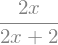

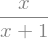

In [7]:
from sympy import *
from sympy.abc import *
init_printing()

expr = (2*x)/(2*x + 2)
display(expr)
expr = simplify(expr)
display(expr)

In [ ]:
_tex = r"\mathrm{\frac{acc - 122.571990506088}{don - 32.0349830495832 + \frac{788.515122239802}{a_{heavy}}} + \frac{\sqrt{rbc} + 38.0215962513931}{-0.151016396418077 + \frac{834.685645085884}{vdw_{vol}}}}"



display(Math(_tex))

In [ ]:
import numpy as np
import pandas as pd
# Create random data
rd = pd.DataFrame(np.random.randn(100, 10))
# Calculate all the desired values
df = pd.DataFrame({'mean': rd.mean(), 'median': rd.median(),
                   '25%': rd.quantile(0.25), '50%': rd.quantile(0.5),
                   '75%': rd.quantile(0.75)})
# And plot it
df.plot()
display(rd)

In [ ]:
import re

def float_precision(float_str, _precision=3):
    _ret = None
    if "." not in float_str:
        _ret = float_str
    else:
        _match = re.search("[1-9]", float_str)
        _idx = float_str.index(".")
        _len = len(float_str)
        if 0 == _match.start(): # 1.234, 12.345, ..
            if _idx <= _precision and _precision <= _len-1:
                _ret = f"{float(float_str):.{_precision-_idx}f}"
            else:
                _ret = f"{round(float(float_str))}"
        elif 1 < _match.start(): # 0.123, 0.01234, ...
            if _precision+_match.start()-2 < _len-(_idx+1):
                _ret = f"{float(float_str):.{_precision+_match.start()-2}f}"
            else:
                _ret = float_str
        else:
            raise RuntimeError("unexpected float_str", float_str)

    print(float_str, end=" -> ")
    return _ret
    # return f"{float(_f):.{_precision}f}"

print(float_precision("0.000123456789"))
print(float_precision("0.0123456789"))
print(float_precision("1.23456789"))
print(float_precision("0.123456789"))
print(float_precision("1.2345"))
print(float_precision("12.345"))
print(float_precision("123.45"))
print(float_precision("1234.5"))
print(float_precision("1234.56789"))
print(float_precision("1.2"))
print(float_precision("0.12"))
print(float_precision("0.012"))
print(float_precision("0.01"))
print(float_precision("0.00012345"))
print(float_precision("0.00012"))
print(float_precision("9.5"))


In [ ]:
df_res = pd.DataFrame(columns=["MMS", "METHOD", "N FEATURES", "TRAIN RATIO", \
                               "RMSE TRAIN COUNT", "RMSE TRAIN MEAN", "RMSE TRAIN STD", "RMSE TRAIN MIN", "RMSE TRAIN 25%", "RMSE TRAIN 50%", "RMSE TRAIN 75%", "RMSE TRAIN MAX", \
                               "R2 TRAIN COUNT",   "R2 TRAIN MEAN",   "R2 TRAIN STD",   "R2 TRAIN MIN",   "R2 TRAIN 25%",   "R2 TRAIN 50%",   "R2 TRAIN 75%",   "R2 TRAIN MAX", \
                               "RMSE TEST COUNT",  "RMSE TEST MEAN",  "RMSE TEST STD",  "RMSE TEST MIN",  "RMSE TEST 25%",  "RMSE TEST 50%",  "RMSE TEST 75%",  "RMSE TEST MAX", \
                               "R2 TEST COUNT",    "R2 TEST MEAN",    "R2 TEST STD",    "R2 TEST MIN",    "R2 TEST 25%",    "R2 TEST 50%",    "R2 TEST 75%",    "R2 TEST MAX"])                                                                                                                                                                            

mmss = df["MMS"].drop_duplicates().values
methods = df["METHOD"].drop_duplicates().values
nfeatss = df["N FEATURES"].drop_duplicates().values
trainrs = df["TRAIN RATIO"].drop_duplicates().values

print(mmss)
print(methods)
print(nfeatss)
print(trainrs)

for _mms in mmss:
    for _method in methods:
        for _nfeats in nfeatss:
            for _trainr in trainrs:
                _train = df[(df["MMS"] == _mms) & (df["METHOD"] == _method) & (df["N FEATURES"] == _nfeats) & (df["TRAIN RATIO"] == _trainr) & (df["DATASET"] == "train")].loc[:, ["RMSE","R2"]].describe()
                _test = df[(df["MMS"] == _mms) & (df["METHOD"] == _method) & (df["N FEATURES"] == _nfeats) & (df["TRAIN RATIO"] == _trainr) & (df["DATASET"] == "test")].loc[:, ["RMSE","R2"]].describe()
                new_row = [_mms, _method, _nfeats, _trainr]+list(_train["RMSE"].values)+list(_train["R2"])+list(_test["RMSE"].values)+list(_test["R2"])
                # print(len(df_res.columns), len(new_row))
                df_res.loc[len(df_res)] = new_row
                
df_res


In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

cm_gr = sns.light_palette('green', reverse=True, as_cmap=True)
cm_br = sns.light_palette('blue', reverse=True, as_cmap=True)
cm_b  = sns.light_palette('blue', reverse=False, as_cmap=True)


for _nfeats in nfeatss:
    for _trainr in trainrs:
        print(f"======= RMSE TEST (N FEATS: {_nfeats}, TRAIN RATIO: {_trainr}) =======")
        df_rmse_test = pd.DataFrame(index=mmss, columns=methods)
        df_rmse_test_med = pd.DataFrame(index=mmss, columns=methods)
        df_rmse_test_count = pd.DataFrame(index=mmss, columns=methods)
        _df = df_res[(df_res["N FEATURES"] == _nfeats) & (df_res["TRAIN RATIO"] == _trainr)]
        for _mms in mmss:
            # display(_df[(_df["MMS"] == _mms)].loc[:, ["METHOD", "RMSE TEST MEAN"]])
            df_rmse_test.loc[_mms] = _df[(_df["MMS"] == _mms)]["RMSE TEST MEAN"].values
            df_rmse_test_med.loc[_mms] = _df[(_df["MMS"] == _mms)]["RMSE TEST 50%"].values
            df_rmse_test_count.loc[_mms] = _df[(_df["MMS"] == _mms)]["RMSE TEST COUNT"].values

        # df_rmse_test_F10_D8_s = df_rmse_test_F10_D8.style.background_gradient(cmap=cm_g, axis=1)
        # s_df_rmse_test = df_rmse_test.astype("float64").style.background_gradient(cmap=cm_gr, axis=1).set_precision(3)
        # s_df_rmse_test_med = df_rmse_test_med.astype("float64").style.background_gradient(cmap=cm_br, axis=1).set_precision(3)
        s_df_rmse_test = df_rmse_test.astype("float64").style.background_gradient(cmap=cm_gr, axis=1)
        s_df_rmse_test_med = df_rmse_test_med.astype("float64").style.background_gradient(cmap=cm_br, axis=1)
        s_df_rmse_test_count = df_rmse_test_count.astype("int").style
        s_df_rmse_test.format("{:.2e}")
        s_df_rmse_test_med.format("{:.2e}")

        # s_train_r2 = df_train_r2.style.background_gradient(cmap=cm_gr, vmax=1.0, axis=1).set_precision(3)
        # s_test_r2 = df_test_r2.style.background_gradient(cmap=cm_gr, vmax=1.0, axis=1).set_precision(3)


        s_df_rmse_test = s_df_rmse_test.apply(min_bold_max_italic, axis=1)
        s_df_rmse_test = s_df_rmse_test.apply(min_bold_max_italic, axis=1)
        s_df_rmse_test_med = s_df_rmse_test_med.apply(min_bold_max_italic, axis=1)
        s_df_rmse_test_med = s_df_rmse_test_med.apply(min_bold_max_italic, axis=1)
        s_df_rmse_test_count = s_df_rmse_test_count.apply(max_bold_min_italic, axis=1)
        s_df_rmse_test_count = s_df_rmse_test_count.apply(max_bold_min_italic, axis=1)
        display(s_df_rmse_test)
        display(s_df_rmse_test_med)
        display(s_df_rmse_test_count)
